1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.
4. Recommend strategies to manage customer churn based on your observations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Load and Review data

In [2]:
df_tchurn=pd.read_csv('train.csv')
df_tchurn_test=pd.read_csv('test.csv')
#df_tchurn=pd.concat([df_tchurn_train,df_tchurn_test])

In [3]:
#Understanding the data
df_tchurn.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [4]:
print(df_tchurn.info())
print(df_tchurn_test.info()) # check the test data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB
None


In [5]:
df_tchurn.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [6]:
#save a copy of the current data 
df_tc_backup=df_tchurn.copy()

In [7]:
#identify the percentage of null/ missing values values
def perMissingValue(df):
    df_null=pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=['Missing /Null %'])
    df_null.index.name='Variables'
    # variables which have null values
    print(df_null[df_null['Missing /Null %']>0])
    return df_null[df_null['Missing /Null %']>0]

In [8]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
df_nullper=perMissingValue(df_tchurn)

                          Missing /Null %
Variables                                
arpu_3g_6                           74.90
count_rech_2g_6                     74.90
night_pck_user_6                    74.90
arpu_2g_6                           74.90
date_of_last_rech_data_6            74.90
total_rech_data_6                   74.90
av_rech_amt_data_6                  74.90
max_rech_data_6                     74.90
count_rech_3g_6                     74.90
fb_user_6                           74.90
night_pck_user_7                    74.48
date_of_last_rech_data_7            74.48
total_rech_data_7                   74.48
max_rech_data_7                     74.48
fb_user_7                           74.48
count_rech_2g_7                     74.48
count_rech_3g_7                     74.48
arpu_3g_7                           74.48
av_rech_amt_data_7                  74.48
arpu_2g_7                           74.48
count_rech_2g_8                     73.69
av_rech_amt_data_8                

In [9]:
df_tchurn[list(df_nullper[df_nullper['Missing /Null %']>30].index)]

arpu_3g_6  count_rech_2g_6  night_pck_user_6  arpu_2g_6  \
0            NaN              NaN               NaN        NaN   
1            NaN              NaN               NaN        NaN   
2            NaN              NaN               NaN        NaN   
3            NaN              NaN               NaN        NaN   
4           0.00              7.0               0.0       0.00   
...          ...              ...               ...        ...   
69994        NaN              NaN               NaN        NaN   
69995        NaN              NaN               NaN        NaN   
69996        NaN              NaN               NaN        NaN   
69997     150.67              0.0               0.0     150.67   
69998       0.00              1.0               0.0       0.00   

      date_of_last_rech_data_6  total_rech_data_6  av_rech_amt_data_6  \
0                          NaN                NaN                 NaN   
1                          NaN                NaN                 NaN   
2                          NaN                NaN                 NaN   
3                          NaN                NaN                 NaN   
4                    6/25/2014                7.0               175.0   
...                        ...                ...                 ...   
69994                      NaN                NaN                 NaN   
69995                      NaN                NaN                 NaN   
69996                      NaN                NaN                 NaN   
69997                6/17/2014                1.0               179.0   
69998                6/19/2014                1.0               198.0   

       max_rech_data_6  count_rech_3g_6  fb_user_6  night_pck_user_7  \
0                  NaN              NaN        NaN               NaN   
1                  NaN              NaN        NaN               0.0   
2                  NaN              NaN        NaN               NaN   
3                  NaN              NaN        NaN               NaN   
4                 25.0              0.0        1.0               0.0   
...                ...              ...        ...               ...   
69994              NaN              NaN        NaN               0.0   
69995              NaN              NaN        NaN               NaN   
69996              NaN              NaN        NaN               NaN   
69997            179.0              1.0        1.0               0.0   
69998            198.0              0.0        1.0               NaN   

      date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  fb_user_7  \
0                          NaN                NaN              NaN        NaN   
1                     7/8/2014                1.0            145.0        1.0   
2                          NaN                NaN              NaN        NaN   
3                          NaN                NaN              NaN        NaN   
4                    7/23/2014                7.0             41.0        1.0   
...                        ...                ...              ...        ...   
69994                7/31/2014                7.0             25.0        1.0   
69995                      NaN                NaN              NaN        NaN   
69996                      NaN                NaN              NaN        NaN   
69997                7/13/2014                1.0            252.0        1.0   
69998                      NaN                NaN              NaN        NaN   

       count_rech_2g_7  count_rech_3g_7  arpu_3g_7  av_rech_amt_data_7  \
0                  NaN              NaN        NaN                 NaN   
1                  0.0              1.0     122.07               145.0   
2                  NaN              NaN        NaN                 NaN   
3                  NaN              NaN        NaN                 NaN   
4                  6.0              1.0      35.00               191.0   
...                ...              ...        ...     

In [10]:
df_nullper

Missing /Null %
Variables                                
arpu_3g_6                           74.90
count_rech_2g_6                     74.90
night_pck_user_6                    74.90
arpu_2g_6                           74.90
date_of_last_rech_data_6            74.90
total_rech_data_6                   74.90
av_rech_amt_data_6                  74.90
max_rech_data_6                     74.90
count_rech_3g_6                     74.90
fb_user_6                           74.90
night_pck_user_7                    74.48
date_of_last_rech_data_7            74.48
total_rech_data_7                   74.48
max_rech_data_7                     74.48
fb_user_7                           74.48
count_rech_2g_7                     74.48
count_rech_3g_7                     74.48
arpu_3g_7                           74.48
av_rech_amt_data_7                  74.48
arpu_2g_7                           74.48
count_rech_2g_8                     73.69
av_rech_amt_data_8                  73.69
night_pck_user_8                    73.69
max_rech_data_8                     73.69
total_rech_data_8                   73.69
arpu_2g_8                           73.69
arpu_3g_8                           73.69
date_of_last_rech_data_8            73.69
fb_user_8                           73.69
count_rech_3g_8                     73.69
isd_og_mou_8                         5.29
std_ic_t2o_mou_8                     5.29
std_og_t2c_mou_8                     5.29
std_ic_t2f_mou_8                     5.29
std_og_mou_8                         5.29
std_ic_t2m_mou_8                     5.29
std_ic_mou_8                         5.29
std_ic_t2t_mou_8                     5.29
og_others_8                          5.29
spl_og_mou_8                         5.29
loc_ic_t2m_mou_8                     5.29
loc_ic_mou_8                         5.29
loc_ic_t2f_mou_8                     5.29
std_og_t2f_mou_8                     5.29
loc_og_t2c_mou_8                     5.29
ic_others_8                          5.29
loc_og_mou_8                         5.29
onnet_mou_8                          5.29
offnet_mou_8                         5.29
roam_ic_mou_8                        5.29
roam_og_mou_8                        5.29
loc_og_t2t_mou_8                     5.29
loc_og_t2m_mou_8                     5.29
loc_og_t2f_mou_8                     5.29
std_og_t2m_mou_8                     5.29
loc_ic_t2t_mou_8                     5.29
isd_ic_mou_8                         5.29
std_og_t2t_mou_8                     5.29
spl_ic_mou_8                         5.29
std_ic_t2m_mou_6                     3.95
std_ic_t2t_mou_6                     3.95
loc_ic_t2m_mou_6                     3.95
ic_others_6                          3.95
loc_ic_mou_6                         3.95
std_ic_t2f_mou_6                     3.95
isd_ic_mou_6                         3.95
std_ic_mou_6                         3.95
spl_ic_mou_6                         3.95
std_ic_t2o_mou_6                     3.95
loc_ic_t2f_mou_6                     3.95
isd_og_mou_6                         3.95
std_og_t2m_mou_6                     3.95
std_og_t2f_mou_6                     3.95
loc_og_mou_6                         3.95
loc_og_t2c_mou_6                     3.95
std_og_t2c_mou_6                     3.95
loc_og_t2f_mou_6                     3.95
loc_og_t2m_mou_6                     3.95
std_og_mou_6                         3.95
loc_og_t2t_mou_6                     3.95
std_og_t2t_mou_6                     3.95
loc_ic_t2t_mou_6                     3.95
spl_og_mou_6                         3.95
onnet_mou_6                          3.95
roam_ic_mou_6                        3.95
og_others_6                          3.95
roam_og_mou_6                        3.95
offnet_mou_6                         3.95
roam_og_mou_7                        3.84
ic_others_7                          3.84
loc_og_mou_7                         3.84
onnet_mou_7                          3.84
loc_ic_t2t_mou_7                     3.84
loc_og_t2f_mou_7                    

##### There are many columns which have more than 70% of data is null, howevere few of them seems to be significant
arpu_3g_6                           74.90 ->average reveneue per user for 3G for month 6th <br>
count_rech_2g_6                     74.90 -> <br>
night_pck_user_6                    74.90 -><br>
arpu_2g_6                           74.90 ->average reveneue per user for 2G for month 6th<br>
date_of_last_rech_data_6            74.90 <br>
total_rech_data_6                   74.90 ->total recharge for mobile data for month of june<br>
av_rech_amt_data_6                  74.90 ->avg recharge amount for data for month of june<br>
max_rech_data_6                     74.90 -> Maximum recharge amount for data month of june<br>
count_rech_3g_6                     74.90 -> count for 3g recharge for month of june<br>
fb_user_6                           74.90 -> fb user special scheme<br>
night_pck_user_7                    74.48 <br>
date_of_last_rech_data_7            74.48<br>
total_rech_data_7                   74.48 ->total recharge for mobile data for month of july<br>
max_rech_data_7                     74.48 -> Max recharge for mobile data for month of july<br>
fb_user_7                           74.48 -> fb user special scheme for july<br>
count_rech_2g_7                     74.48 <br>
count_rech_3g_7                     74.48 <br>
arpu_3g_7                           74.48 -> average reveneue per user for 3G for month july<br>
av_rech_amt_data_7                  74.48->avg recharge amount for data for month of june<br>
arpu_2g_7                           74.48 -> average reveneue per user for 2G for month july<br>
count_rech_2g_8                     73.69<br>
av_rech_amt_data_8                  73.69<br>
night_pck_user_8                    73.69<br>
max_rech_data_8                     73.69<br>
total_rech_data_8                   73.69<br>
arpu_2g_8                           73.69<br>
arpu_3g_8                           73.69<br>
date_of_last_rech_data_8            73.69<br>
fb_user_8                           73.69<br>
count_rech_3g_8                     73.69<br>
### columns which can be dorpped having less significant and imputing won't help in analysis
date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8, fb_user_6,fb_user_7,fb_user_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_7,count_rech_3g_8,count_rech_3g_6,max_rech_data_6,max_rech_data_7,max_rech_data_8

In [11]:
col_to_drop=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8', 'fb_user_6','fb_user_7','fb_user_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_7','count_rech_3g_8','count_rech_3g_6','max_rech_data_6','max_rech_data_7','max_rech_data_8']
#for column in list(df_nullper[df_nullper['Missing /Null %']>70].index):
#    print(column)
#    col_to_drop.append(column)
#    print(tc_df[column].value_counts())

In [12]:
# columns to drop which have more than 70% missing values 
df_tchurn=df_tchurn.drop(col_to_drop,axis=1)

In [13]:
df_tchurn.shape

(69999, 154)

In [14]:
print(perMissingValue(df_tchurn))
print(list(df_tchurn.columns))

                     Missing /Null %
Variables                           
night_pck_user_6               74.90
av_rech_amt_data_6             74.90
arpu_2g_6                      74.90
total_rech_data_6              74.90
arpu_3g_6                      74.90
night_pck_user_7               74.48
av_rech_amt_data_7             74.48
arpu_3g_7                      74.48
arpu_2g_7                      74.48
total_rech_data_7              74.48
av_rech_amt_data_8             73.69
night_pck_user_8               73.69
arpu_2g_8                      73.69
arpu_3g_8                      73.69
total_rech_data_8              73.69
std_og_t2c_mou_8                5.29
std_og_t2t_mou_8                5.29
loc_ic_t2m_mou_8                5.29
isd_og_mou_8                    5.29
loc_og_mou_8                    5.29
std_ic_t2o_mou_8                5.29
ic_others_8                     5.29
std_ic_t2m_mou_8                5.29
loc_og_t2c_mou_8                5.29
og_others_8                     5.29
s

In [15]:
# Additional columns can be dropped which have less significant
add_col_to_drop=['id','circle_id','night_pck_user_6','night_pck_user_7','night_pck_user_8']
df_tchurn=df_tchurn.drop(add_col_to_drop,axis=1)
df_tchurn_test=df_tchurn_test.drop(add_col_to_drop,axis=1)
col_to_drop.append(add_col_to_drop)

In [16]:
#total_rech_data_6-8,av_rech_amt_data_6-8 can be replace with zero which means users don't recharge for data 
impute_to_zero=['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']  
df_tchurn[impute_to_zero]=df_tchurn[impute_to_zero].apply(lambda x:x.fillna(0))
df_tchurn_test[impute_to_zero]=df_tchurn_test[impute_to_zero].apply(lambda x:x.fillna(0))
perMissingValue(df_tchurn)

                     Missing /Null %
Variables                           
arpu_3g_6                      74.90
arpu_2g_6                      74.90
arpu_2g_7                      74.48
arpu_3g_7                      74.48
arpu_2g_8                      73.69
arpu_3g_8                      73.69
std_ic_t2t_mou_8                5.29
std_og_t2t_mou_8                5.29
std_og_t2m_mou_8                5.29
std_og_t2f_mou_8                5.29
std_og_t2c_mou_8                5.29
std_og_mou_8                    5.29
isd_og_mou_8                    5.29
spl_og_mou_8                    5.29
og_others_8                     5.29
loc_ic_t2f_mou_8                5.29
loc_ic_t2t_mou_8                5.29
loc_ic_t2m_mou_8                5.29
loc_og_t2c_mou_8                5.29
loc_ic_mou_8                    5.29
std_ic_t2m_mou_8                5.29
std_ic_t2f_mou_8                5.29
std_ic_t2o_mou_8                5.29
std_ic_mou_8                    5.29
ic_others_8                     5.29
s

Missing /Null %
Variables                           
arpu_3g_6                      74.90
arpu_2g_6                      74.90
arpu_2g_7                      74.48
arpu_3g_7                      74.48
arpu_2g_8                      73.69
arpu_3g_8                      73.69
std_ic_t2t_mou_8                5.29
std_og_t2t_mou_8                5.29
std_og_t2m_mou_8                5.29
std_og_t2f_mou_8                5.29
std_og_t2c_mou_8                5.29
std_og_mou_8                    5.29
isd_og_mou_8                    5.29
spl_og_mou_8                    5.29
og_others_8                     5.29
loc_ic_t2f_mou_8                5.29
loc_ic_t2t_mou_8                5.29
loc_ic_t2m_mou_8                5.29
loc_og_t2c_mou_8                5.29
loc_ic_mou_8                    5.29
std_ic_t2m_mou_8                5.29
std_ic_t2f_mou_8                5.29
std_ic_t2o_mou_8                5.29
std_ic_mou_8                    5.29
ic_others_8                     5.29
spl_ic_mou_8                    5.29
loc_og_mou_8                    5.29
isd_ic_mou_8                    5.29
roam_og_mou_8                   5.29
loc_og_t2t_mou_8                5.29
loc_og_t2f_mou_8                5.29
onnet_mou_8                     5.29
roam_ic_mou_8                   5.29
offnet_mou_8                    5.29
loc_og_t2m_mou_8                5.29
roam_og_mou_6                   3.95
roam_ic_mou_6                   3.95
loc_ic_t2t_mou_6                3.95
loc_og_t2c_mou_6                3.95
loc_ic_t2m_mou_6                3.95
loc_ic_t2f_mou_6                3.95
loc_ic_mou_6                    3.95
std_ic_t2m_mou_6                3.95
std_ic_t2t_mou_6                3.95
og_others_6                     3.95
std_ic_t2f_mou_6                3.95
std_ic_t2o_mou_6                3.95
offnet_mou_6                    3.95
std_ic_mou_6                    3.95
spl_ic_mou_6                    3.95
onnet_mou_6                     3.95
isd_ic_mou_6                    3.95
loc_og_t2t_mou_6                3.95
isd_og_mou_6                    3.95
loc_og_t2f_mou_6                3.95
spl_og_mou_6                    3.95
loc_og_mou_6                    3.95
std_og_t2t_mou_6                3.95
ic_others_6                     3.95
loc_og_t2m_mou_6                3.95
std_og_t2c_mou_6                3.95
std_og_t2f_mou_6                3.95
std_og_mou_6                    3.95
std_og_t2m_mou_6                3.95
loc_og_t2f_mou_7                3.84
std_ic_t2f_mou_7                3.84
offnet_mou_7                    3.84
std_og_t2m_mou_7                3.84
std_ic_t2o_mou_7                3.84
loc_og_t2t_mou_7                3.84
std_ic_mou_7                    3.84
std_og_t2t_mou_7                3.84
ic_others_7                     3.84
spl_ic_mou_7                    3.84
loc_og_mou_7                    3.84
isd_ic_mou_7                    3.84
onnet_mou_7                     3.84
std_og_t2f_mou_7                3.84
std_ic_t2m_mou_7                3.84
og_others_7                     3.84
spl_og_mou_7                    3.84
roam_og_mou_7                   3.84
isd_og_mou_7                    3.84
loc_ic_t2t_mou_7                3.84
loc_ic_t2m_mou_7                3.84
std_og_mou_7                    3.84
loc_og_t2c_mou_7                3.84
loc_ic_t2f_mou_7                3.84
roam_ic_mou_7                   3.84
loc_og_t2m_mou_7                3.84
loc_ic_mou_7                    3.84
std_og_t2c_mou_7                3.84
std_ic_t2t_mou_7                3.84
date_of_last_rech_8             3.52
date_of_last_rech_7             1.76
date_of_last_rech_6             1.57
loc_og_t2o_mou                  1.00
loc_ic_t2o_mou                  1.00
std_og_t2o_mou                  1.00

In [17]:
list(df_tchurn.columns)
pop_date=pd.DataFrame()
pop_date['date_of_last_rech_8']=df_tchurn.pop('date_of_last_rech_8')
pop_date['date_of_last_rech_7']=df_tchurn.pop('date_of_last_rech_7')
pop_date['date_of_last_rech_6']=df_tchurn.pop('date_of_last_rech_6')
pop_date['test_date_of_last_rech_8']=df_tchurn_test.pop('date_of_last_rech_8')
pop_date['test_date_of_last_rech_7']=df_tchurn_test.pop('date_of_last_rech_7')
pop_date['test_date_of_last_rech_6']=df_tchurn_test.pop('date_of_last_rech_6')

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan, max_iter=3, verbose=2, imputation_order='roman',random_state=0)
df_tchurn_impute=imp.fit_transform(df_tchurn)
df_tchurn_test_impute=imp.fit_transform(df_tchurn_test)

[IterativeImputer] Completing matrix with shape (69999, 146)
[IterativeImputer] Ending imputation round 1/3, elapsed time 97.79
[IterativeImputer] Change: 7119.8348000959295, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 2/3, elapsed time 197.08
[IterativeImputer] Change: 2412.426063937188, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 3/3, elapsed time 296.05
[IterativeImputer] Change: 1635.4486378024521, scaled tolerance: 45.735400000000006 


In [19]:
df_tchurn.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=146)

In [20]:
df_tchurn_impute
# convert the imputed numpy arrays to pandas data frame 
df_tchurn=pd.DataFrame(df_tchurn_impute,columns=df_tchurn.columns)
perMissingValue(df_tchurn)

Empty DataFrame
Columns: [Missing /Null %]
Index: []


Empty DataFrame
Columns: [Missing /Null %]
Index: []

In [21]:
list(df_tchurn.columns)

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [22]:
#Filter High Value customer
# 1. Total amount of recharge on data 
df_tchurn['total_rech_data_6']=df_tchurn.total_rech_data_6*df_tchurn.av_rech_amt_data_6
df_tchurn['total_rech_data_7']=df_tchurn.total_rech_data_7*df_tchurn.av_rech_amt_data_7
df_tchurn['total_rech_data_8']=df_tchurn.total_rech_data_8*df_tchurn.av_rech_amt_data_8

In [23]:
df_tchurn['total_rech_6']=df_tchurn.total_rech_data_6+df_tchurn.total_rech_amt_6
df_tchurn['total_rech_7']=df_tchurn.total_rech_data_7+df_tchurn.total_rech_amt_7
df_tchurn['total_rech_8']=df_tchurn.total_rech_data_8+df_tchurn.total_rech_amt_8

In [24]:
# Finding the average recharge done during June and July
df_tchurn['avg_amt_total_6_7']=(df_tchurn['total_rech_6']+df_tchurn['total_rech_7'])/2

In [25]:
# finding the 70 percentile recharge amount
q7=df_tchurn['avg_amt_total_6_7'].quantile(0.70)
print ("Rechage value for more than RS. "+str(q7)+" considered as high value customer")

Rechage value for more than RS. 477.5 considered as high value customer


In [26]:
# considering the customer more that 70th perc value for further analysis
df_tchurn_hv=df_tchurn[df_tchurn.avg_amt_total_6_7>=q7].reset_index(drop=True)

In [27]:
df_tchurn_hv.shape

(21013, 150)

In [28]:
#delete tem variable created
#df_tchurn_hv=df_tchurn_hv.drop(['total_rech_data_6',])


### Churn - Find out the actual churn customer

In [29]:
# calculating total incoming and outgoing for the month of August
df_tchurn_hv['total_mou_call_8']=df_tchurn_hv.total_ic_mou_8 +df_tchurn_hv.total_og_mou_8

In [30]:
list(df_tchurn_hv.columns)

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [31]:
# % of how many user churned based on churned_probability['']
df_tchurn_hv['churn_probability']=df_tchurn_hv['churn_probability'].apply(lambda x: round(x))
print("ChurnRation",df_tchurn_hv.churn_probability.value_counts(normalize=True))
print("0 Indecates user not churned and 1 user churned ")


ChurnRation 0    0.917242
1    0.082758
Name: churn_probability, dtype: float64
0 Indecates user not churned and 1 user churned 


8% of users churned  from high value customers 

In [32]:
#Calculate difference between previous month and the Aug month, to check the usage trend
df_tchurn_hv['arpu_dff'] = df_tchurn_hv.arpu_8 - ((df_tchurn_hv.arpu_6 + df_tchurn_hv.arpu_7)/2)
df_tchurn_hv['onnet_mou_dff'] = df_tchurn_hv.onnet_mou_8 - ((df_tchurn_hv.onnet_mou_6 + df_tchurn_hv.onnet_mou_7)/2)
df_tchurn_hv['offnet_mou_dff'] = df_tchurn_hv.offnet_mou_8 - ((df_tchurn_hv.offnet_mou_6 + df_tchurn_hv.offnet_mou_7)/2)
df_tchurn_hv['roam_ic_mou_dff'] = df_tchurn_hv.roam_ic_mou_8 - ((df_tchurn_hv.roam_ic_mou_6 + df_tchurn_hv.roam_ic_mou_7)/2)
df_tchurn_hv['roam_og_mou_dff'] = df_tchurn_hv.roam_og_mou_8 - ((df_tchurn_hv.roam_og_mou_6 + df_tchurn_hv.roam_og_mou_7)/2)
df_tchurn_hv['loc_og_mou_dff'] = df_tchurn_hv.loc_og_mou_8 - ((df_tchurn_hv.loc_og_mou_6 + df_tchurn_hv.loc_og_mou_7)/2)
df_tchurn_hv['std_og_mou_dff'] = df_tchurn_hv.std_og_mou_8 - ((df_tchurn_hv.std_og_mou_6 + df_tchurn_hv.std_og_mou_7)/2)
df_tchurn_hv['isd_og_mou_dff'] = df_tchurn_hv.isd_og_mou_8 - ((df_tchurn_hv.isd_og_mou_6 + df_tchurn_hv.isd_og_mou_7)/2)
df_tchurn_hv['spl_og_mou_dff'] = df_tchurn_hv.spl_og_mou_8 - ((df_tchurn_hv.spl_og_mou_6 + df_tchurn_hv.spl_og_mou_7)/2)
df_tchurn_hv['total_og_mou_dff'] = df_tchurn_hv.total_og_mou_8 - ((df_tchurn_hv.total_og_mou_6 + df_tchurn_hv.total_og_mou_7)/2)
df_tchurn_hv['loc_ic_mou_dff'] = df_tchurn_hv.loc_ic_mou_8 - ((df_tchurn_hv.loc_ic_mou_6 + df_tchurn_hv.loc_ic_mou_7)/2)
df_tchurn_hv['std_ic_mou_dff'] = df_tchurn_hv.std_ic_mou_8 - ((df_tchurn_hv.std_ic_mou_6 + df_tchurn_hv.std_ic_mou_7)/2)
df_tchurn_hv['isd_ic_mou_dff'] = df_tchurn_hv.isd_ic_mou_8 - ((df_tchurn_hv.isd_ic_mou_6 + df_tchurn_hv.isd_ic_mou_7)/2)
df_tchurn_hv['spl_ic_mou_dff'] = df_tchurn_hv.spl_ic_mou_8 - ((df_tchurn_hv.spl_ic_mou_6 + df_tchurn_hv.spl_ic_mou_7)/2)
df_tchurn_hv['total_ic_mou_dff'] = df_tchurn_hv.total_ic_mou_8 - ((df_tchurn_hv.total_ic_mou_6 + df_tchurn_hv.total_ic_mou_7)/2)
df_tchurn_hv['total_rech_num_dff'] = df_tchurn_hv.total_rech_num_8 - ((df_tchurn_hv.total_rech_num_6 + df_tchurn_hv.total_rech_num_7)/2)
df_tchurn_hv['total_rech_amt_dff'] = df_tchurn_hv.total_rech_amt_8 - ((df_tchurn_hv.total_rech_amt_6 + df_tchurn_hv.total_rech_amt_7)/2)
df_tchurn_hv['max_rech_amt_dff'] = df_tchurn_hv.max_rech_amt_8 - ((df_tchurn_hv.max_rech_amt_6 + df_tchurn_hv.max_rech_amt_7)/2)
df_tchurn_hv['total_rech_data_dff'] = df_tchurn_hv.total_rech_data_8 - ((df_tchurn_hv.total_rech_data_6 + df_tchurn_hv.total_rech_data_7)/2)
df_tchurn_hv['av_rech_amt_data_dff'] = df_tchurn_hv.av_rech_amt_data_8 - ((df_tchurn_hv.av_rech_amt_data_6 + df_tchurn_hv.av_rech_amt_data_7)/2)
df_tchurn_hv['vol_2g_mb_dff'] = df_tchurn_hv.vol_2g_mb_8 - ((df_tchurn_hv.vol_2g_mb_6 + df_tchurn_hv.vol_2g_mb_7)/2)
df_tchurn_hv['vol_3g_mb_dff'] = df_tchurn_hv.vol_3g_mb_8 - ((df_tchurn_hv.vol_3g_mb_6 + df_tchurn_hv.vol_3g_mb_7)/2)



In [ ]:
# for test
df_tchurn_test['arpu_dff'] = df_tchurn_test.arpu_8 - ((df_tchurn_test.arpu_6 + df_tchurn_test.arpu_7)/2)
df_tchurn_test['onnet_mou_dff'] = df_tchurn_test.onnet_mou_8 - ((df_tchurn_test.onnet_mou_6 + df_tchurn_test.onnet_mou_7)/2)
df_tchurn_test['offnet_mou_dff'] = df_tchurn_test.offnet_mou_8 - ((df_tchurn_test.offnet_mou_6 + df_tchurn_test.offnet_mou_7)/2)
df_tchurn_test['roam_ic_mou_dff'] = df_tchurn_test.roam_ic_mou_8 - ((df_tchurn_test.roam_ic_mou_6 + df_tchurn_test.roam_ic_mou_7)/2)
df_tchurn_test['roam_og_mou_dff'] = df_tchurn_test.roam_og_mou_8 - ((df_tchurn_test.roam_og_mou_6 + df_tchurn_test.roam_og_mou_7)/2)
df_tchurn_test['loc_og_mou_dff'] = df_tchurn_test.loc_og_mou_8 - ((df_tchurn_test.loc_og_mou_6 + df_tchurn_test.loc_og_mou_7)/2)
df_tchurn_test['std_og_mou_dff'] = df_tchurn_test.std_og_mou_8 - ((df_tchurn_test.std_og_mou_6 + df_tchurn_test.std_og_mou_7)/2)
df_tchurn_test['isd_og_mou_dff'] = df_tchurn_test.isd_og_mou_8 - ((df_tchurn_test.isd_og_mou_6 + df_tchurn_test.isd_og_mou_7)/2)
df_tchurn_test['spl_og_mou_dff'] = df_tchurn_test.spl_og_mou_8 - ((df_tchurn_test.spl_og_mou_6 + df_tchurn_test.spl_og_mou_7)/2)
df_tchurn_test['total_og_mou_dff'] = df_tchurn_test.total_og_mou_8 - ((df_tchurn_test.total_og_mou_6 + df_tchurn_test.total_og_mou_7)/2)
df_tchurn_test['loc_ic_mou_dff'] = df_tchurn_test.loc_ic_mou_8 - ((df_tchurn_test.loc_ic_mou_6 + df_tchurn_test.loc_ic_mou_7)/2)
df_tchurn_test['std_ic_mou_dff'] = df_tchurn_test.std_ic_mou_8 - ((df_tchurn_test.std_ic_mou_6 + df_tchurn_test.std_ic_mou_7)/2)
df_tchurn_test['isd_ic_mou_dff'] = df_tchurn_test.isd_ic_mou_8 - ((df_tchurn_test.isd_ic_mou_6 + df_tchurn_test.isd_ic_mou_7)/2)
df_tchurn_test['spl_ic_mou_dff'] = df_tchurn_test.spl_ic_mou_8 - ((df_tchurn_test.spl_ic_mou_6 + df_tchurn_test.spl_ic_mou_7)/2)
df_tchurn_test['total_ic_mou_dff'] = df_tchurn_test.total_ic_mou_8 - ((df_tchurn_test.total_ic_mou_6 + df_tchurn_test.total_ic_mou_7)/2)
df_tchurn_test['total_rech_num_dff'] = df_tchurn_test.total_rech_num_8 - ((df_tchurn_test.total_rech_num_6 + df_tchurn_test.total_rech_num_7)/2)
df_tchurn_test['total_rech_amt_dff'] = df_tchurn_test.total_rech_amt_8 - ((df_tchurn_test.total_rech_amt_6 + df_tchurn_test.total_rech_amt_7)/2)
df_tchurn_test['max_rech_amt_dff'] = df_tchurn_test.max_rech_amt_8 - ((df_tchurn_test.max_rech_amt_6 + df_tchurn_test.max_rech_amt_7)/2)
df_tchurn_test['total_rech_data_dff'] = df_tchurn_test.total_rech_data_8 - ((df_tchurn_test.total_rech_data_6 + df_tchurn_test.total_rech_data_7)/2)
df_tchurn_test['av_rech_amt_data_dff'] = df_tchurn_test.av_rech_amt_data_8 - ((df_tchurn_test.av_rech_amt_data_6 + df_tchurn_test.av_rech_amt_data_7)/2)
df_tchurn_test['vol_2g_mb_dff'] = df_tchurn_test.vol_2g_mb_8 - ((df_tchurn_test.vol_2g_mb_6 + df_tchurn_test.vol_2g_mb_7)/2)
df_tchurn_test['vol_3g_mb_dff'] = df_tchurn_test.vol_3g_mb_8 - ((df_tchurn_test.vol_3g_mb_6 + df_tchurn_test.vol_3g_mb_7)/2)

# Outlier check and visualization



In [33]:
def dataOverview(dataframe,dataSeries,bin=5):
    print("Data for :"+dataSeries)
    print("Describe Data: \n",dataframe[dataSeries].describe().round(2))
    print("ValueCount Data: \n",dataframe[dataSeries].value_counts(bins=bin).round(2))
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    sns.boxplot(dataframe[dataSeries])
    plt.title(dataSeries)
    plt.subplot(222)
    sns.distplot(dataframe[dataSeries])
    plt.title(dataSeries)
    plt.show()
    # this function will generate data related to specific attribute and helps in analyzing the data by drawing boxplot and histogram 

Data for :loc_og_t2o_mou
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: loc_og_t2o_mou, dtype: int64


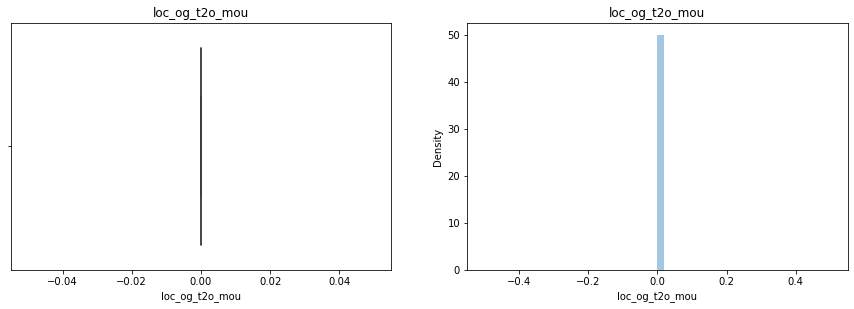

Data for :std_og_t2o_mou
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_og_t2o_mou, dtype: int64


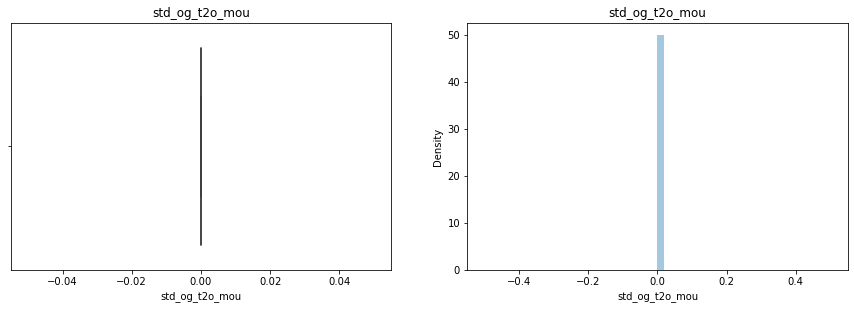

Data for :loc_ic_t2o_mou
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: loc_ic_t2o_mou, dtype: int64


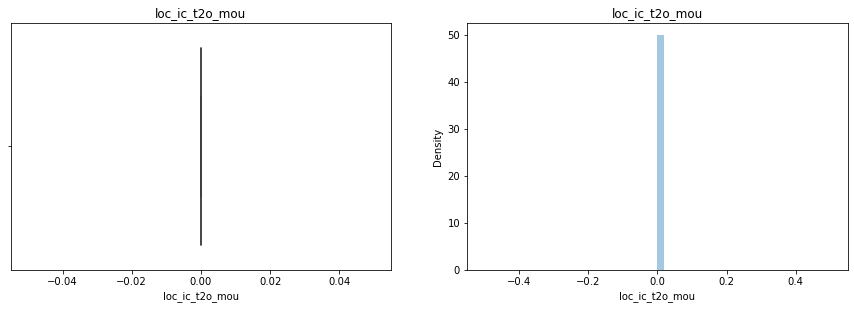

Data for :arpu_6
Describe Data: 
 count    21013.00
mean       558.46
std        474.15
min      -2258.71
25%        307.72
50%        482.62
75%        700.55
max      27731.09
Name: arpu_6, dtype: float64
ValueCount Data: 
 (-2288.7000000000003, 3739.25]    20991
(3739.25, 9737.21]                   17
(9737.21, 15735.169]                  4
(21733.129, 27731.088]                1
(15735.169, 21733.129]                0
Name: arpu_6, dtype: int64


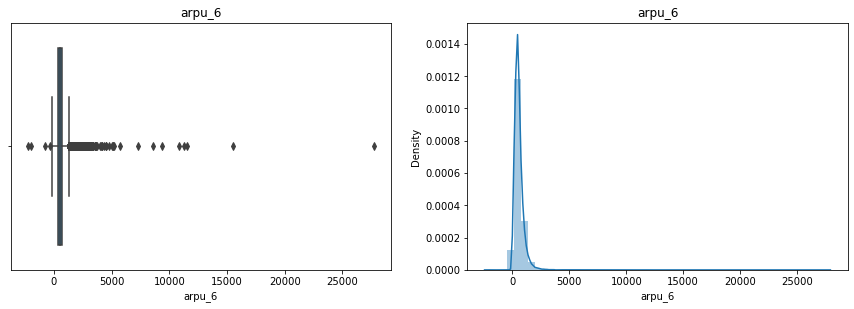

Data for :arpu_7
Describe Data: 
 count    21013.00
mean       558.73
std        494.84
min      -1289.71
25%        308.67
50%        479.72
75%        697.08
max      35145.83
Name: arpu_7, dtype: float64
ValueCount Data: 
 (-1326.152, 5997.395]     21003
(5997.395, 13284.505]         7
(13284.505, 20571.614]        2
(27858.724, 35145.834]        1
(20571.614, 27858.724]        0
Name: arpu_7, dtype: int64


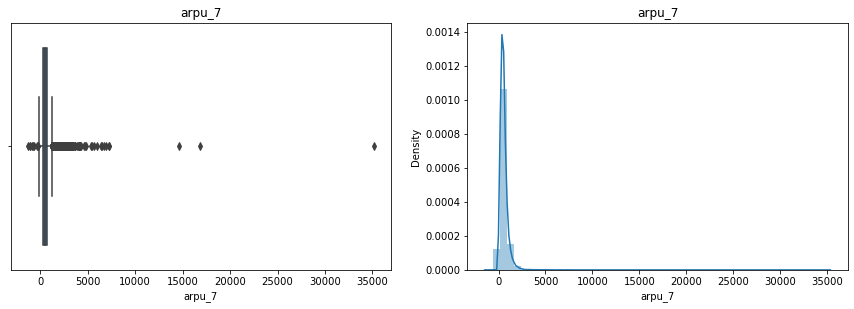

Data for :arpu_8
Describe Data: 
 count    21013.00
mean       506.86
std        519.95
min       -945.81
25%        230.47
50%        427.58
75%        658.70
max      33543.62
Name: arpu_8, dtype: float64
ValueCount Data: 
 (-980.298, 5952.078]      21003
(5952.078, 12849.965]         7
(12849.965, 19747.851]        2
(26645.738, 33543.624]        1
(19747.851, 26645.738]        0
Name: arpu_8, dtype: int64


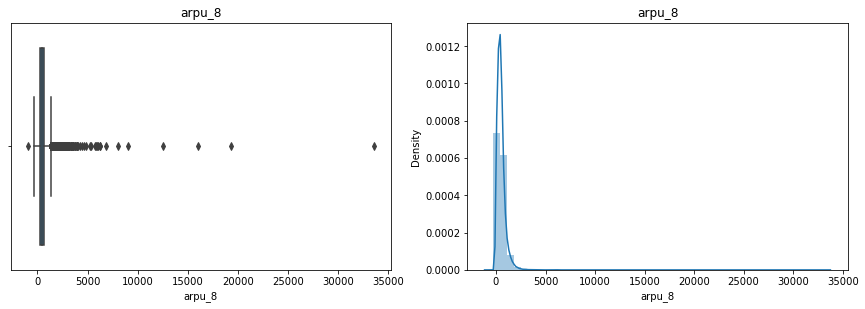

Data for :onnet_mou_6
Describe Data: 
 count    21013.00
mean       260.39
std        465.98
min       -137.81
25%         16.99
50%         84.86
75%        289.36
max       7376.71
Name: onnet_mou_6, dtype: float64
ValueCount Data: 
 (-145.323, 1365.096]    20276
(1365.096, 2867.999]      646
(2867.999, 4370.903]       75
(4370.903, 5873.806]        9
(5873.806, 7376.71]         7
Name: onnet_mou_6, dtype: int64


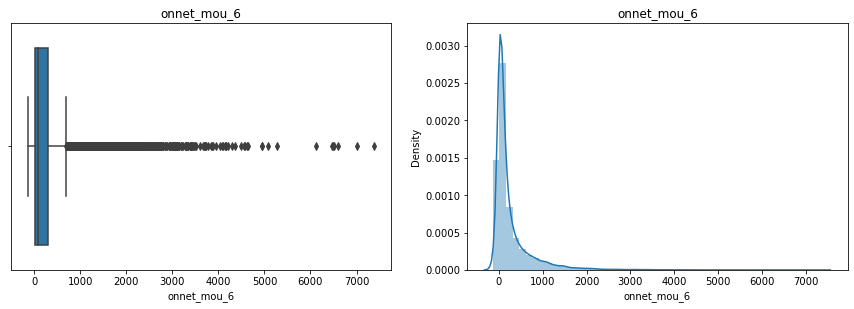

Data for :onnet_mou_7
Describe Data: 
 count    21013.00
mean       265.93
std        487.45
min       -450.74
25%         15.81
50%         82.31
75%        288.73
max       8157.78
Name: onnet_mou_7, dtype: float64
ValueCount Data: 
 (-459.354, 1270.96]    20090
(1270.96, 2992.665]      837
(2992.665, 4714.37]       67
(4714.37, 6436.075]       14
(6436.075, 8157.78]        5
Name: onnet_mou_7, dtype: int64


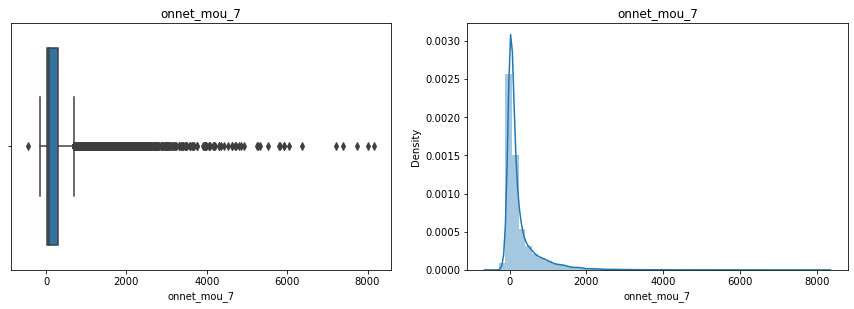

Data for :onnet_mou_8
Describe Data: 
 count    21013.00
mean       228.99
std        468.11
min       -764.15
25%         10.29
50%         65.34
75%        238.04
max      10752.56
Name: onnet_mou_8, dtype: float64
ValueCount Data: 
 (-775.672, 1539.189]    20524
(1539.189, 3842.532]      459
(3842.532, 6145.874]       21
(6145.874, 8449.217]        7
(8449.217, 10752.56]        2
Name: onnet_mou_8, dtype: int64


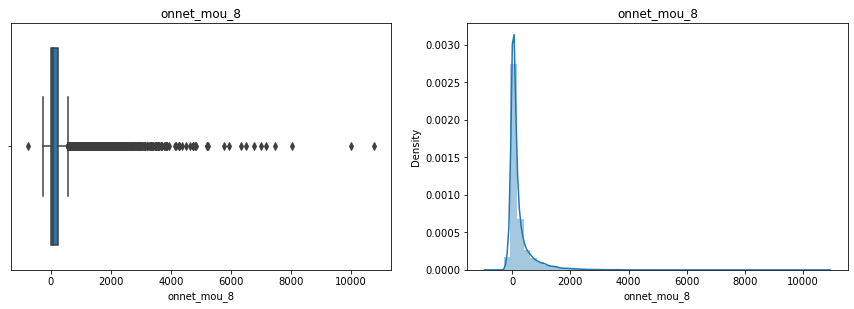

Data for :offnet_mou_6
Describe Data: 
 count    21013.00
mean       379.41
std        479.49
min          0.00
25%         81.61
50%        224.08
75%        492.91
max       8362.36
Name: offnet_mou_6, dtype: float64
ValueCount Data: 
 (-8.363, 1672.472]      20466
(1672.472, 3344.944]      489
(3344.944, 5017.416]       52
(5017.416, 6689.888]        4
(6689.888, 8362.36]         2
Name: offnet_mou_6, dtype: int64


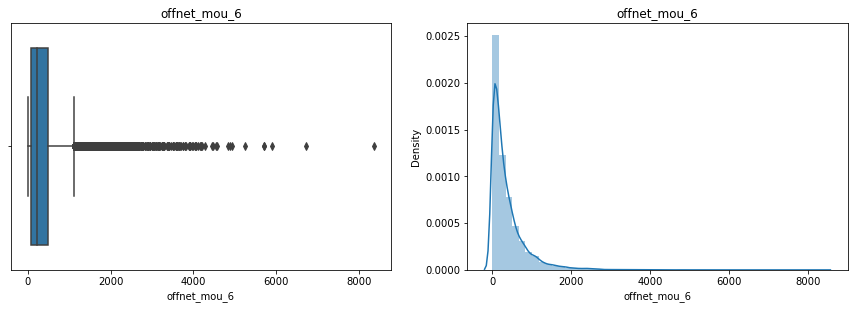

Data for :offnet_mou_7
Describe Data: 
 count    21013.00
mean       380.26
std        490.33
min       -228.45
25%         78.71
50%        219.43
75%        496.81
max       7043.98
Name: offnet_mou_7, dtype: float64
ValueCount Data: 
 (-235.72400000000002, 1226.036]    19865
(1226.036, 2680.522]                1005
(2680.522, 4135.008]                 113
(4135.008, 5589.494]                  25
(5589.494, 7043.98]                    5
Name: offnet_mou_7, dtype: int64


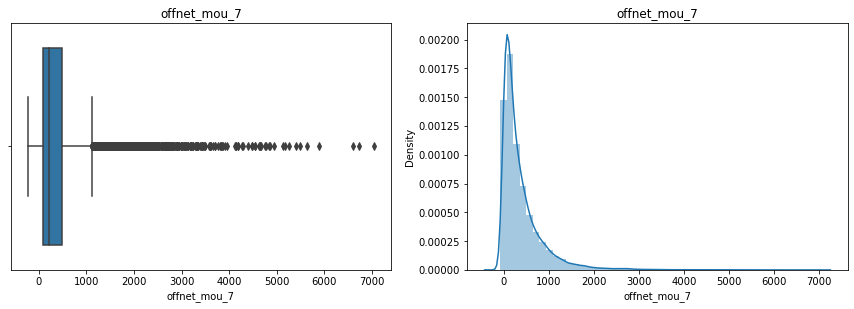

Data for :offnet_mou_8
Describe Data: 
 count    21013.00
mean       341.15
std        473.65
min       -153.85
25%         63.31
50%        183.38
75%        436.84
max      14007.34
Name: offnet_mou_8, dtype: float64
ValueCount Data: 
 (-168.013, 2678.387]     20902
(2678.387, 5510.625]       104
(5510.625, 8342.864]         6
(11175.102, 14007.34]        1
(8342.864, 11175.102]        0
Name: offnet_mou_8, dtype: int64


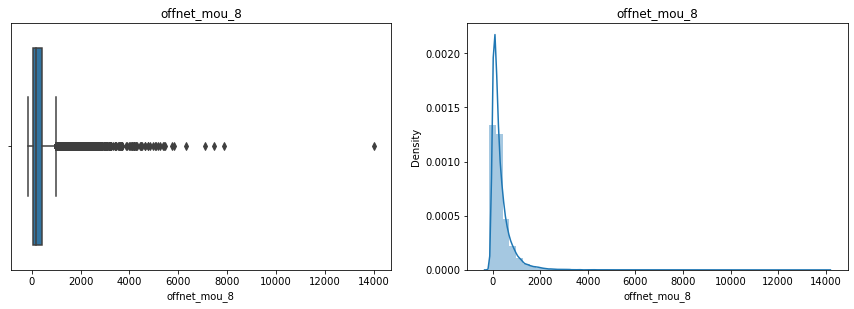

Data for :roam_ic_mou_6
Describe Data: 
 count    21013.00
mean        16.83
std         77.52
min        -18.10
25%          0.00
50%          0.00
75%          0.00
max       2613.31
Name: roam_ic_mou_6, dtype: float64
ValueCount Data: 
 (-20.736, 508.179]      20924
(508.179, 1034.462]        73
(1034.462, 1560.745]       10
(1560.745, 2087.027]        3
(2087.027, 2613.31]         3
Name: roam_ic_mou_6, dtype: int64


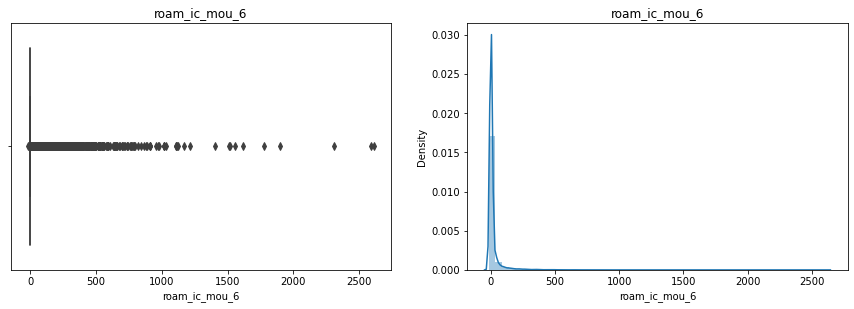

Data for :roam_ic_mou_7
Describe Data: 
 count    21013.00
mean        13.13
std         77.78
min        -52.69
25%          0.00
50%          0.00
75%          0.00
max       3813.29
Name: roam_ic_mou_7, dtype: float64
ValueCount Data: 
 (-56.555, 720.507]      20972
(720.507, 1493.703]        35
(1493.703, 2266.899]        3
(2266.899, 3040.094]        2
(3040.094, 3813.29]         1
Name: roam_ic_mou_7, dtype: int64


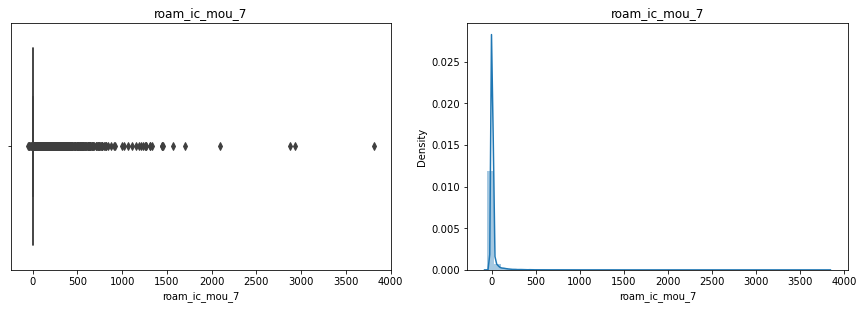

Data for :roam_ic_mou_8
Describe Data: 
 count    21013.00
mean        13.31
std         73.11
min        -57.17
25%          0.00
50%          0.00
75%          0.00
max       4169.81
Name: roam_ic_mou_8, dtype: float64
ValueCount Data: 
 (-61.397999999999996, 788.226]    20984
(788.226, 1633.622]                  24
(1633.622, 2479.018]                  3
(2479.018, 3324.414]                  1
(3324.414, 4169.81]                   1
Name: roam_ic_mou_8, dtype: int64


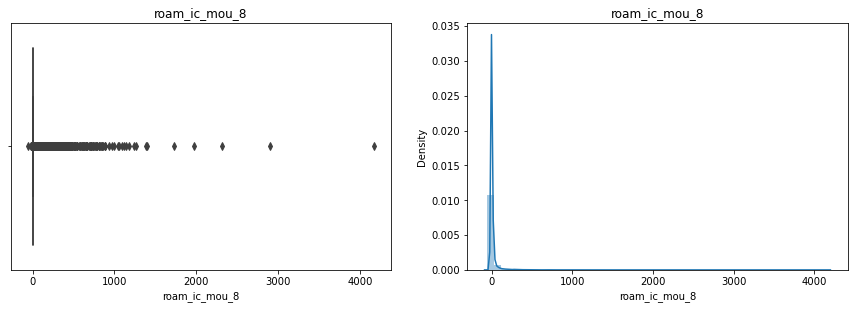

Data for :roam_og_mou_6
Describe Data: 
 count    21013.00
mean        27.69
std        119.90
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       3775.11
Name: roam_og_mou_6, dtype: float64
ValueCount Data: 
 (-3.776, 755.022]       20896
(755.022, 1510.044]        95
(1510.044, 2265.066]       19
(3020.088, 3775.11]         2
(2265.066, 3020.088]        1
Name: roam_og_mou_6, dtype: int64


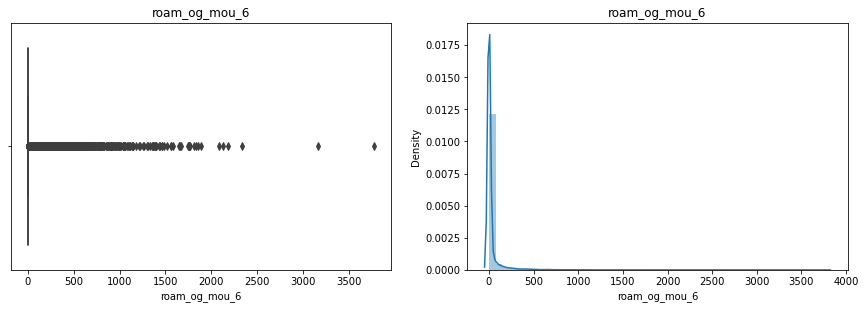

Data for :roam_og_mou_7
Describe Data: 
 count    21013.00
mean        20.28
std         96.43
min        -13.63
25%          0.00
50%          0.00
75%          0.00
max       2812.04
Name: roam_og_mou_7, dtype: float64
ValueCount Data: 
 (-16.458000000000002, 551.503]    20874
(551.503, 1116.637]                 107
(1116.637, 1681.772]                 28
(1681.772, 2246.906]                  3
(2246.906, 2812.04]                   1
Name: roam_og_mou_7, dtype: int64


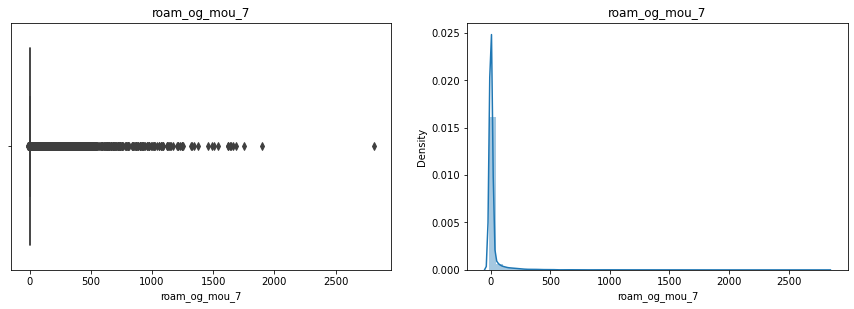

Data for :roam_og_mou_8
Describe Data: 
 count    21013.00
mean        19.58
std        104.45
min         -6.54
25%          0.00
50%          0.00
75%          0.00
max       5337.04
Name: roam_og_mou_8, dtype: float64
ValueCount Data: 
 (-11.881, 1062.179]     20973
(1062.179, 2130.894]       35
(2130.894, 3199.609]        3
(3199.609, 4268.325]        1
(4268.325, 5337.04]         1
Name: roam_og_mou_8, dtype: int64


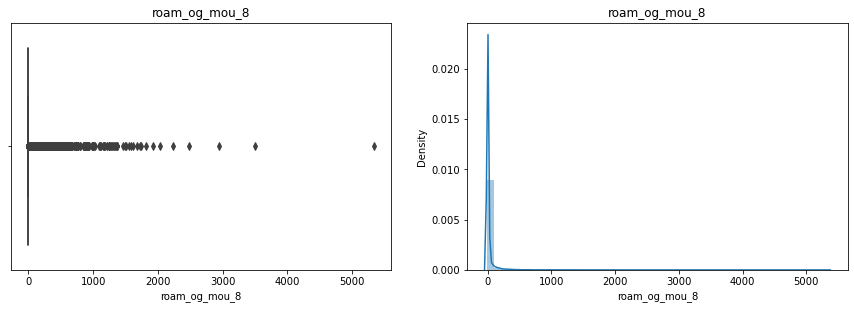

Data for :loc_og_t2t_mou_6
Describe Data: 
 count    21013.00
mean        82.52
std        230.17
min        -79.44
25%          4.36
50%         24.19
75%         77.68
max       6431.33
Name: loc_og_t2t_mou_6, dtype: float64
ValueCount Data: 
 (-85.956, 1222.71]     20854
(1222.71, 2524.865]      124
(2524.865, 3827.02]       28
(3827.02, 5129.175]        4
(5129.175, 6431.33]        3
Name: loc_og_t2t_mou_6, dtype: int64


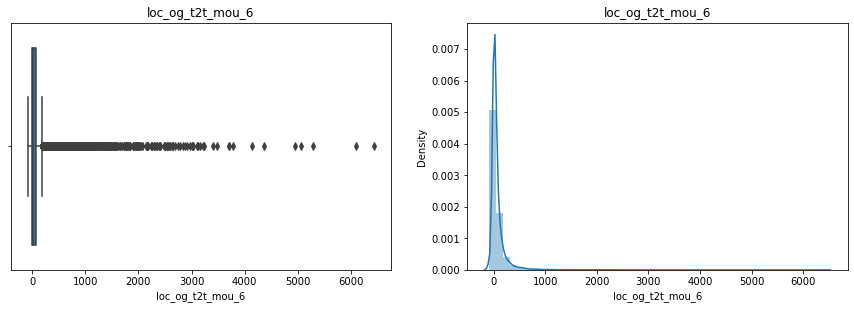

Data for :loc_og_t2t_mou_7
Describe Data: 
 count    21013.00
mean        83.22
std        243.39
min       -106.28
25%          4.54
50%         24.54
75%         77.79
max       7400.66
Name: loc_og_t2t_mou_7, dtype: float64
ValueCount Data: 
 (-113.78800000000001, 1395.108]    20881
(1395.108, 2896.496]                 107
(2896.496, 4397.884]                  16
(4397.884, 5899.272]                   6
(5899.272, 7400.66]                    3
Name: loc_og_t2t_mou_7, dtype: int64


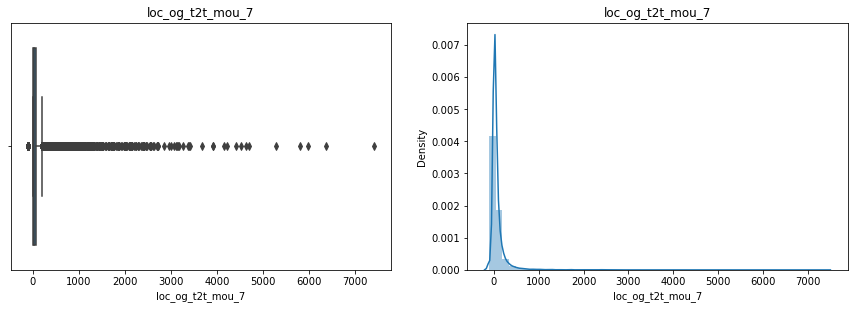

Data for :loc_og_t2t_mou_8
Describe Data: 
 count    21013.00
mean        73.36
std        234.06
min       -111.24
25%          2.59
50%         20.56
75%         71.23
max      10752.56
Name: loc_og_t2t_mou_8, dtype: float64
ValueCount Data: 
 (-122.107, 2061.518]    20966
(2061.518, 4234.279]       43
(8579.8, 10752.56]          2
(4234.279, 6407.039]        1
(6407.039, 8579.8]          1
Name: loc_og_t2t_mou_8, dtype: int64


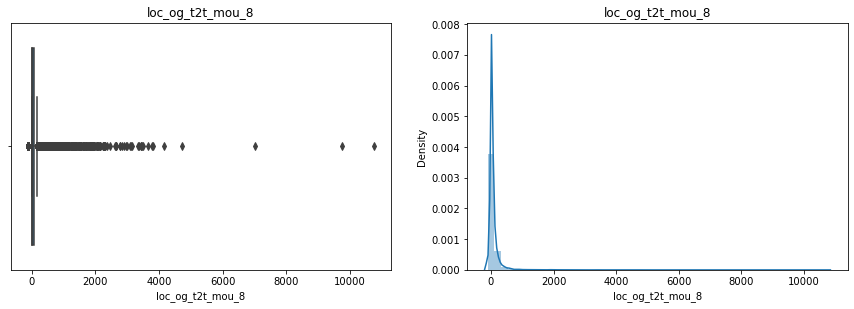

Data for :loc_og_t2m_mou_6
Describe Data: 
 count    21013.00
mean       164.35
std        247.73
min          0.00
25%         21.98
50%         83.53
75%        207.48
max       4696.83
Name: loc_og_t2m_mou_6, dtype: float64
ValueCount Data: 
 (-4.698, 939.366]       20670
(939.366, 1878.732]       293
(1878.732, 2818.098]       42
(2818.098, 3757.464]        5
(3757.464, 4696.83]         3
Name: loc_og_t2m_mou_6, dtype: int64


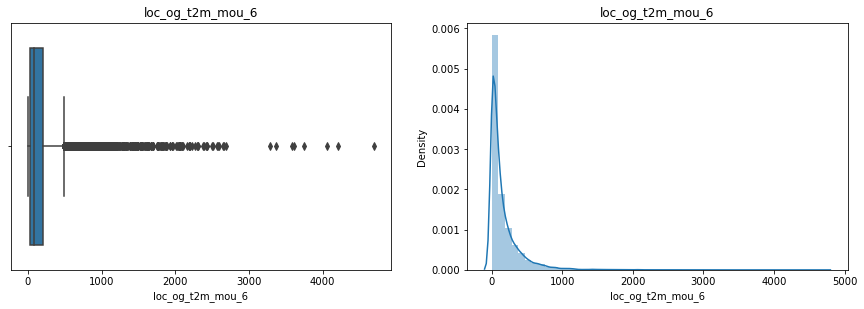

Data for :loc_og_t2m_mou_7
Describe Data: 
 count    21013.00
mean       162.76
std        234.12
min          0.00
25%         23.26
50%         84.36
75%        206.43
max       4557.14
Name: loc_og_t2m_mou_7, dtype: float64
ValueCount Data: 
 (-4.558000000000001, 911.428]    20661
(911.428, 1822.856]                315
(1822.856, 2734.284]                31
(2734.284, 3645.712]                 5
(3645.712, 4557.14]                  1
Name: loc_og_t2m_mou_7, dtype: int64


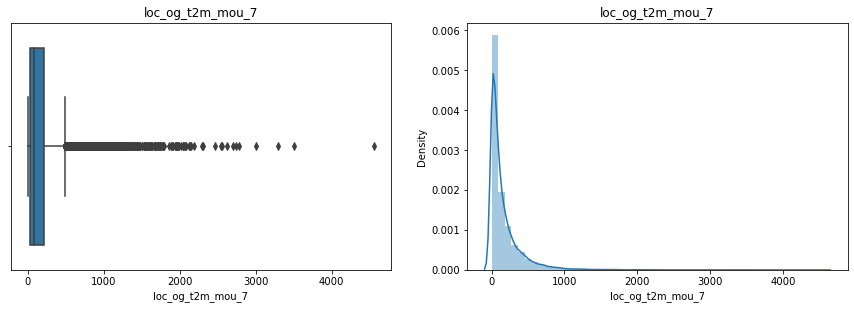

Data for :loc_og_t2m_mou_8
Describe Data: 
 count    21013.00
mean       153.58
std        226.29
min          0.00
25%         19.13
50%         81.63
75%        196.39
max       4961.33
Name: loc_og_t2m_mou_8, dtype: float64
ValueCount Data: 
 (-4.962000000000001, 992.266]    20762
(992.266, 1984.532]                225
(1984.532, 2976.798]                22
(2976.798, 3969.064]                 2
(3969.064, 4961.33]                  2
Name: loc_og_t2m_mou_8, dtype: int64


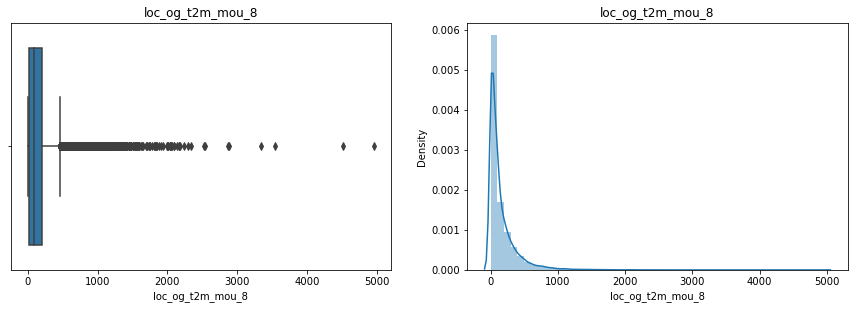

Data for :loc_og_t2f_mou_6
Describe Data: 
 count    21013.00
mean         6.32
std         20.18
min          0.00
25%          0.00
50%          0.25
75%          4.18
max        617.58
Name: loc_og_t2f_mou_6, dtype: float64
ValueCount Data: 
 (-0.619, 123.516]     20918
(123.516, 247.032]       71
(247.032, 370.548]       17
(370.548, 494.064]        4
(494.064, 617.58]         3
Name: loc_og_t2f_mou_6, dtype: int64


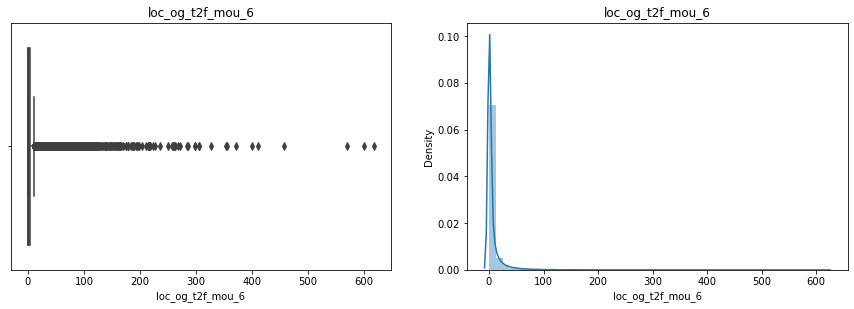

Data for :loc_og_t2f_mou_7
Describe Data: 
 count    21013.00
mean         6.41
std         20.46
min          0.00
25%          0.00
50%          0.28
75%          4.29
max        815.33
Name: loc_og_t2f_mou_7, dtype: float64
ValueCount Data: 
 (-0.816, 163.066]     20958
(163.066, 326.132]       45
(326.132, 489.198]        8
(489.198, 652.264]        1
(652.264, 815.33]         1
Name: loc_og_t2f_mou_7, dtype: int64


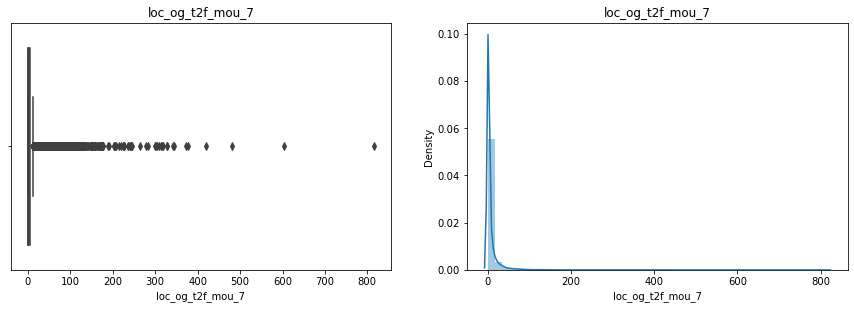

Data for :loc_og_t2f_mou_8
Describe Data: 
 count    21013.00
mean         6.00
std         18.98
min          0.00
25%          0.00
50%          0.26
75%          3.86
max        588.29
Name: loc_og_t2f_mou_8, dtype: float64
ValueCount Data: 
 (-0.589, 117.658]     20916
(117.658, 235.316]       78
(235.316, 352.974]       12
(470.632, 588.29]         4
(352.974, 470.632]        3
Name: loc_og_t2f_mou_8, dtype: int64


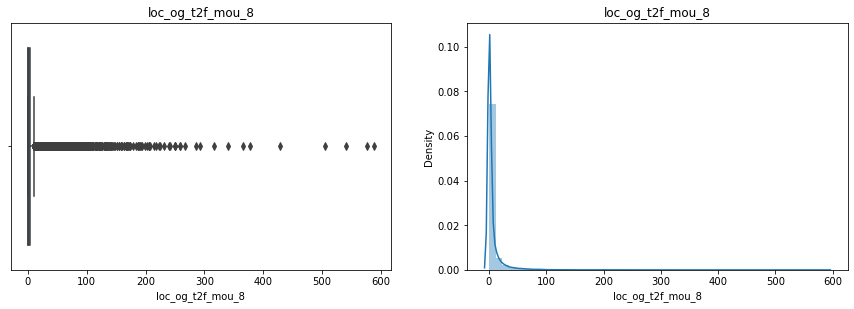

Data for :loc_og_t2c_mou_6
Describe Data: 
 count    21013.00
mean         1.60
std          6.64
min         -5.50
25%          0.00
50%          0.00
75%          0.08
max        271.44
Name: loc_og_t2c_mou_6, dtype: float64
ValueCount Data: 
 (-5.7780000000000005, 49.888]    20960
(49.888, 105.276]                   40
(105.276, 160.664]                   9
(160.664, 216.052]                   3
(216.052, 271.44]                    1
Name: loc_og_t2c_mou_6, dtype: int64


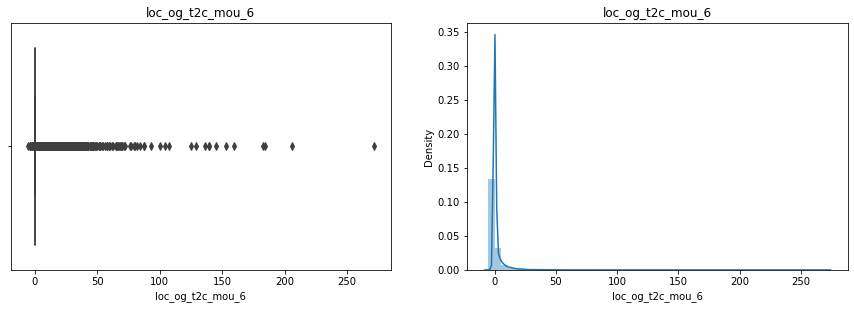

Data for :loc_og_t2c_mou_7
Describe Data: 
 count    21013.00
mean         1.80
std          9.43
min        -27.90
25%          0.00
50%          0.00
75%          0.08
max        569.71
Name: loc_og_t2c_mou_7, dtype: float64
ValueCount Data: 
 (-28.494, 91.626]     20993
(91.626, 211.147]        14
(211.147, 330.668]        2
(330.668, 450.189]        2
(450.189, 569.71]         2
Name: loc_og_t2c_mou_7, dtype: int64


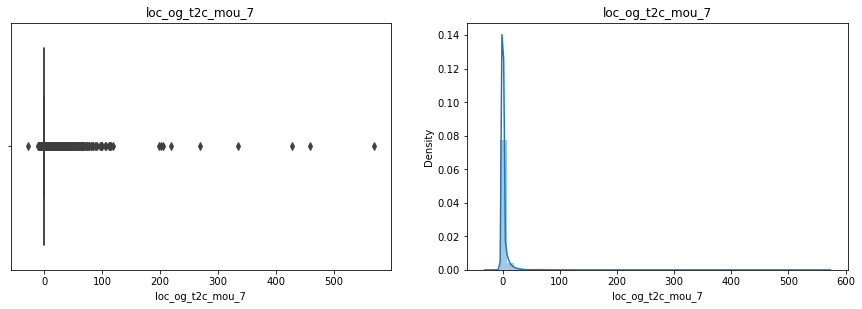

Data for :loc_og_t2c_mou_8
Describe Data: 
 count    21013.00
mean         1.67
std          7.08
min        -14.63
25%          0.00
50%          0.00
75%          0.10
max        351.83
Name: loc_og_t2c_mou_8, dtype: float64
ValueCount Data: 
 (-15.001999999999999, 58.659]    20970
(58.659, 131.951]                   37
(131.951, 205.244]                   4
(278.537, 351.83]                    2
(205.244, 278.537]                   0
Name: loc_og_t2c_mou_8, dtype: int64


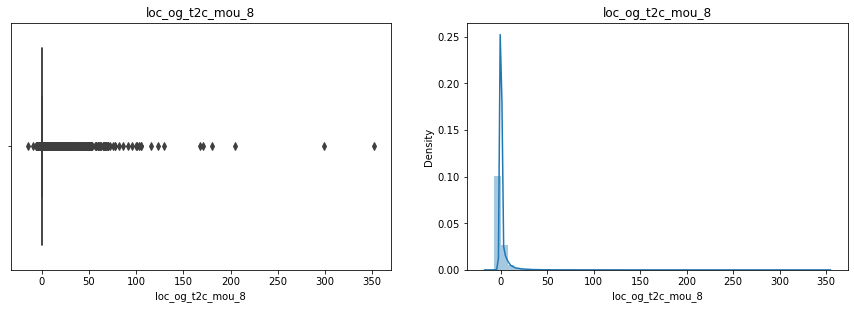

Data for :loc_og_mou_6
Describe Data: 
 count    21013.00
mean       253.06
std        379.29
min          0.00
25%         32.41
50%        123.93
75%        331.04
max      10643.38
Name: loc_og_mou_6, dtype: float64
ValueCount Data: 
 (-10.644, 2128.676]     20887
(2128.676, 4257.352]      117
(4257.352, 6386.028]        8
(8514.704, 10643.38]        1
(6386.028, 8514.704]        0
Name: loc_og_mou_6, dtype: int64


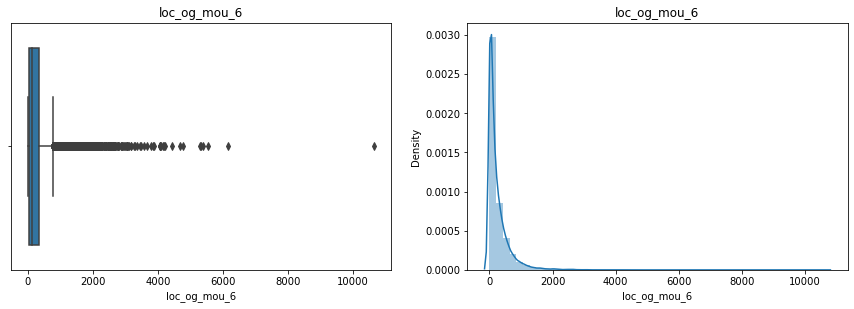

Data for :loc_og_mou_7
Describe Data: 
 count    21013.00
mean       252.28
std        373.46
min        -22.19
25%         33.99
50%        126.83
75%        327.49
max       7674.78
Name: loc_og_mou_7, dtype: float64
ValueCount Data: 
 (-29.886000000000003, 1517.205]    20721
(1517.205, 3056.599]                 258
(3056.599, 4595.993]                  22
(4595.993, 6135.386]                   9
(6135.386, 7674.78]                    3
Name: loc_og_mou_7, dtype: int64


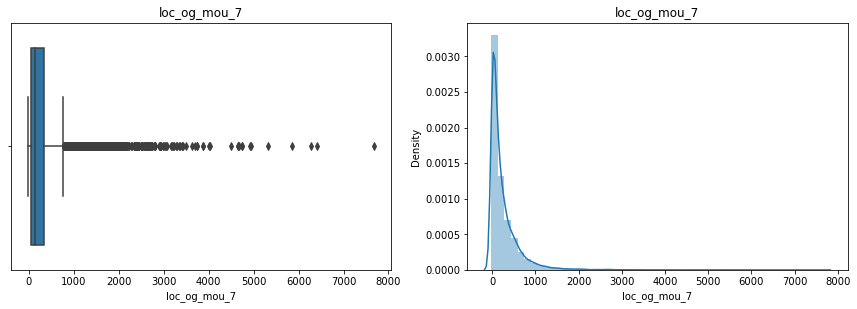

Data for :loc_og_mou_8
Describe Data: 
 count    21013.00
mean       232.68
std        363.72
min        -23.73
25%         22.61
50%        110.74
75%        308.59
max      11039.91
Name: loc_og_mou_8, dtype: float64
ValueCount Data: 
 (-34.793, 2188.999]     20939
(2188.999, 4401.727]       67
(4401.727, 6614.455]        4
(8827.182, 11039.91]        2
(6614.455, 8827.182]        1
Name: loc_og_mou_8, dtype: int64


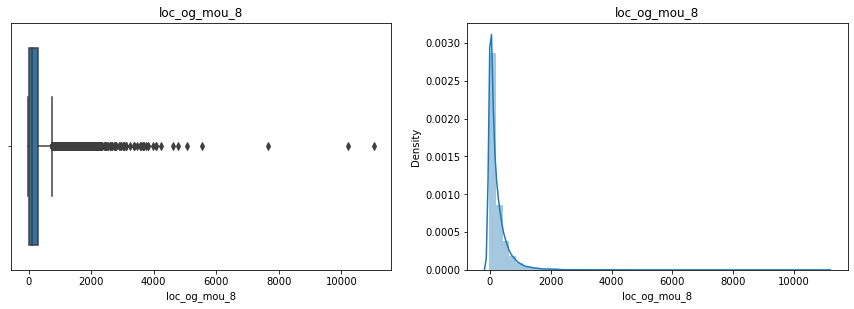

Data for :std_og_t2t_mou_6
Describe Data: 
 count    21013.00
mean       168.43
std        407.92
min          0.00
25%          0.00
50%          4.41
75%        111.78
max       7366.58
Name: std_og_t2t_mou_6, dtype: float64
ValueCount Data: 
 (-7.368, 1473.316]      20593
(1473.316, 2946.632]      366
(2946.632, 4419.948]       44
(4419.948, 5893.264]        5
(5893.264, 7366.58]         5
Name: std_og_t2t_mou_6, dtype: int64


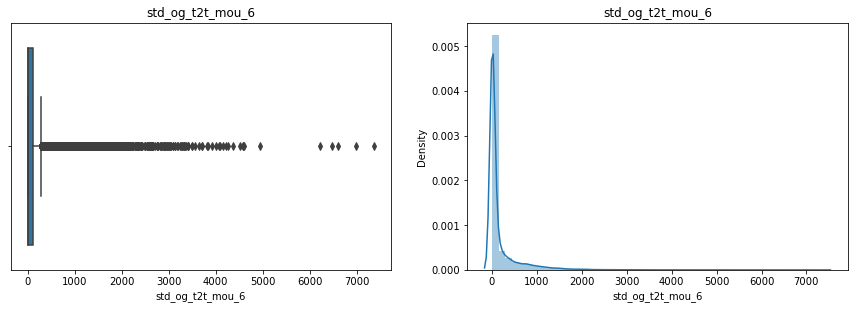

Data for :std_og_t2t_mou_7
Describe Data: 
 count    21013.00
mean       175.34
std        426.62
min          0.00
25%          0.00
50%          4.28
75%        115.33
max       8133.66
Name: std_og_t2t_mou_7, dtype: float64
ValueCount Data: 
 (-8.135, 1626.732]      20667
(1626.732, 3253.464]      301
(3253.464, 4880.196]       35
(4880.196, 6506.928]        6
(6506.928, 8133.66]         4
Name: std_og_t2t_mou_7, dtype: int64


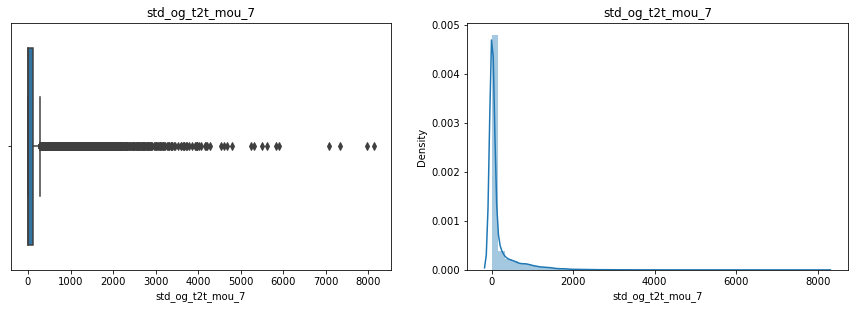

Data for :std_og_t2t_mou_8
Describe Data: 
 count    21013.00
mean       150.36
std        400.88
min          0.00
25%          0.00
50%          2.63
75%         79.03
max       8014.43
Name: std_og_t2t_mou_8, dtype: float64
ValueCount Data: 
 (-8.014999999999999, 1602.886]    20707
(1602.886, 3205.772]                263
(3205.772, 4808.658]                 31
(4808.658, 6411.544]                  7
(6411.544, 8014.43]                   5
Name: std_og_t2t_mou_8, dtype: int64


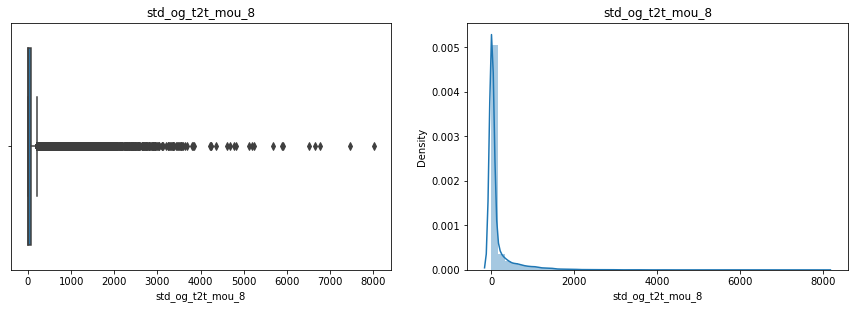

Data for :std_og_t2m_mou_6
Describe Data: 
 count    21013.00
mean       183.78
std        408.19
min          0.00
25%          0.00
50%         20.91
75%        158.93
max       8314.76
Name: std_og_t2m_mou_6, dtype: float64
ValueCount Data: 
 (-8.315999999999999, 1662.952]    20674
(1662.952, 3325.904]                302
(3325.904, 4988.856]                 32
(4988.856, 6651.808]                  4
(6651.808, 8314.76]                   1
Name: std_og_t2m_mou_6, dtype: int64


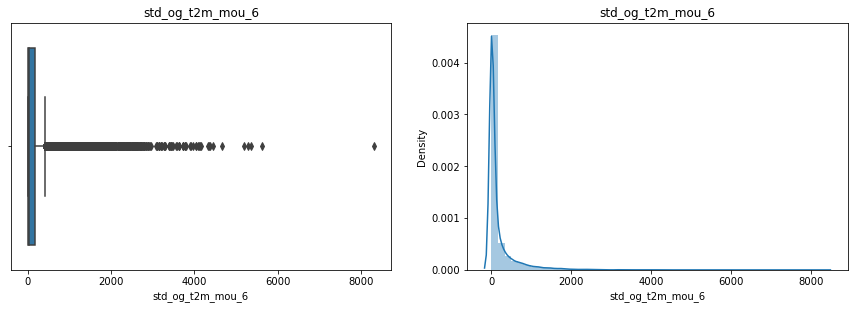

Data for :std_og_t2m_mou_7
Describe Data: 
 count    21013.00
mean       191.20
std        428.90
min          0.00
25%          0.00
50%         20.28
75%        163.56
max       6622.54
Name: std_og_t2m_mou_7, dtype: float64
ValueCount Data: 
 (-6.6240000000000006, 1324.508]    20404
(1324.508, 2649.016]                 511
(2649.016, 3973.524]                  73
(3973.524, 5298.032]                  20
(5298.032, 6622.54]                    5
Name: std_og_t2m_mou_7, dtype: int64


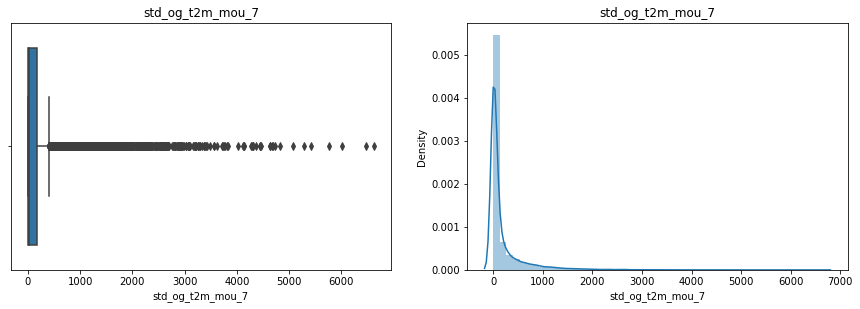

Data for :std_og_t2m_mou_8
Describe Data: 
 count    21013.00
mean       162.90
std        405.33
min          0.00
25%          0.00
50%         15.56
75%        121.58
max      13950.04
Name: std_og_t2m_mou_8, dtype: float64
ValueCount Data: 
 (-13.950999999999999, 2790.008]    20939
(2790.008, 5580.016]                  69
(5580.016, 8370.024]                   4
(11160.032, 13950.04]                  1
(8370.024, 11160.032]                  0
Name: std_og_t2m_mou_8, dtype: int64


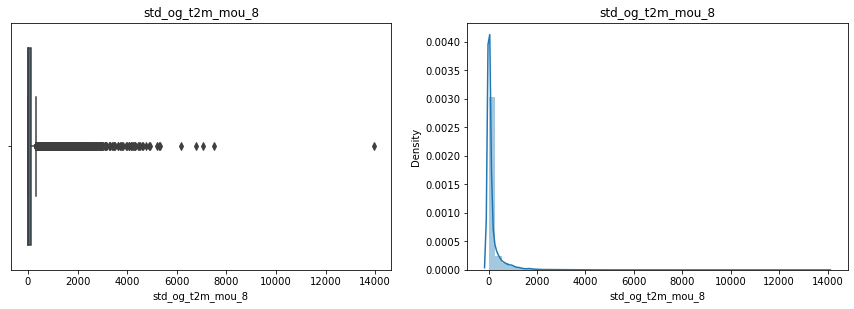

Data for :std_og_t2f_mou_6
Describe Data: 
 count    21013.00
mean         1.80
std         12.22
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        628.56
Name: std_og_t2f_mou_6, dtype: float64
ValueCount Data: 
 (-0.63, 125.712]      20978
(125.712, 251.424]       24
(251.424, 377.136]       10
(502.848, 628.56]         1
(377.136, 502.848]        0
Name: std_og_t2f_mou_6, dtype: int64


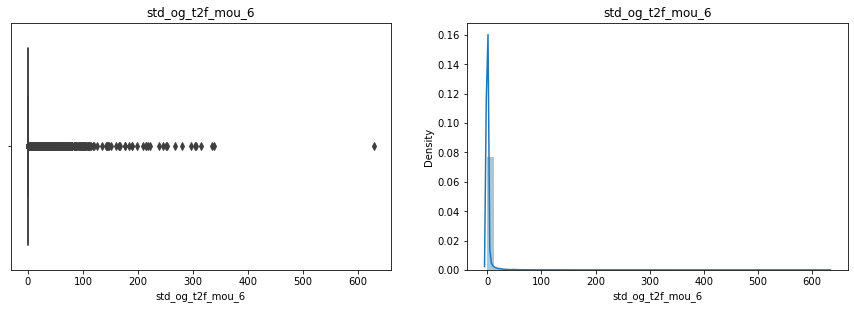

Data for :std_og_t2f_mou_7
Describe Data: 
 count    21013.00
mean         1.74
std         12.42
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        465.79
Name: std_og_t2f_mou_7, dtype: float64
ValueCount Data: 
 (-0.467, 93.158]      20949
(93.158, 186.316]        46
(186.316, 279.474]       10
(372.632, 465.79]         5
(279.474, 372.632]        3
Name: std_og_t2f_mou_7, dtype: int64


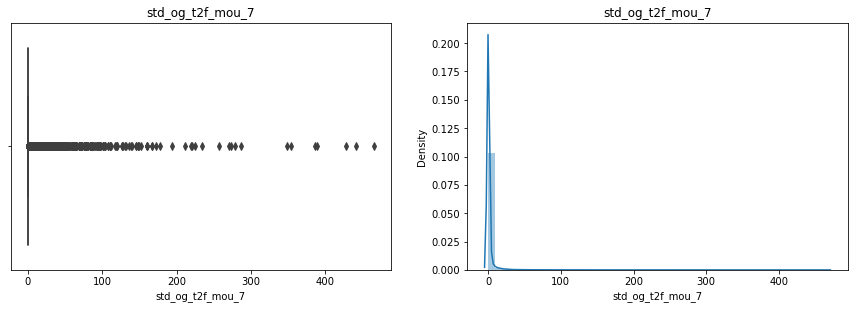

Data for :std_og_t2f_mou_8
Describe Data: 
 count    21013.00
mean         1.59
std         10.55
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        354.16
Name: std_og_t2f_mou_8, dtype: float64
ValueCount Data: 
 (-0.355, 70.832]      20931
(70.832, 141.664]        55
(141.664, 212.496]       16
(212.496, 283.328]        7
(283.328, 354.16]         4
Name: std_og_t2f_mou_8, dtype: int64


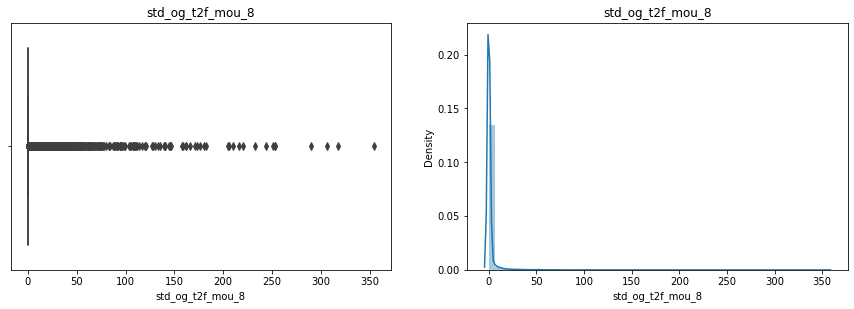

Data for :std_og_t2c_mou_6
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2c_mou_6, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_og_t2c_mou_6, dtype: int64


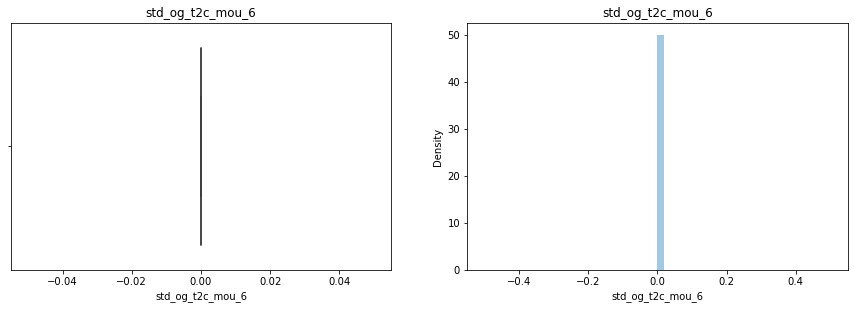

Data for :std_og_t2c_mou_7
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2c_mou_7, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_og_t2c_mou_7, dtype: int64


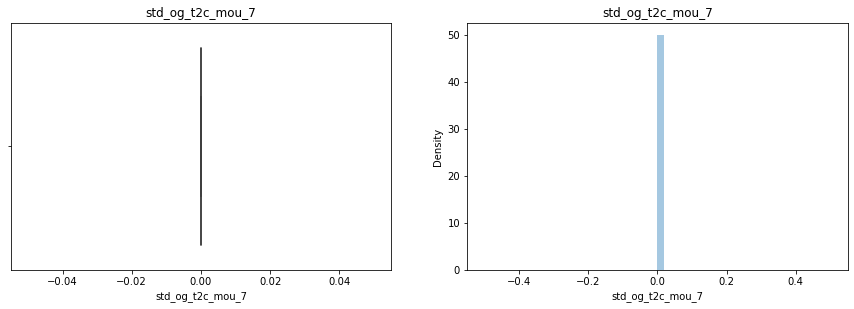

Data for :std_og_t2c_mou_8
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2c_mou_8, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_og_t2c_mou_8, dtype: int64


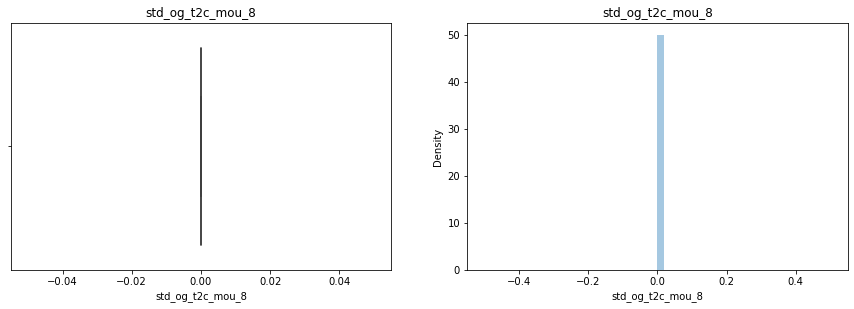

Data for :std_og_mou_6
Describe Data: 
 count    21013.00
mean       353.94
std        610.08
min          0.00
25%          0.91
50%         58.91
75%        474.53
max       8432.99
Name: std_og_mou_6, dtype: float64
ValueCount Data: 
 (-8.434, 1686.598]      20131
(1686.598, 3373.196]      778
(3373.196, 5059.794]       88
(5059.794, 6746.392]       13
(6746.392, 8432.99]         3
Name: std_og_mou_6, dtype: int64


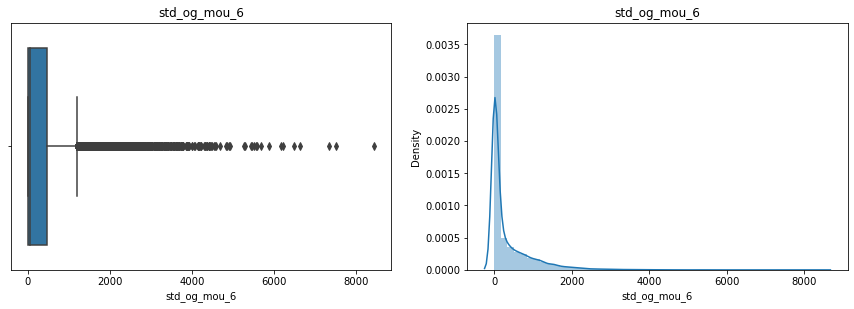

Data for :std_og_mou_7
Describe Data: 
 count    21013.00
mean       368.23
std        638.50
min          0.00
25%          0.65
50%         57.23
75%        502.48
max       8155.53
Name: std_og_mou_7, dtype: float64
ValueCount Data: 
 (-8.157, 1631.106]      19981
(1631.106, 3262.212]      903
(3262.212, 4893.318]      105
(4893.318, 6524.424]       16
(6524.424, 8155.53]         8
Name: std_og_mou_7, dtype: int64


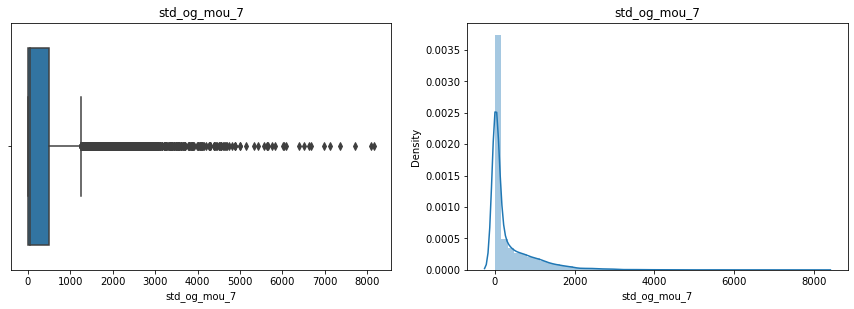

Data for :std_og_mou_8
Describe Data: 
 count    21013.00
mean       314.76
std        606.01
min          0.00
25%          0.01
50%         43.01
75%        360.18
max      13980.06
Name: std_og_mou_8, dtype: float64
ValueCount Data: 
 (-13.981, 2796.012]      20809
(2796.012, 5592.024]       187
(5592.024, 8388.036]        16
(11184.048, 13980.06]        1
(8388.036, 11184.048]        0
Name: std_og_mou_8, dtype: int64


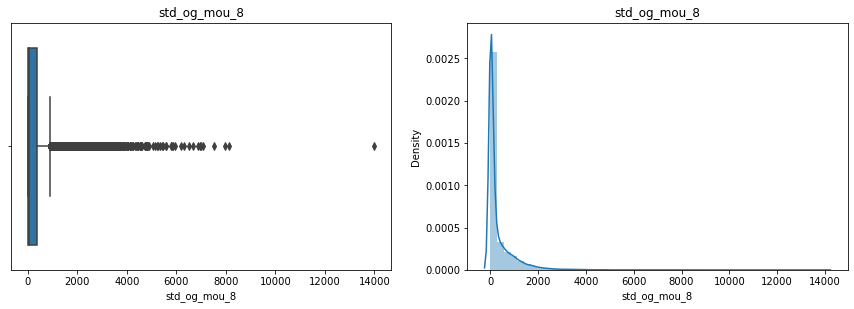

Data for :isd_og_mou_6
Describe Data: 
 count    21013.00
mean         0.06
std         55.58
min       -120.21
25%          0.00
50%          0.00
75%          0.00
max       5900.66
Name: isd_og_mou_6, dtype: float64
ValueCount Data: 
 (-126.23100000000001, 1083.965]    21008
(1083.965, 2288.139]                   3
(2288.139, 3492.313]                   1
(4696.486, 5900.66]                    1
(3492.313, 4696.486]                   0
Name: isd_og_mou_6, dtype: int64


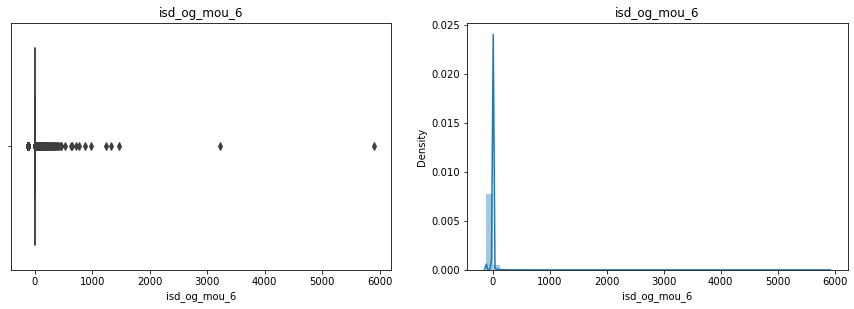

Data for :isd_og_mou_7
Describe Data: 
 count    21013.00
mean         0.28
std         54.02
min       -103.79
25%          0.00
50%          0.00
75%          0.00
max       5490.28
Name: isd_og_mou_7, dtype: float64
ValueCount Data: 
 (-109.388, 1015.022]    21010
(1015.022, 2133.836]        1
(3252.651, 4371.465]        1
(4371.465, 5490.28]         1
(2133.836, 3252.651]        0
Name: isd_og_mou_7, dtype: int64


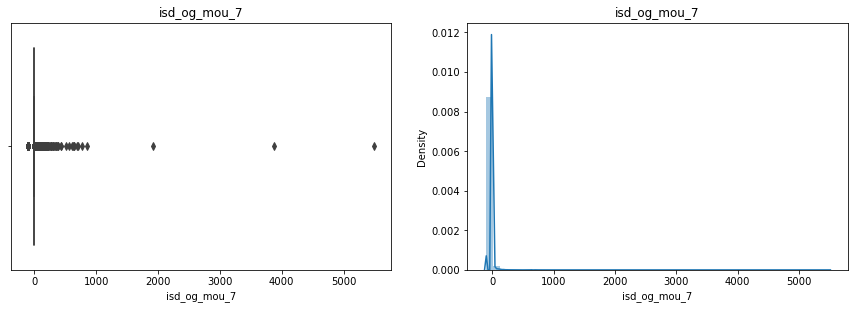

Data for :isd_og_mou_8
Describe Data: 
 count    21013.00
mean        -1.99
std         55.98
min       -105.40
25%          0.00
50%          0.00
75%          0.00
max       5681.54
Name: isd_og_mou_8, dtype: float64
ValueCount Data: 
 (-111.18900000000001, 1051.987]    21010
(1051.987, 2209.376]                   1
(3366.764, 4524.152]                   1
(4524.152, 5681.54]                    1
(2209.376, 3366.764]                   0
Name: isd_og_mou_8, dtype: int64


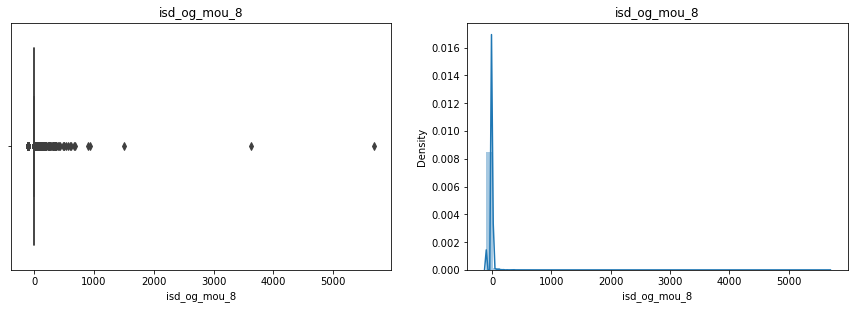

Data for :spl_og_mou_6
Describe Data: 
 count    21013.00
mean         5.82
std         18.27
min         -3.37
25%          0.00
50%          0.21
75%          5.21
max       1023.21
Name: spl_og_mou_6, dtype: float64
ValueCount Data: 
 (-4.398000000000001, 201.946]    20989
(201.946, 407.262]                  19
(407.262, 612.578]                   4
(817.894, 1023.21]                   1
(612.578, 817.894]                   0
Name: spl_og_mou_6, dtype: int64


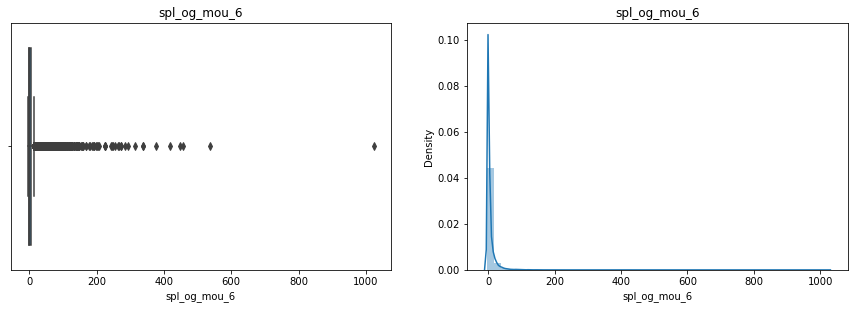

Data for :spl_og_mou_7
Describe Data: 
 count    21013.00
mean         7.15
std         23.34
min          0.00
25%          0.00
50%          0.68
75%          6.94
max       1265.79
Name: spl_og_mou_7, dtype: float64
ValueCount Data: 
 (-1.267, 253.158]      20988
(253.158, 506.316]        19
(506.316, 759.474]         3
(1012.632, 1265.79]        2
(759.474, 1012.632]        1
Name: spl_og_mou_7, dtype: int64


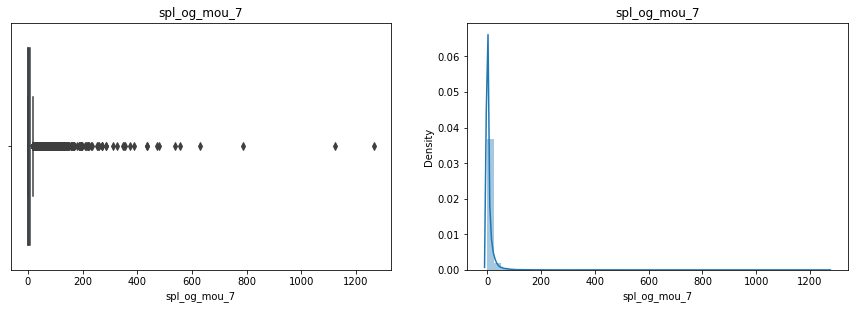

Data for :spl_og_mou_8
Describe Data: 
 count    21013.00
mean         6.84
std         21.53
min          0.00
25%          0.00
50%          0.88
75%          6.13
max        954.51
Name: spl_og_mou_8, dtype: float64
ValueCount Data: 
 (-0.956, 190.902]     20971
(190.902, 381.804]       28
(381.804, 572.706]       12
(763.608, 954.51]         2
(572.706, 763.608]        0
Name: spl_og_mou_8, dtype: int64


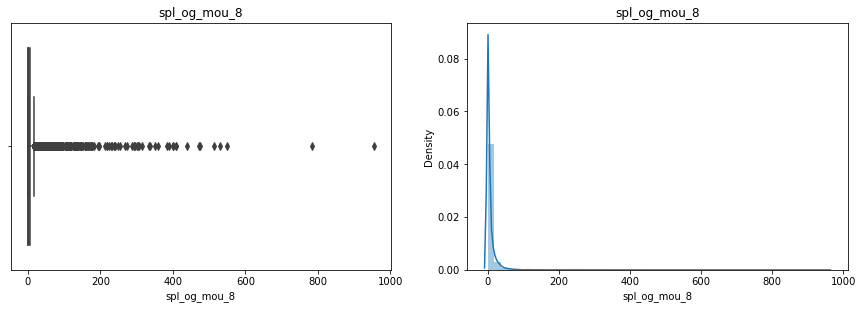

Data for :og_others_6
Describe Data: 
 count    21013.00
mean         0.68
std          4.72
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        609.81
Name: og_others_6, dtype: float64
ValueCount Data: 
 (-0.611, 121.962]     21012
(487.848, 609.81]         1
(121.962, 243.924]        0
(243.924, 365.886]        0
(365.886, 487.848]        0
Name: og_others_6, dtype: int64


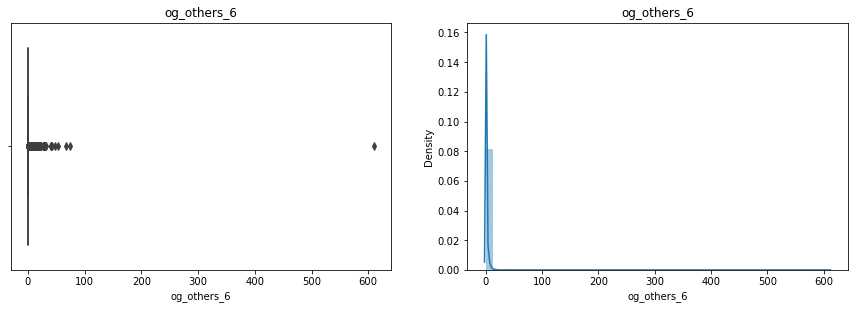

Data for :og_others_7
Describe Data: 
 count    21013.00
mean         0.03
std          1.67
min         -0.02
25%          0.00
50%          0.00
75%          0.00
max        221.94
Name: og_others_7, dtype: float64
ValueCount Data: 
 (-0.247, 44.369]      21011
(44.369, 88.762]          1
(177.547, 221.94]         1
(88.762, 133.154]         0
(133.154, 177.547]        0
Name: og_others_7, dtype: int64


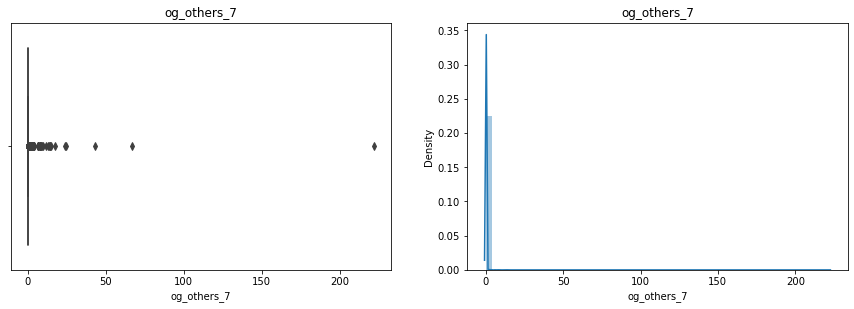

Data for :og_others_8
Describe Data: 
 count    21013.00
mean         0.06
std          3.08
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        394.93
Name: og_others_8, dtype: float64
ValueCount Data: 
 (-0.396, 78.986]      21010
(78.986, 157.972]         2
(315.944, 394.93]         1
(157.972, 236.958]        0
(236.958, 315.944]        0
Name: og_others_8, dtype: int64


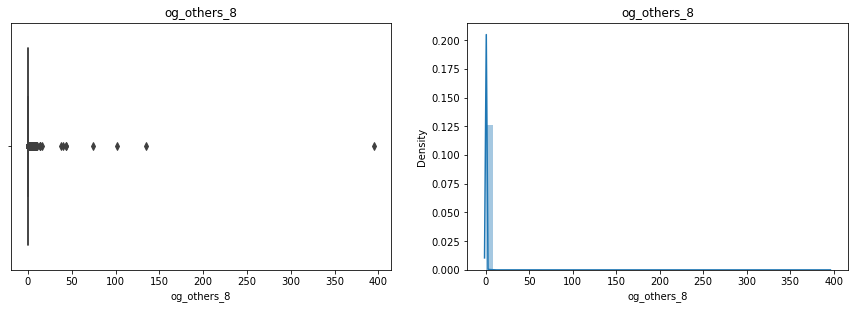

Data for :total_og_mou_6
Describe Data: 
 count    21013.00
mean       613.54
std        693.52
min          0.00
25%        116.24
50%        411.69
75%        864.74
max      10674.03
Name: total_og_mou_6, dtype: float64
ValueCount Data: 
 (-10.674999999999999, 2134.806]    20228
(2134.806, 4269.612]                 723
(4269.612, 6404.418]                  55
(6404.418, 8539.224]                   6
(8539.224, 10674.03]                   1
Name: total_og_mou_6, dtype: int64


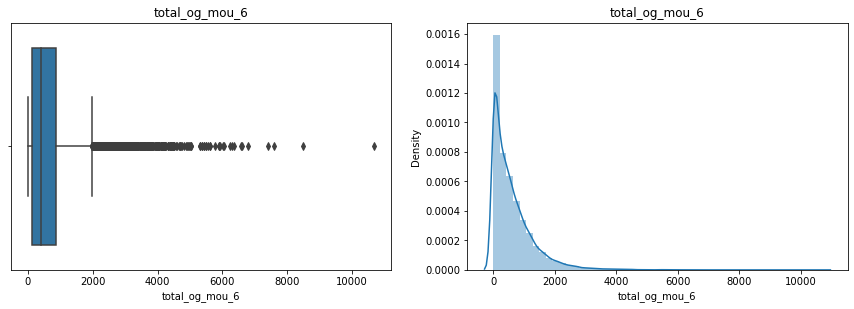

Data for :total_og_mou_7
Describe Data: 
 count    21013.00
mean       627.97
std        716.06
min          0.00
25%        116.24
50%        424.41
75%        890.53
max       8285.64
Name: total_og_mou_7, dtype: float64
ValueCount Data: 
 (-8.286999999999999, 1657.128]    19398
(1657.128, 3314.256]               1414
(3314.256, 4971.384]                162
(4971.384, 6628.512]                 29
(6628.512, 8285.64]                  10
Name: total_og_mou_7, dtype: int64


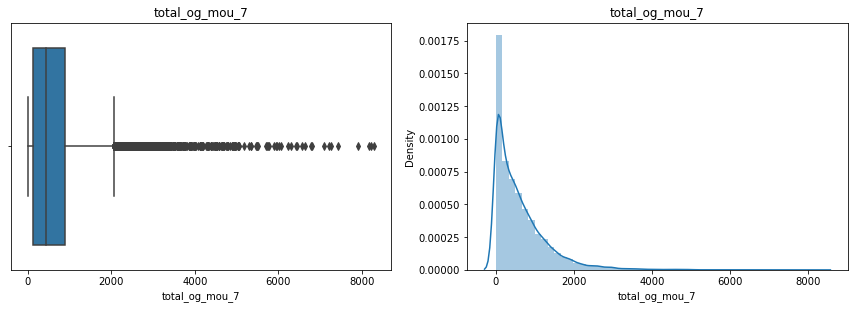

Data for :total_og_mou_8
Describe Data: 
 count    21013.00
mean       552.32
std        701.30
min          0.00
25%         73.24
50%        334.88
75%        775.88
max      14043.06
Name: total_og_mou_8, dtype: float64
ValueCount Data: 
 (-14.043999999999999, 2808.612]    20692
(2808.612, 5617.224]                 295
(5617.224, 8425.836]                  23
(8425.836, 11234.448]                  2
(11234.448, 14043.06]                  1
Name: total_og_mou_8, dtype: int64


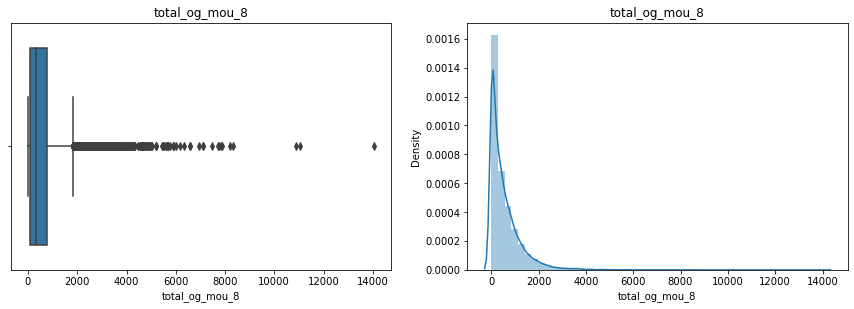

Data for :loc_ic_t2t_mou_6
Describe Data: 
 count    21013.00
mean        64.30
std        162.88
min        -47.33
25%          6.11
50%         24.74
75%         67.13
max       4363.96
Name: loc_ic_t2t_mou_6, dtype: float64
ValueCount Data: 
 (-51.744, 834.926]      20876
(834.926, 1717.185]        98
(1717.185, 2599.443]       23
(2599.443, 3481.702]       11
(3481.702, 4363.96]         5
Name: loc_ic_t2t_mou_6, dtype: int64


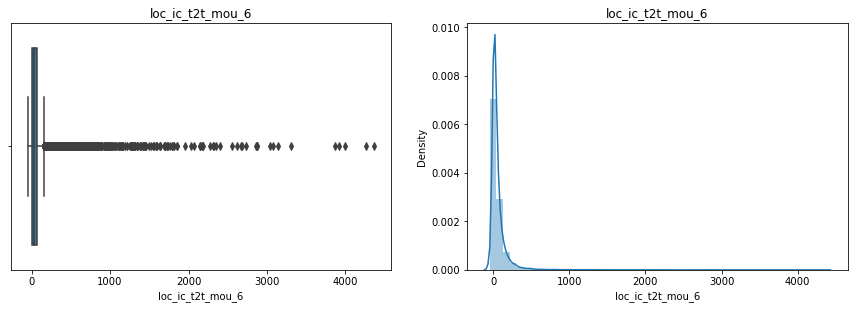

Data for :loc_ic_t2t_mou_7
Describe Data: 
 count    21013.00
mean        64.85
std        163.93
min        -57.40
25%          6.73
50%         25.58
75%         68.21
max       5709.59
Name: loc_ic_t2t_mou_7, dtype: float64
ValueCount Data: 
 (-63.172, 1095.995]     20918
(1095.995, 2249.394]       72
(2249.394, 3402.793]       20
(3402.793, 4556.191]        2
(4556.191, 5709.59]         1
Name: loc_ic_t2t_mou_7, dtype: int64


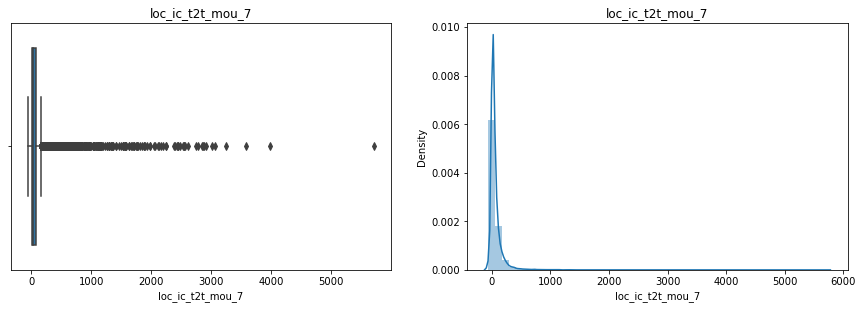

Data for :loc_ic_t2t_mou_8
Describe Data: 
 count    21013.00
mean        60.19
std        161.74
min        -59.42
25%          4.94
50%         22.71
75%         64.98
max       4003.21
Name: loc_ic_t2t_mou_8, dtype: float64
ValueCount Data: 
 (-63.483, 753.107]      20853
(753.107, 1565.632]       111
(1565.632, 2378.158]       32
(3190.684, 4003.21]        10
(2378.158, 3190.684]        7
Name: loc_ic_t2t_mou_8, dtype: int64


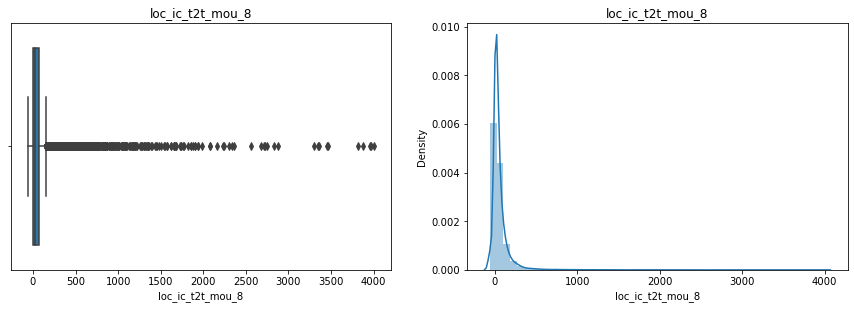

Data for :loc_ic_t2m_mou_6
Describe Data: 
 count    21013.00
mean       151.40
std        214.76
min          0.00
25%         31.43
50%         89.09
75%        188.18
max       4450.74
Name: loc_ic_t2m_mou_6, dtype: float64
ValueCount Data: 
 (-4.452, 890.148]       20723
(890.148, 1780.296]       244
(1780.296, 2670.444]       34
(2670.444, 3560.592]        9
(3560.592, 4450.74]         3
Name: loc_ic_t2m_mou_6, dtype: int64


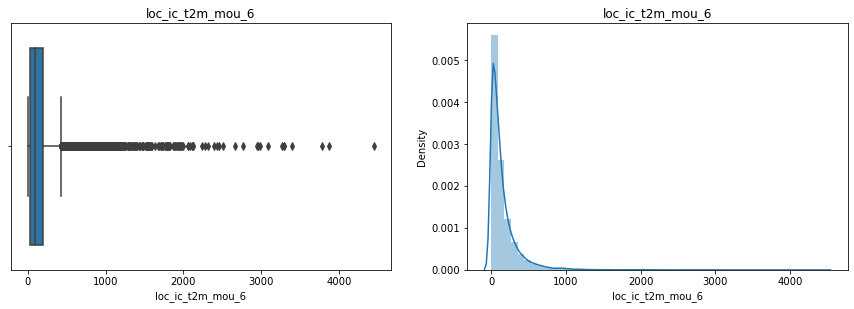

Data for :loc_ic_t2m_mou_7
Describe Data: 
 count    21013.00
mean       151.24
std        207.20
min          0.00
25%         34.04
50%         91.01
75%        189.91
max       4027.03
Name: loc_ic_t2m_mou_7, dtype: float64
ValueCount Data: 
 (-4.0280000000000005, 805.406]    20676
(805.406, 1610.812]                 283
(1610.812, 2416.218]                 42
(2416.218, 3221.624]                  9
(3221.624, 4027.03]                   3
Name: loc_ic_t2m_mou_7, dtype: int64


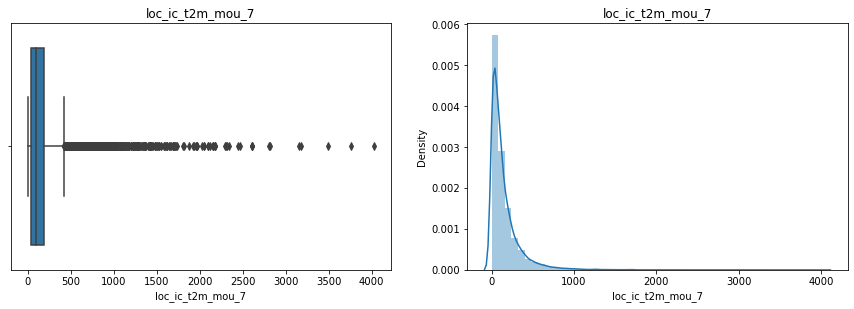

Data for :loc_ic_t2m_mou_8
Describe Data: 
 count    21013.00
mean       148.71
std        204.32
min          0.00
25%         31.34
50%         91.78
75%        185.64
max       4643.49
Name: loc_ic_t2m_mou_8, dtype: float64
ValueCount Data: 
 (-4.644, 928.698]       20782
(928.698, 1857.396]       206
(1857.396, 2786.094]       18
(2786.094, 3714.792]        5
(3714.792, 4643.49]         2
Name: loc_ic_t2m_mou_8, dtype: int64


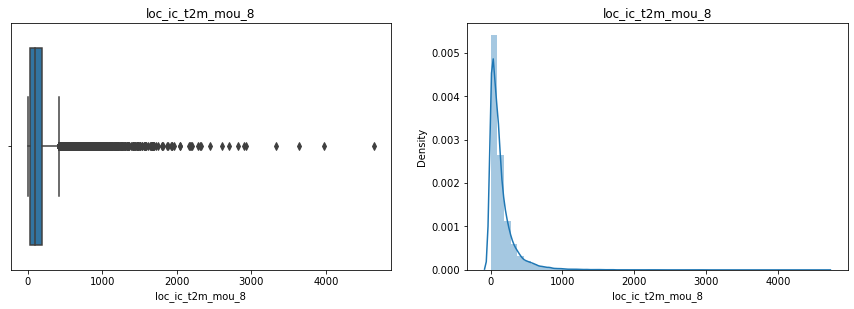

Data for :loc_ic_t2f_mou_6
Describe Data: 
 count    21013.00
mean        15.57
std         44.68
min          0.00
25%          0.00
50%          2.21
75%         12.01
max       1373.09
Name: loc_ic_t2f_mou_6, dtype: float64
ValueCount Data: 
 (-1.3739999999999999, 274.618]    20908
(274.618, 549.236]                   87
(549.236, 823.854]                   11
(823.854, 1098.472]                   5
(1098.472, 1373.09]                   2
Name: loc_ic_t2f_mou_6, dtype: int64


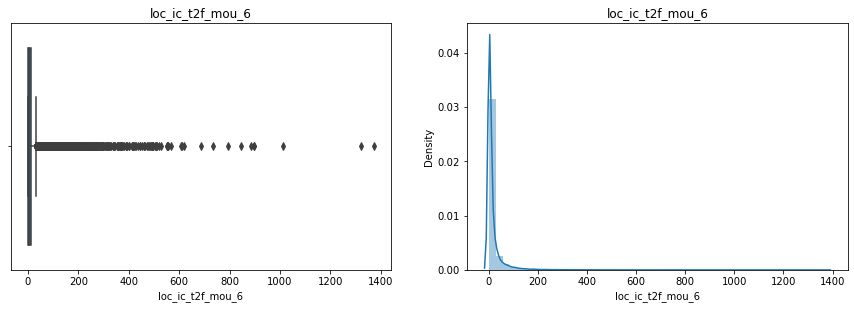

Data for :loc_ic_t2f_mou_7
Describe Data: 
 count    21013.00
mean        16.37
std         49.83
min          0.00
25%          0.00
50%          2.35
75%         12.54
max       1983.01
Name: loc_ic_t2f_mou_7, dtype: float64
ValueCount Data: 
 (-1.984, 396.602]       20952
(396.602, 793.204]         50
(793.204, 1189.806]         8
(1189.806, 1586.408]        2
(1586.408, 1983.01]         1
Name: loc_ic_t2f_mou_7, dtype: int64


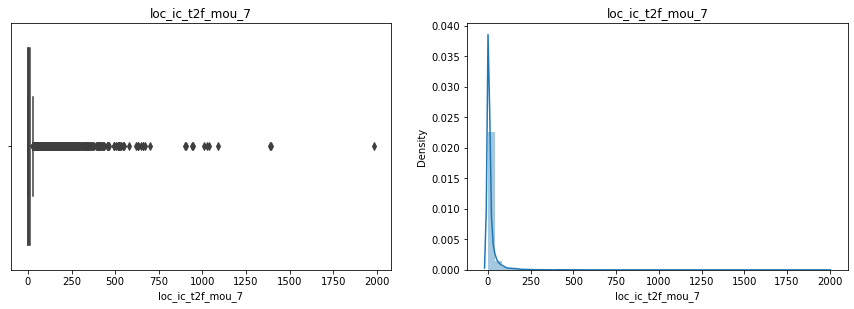

Data for :loc_ic_t2f_mou_8
Describe Data: 
 count    21013.00
mean        14.93
std         43.51
min          0.00
25%          0.00
50%          2.43
75%         11.71
max       1588.53
Name: loc_ic_t2f_mou_8, dtype: float64
ValueCount Data: 
 (-1.5899999999999999, 317.706]    20943
(317.706, 635.412]                   60
(635.412, 953.118]                    6
(953.118, 1270.824]                   2
(1270.824, 1588.53]                   2
Name: loc_ic_t2f_mou_8, dtype: int64


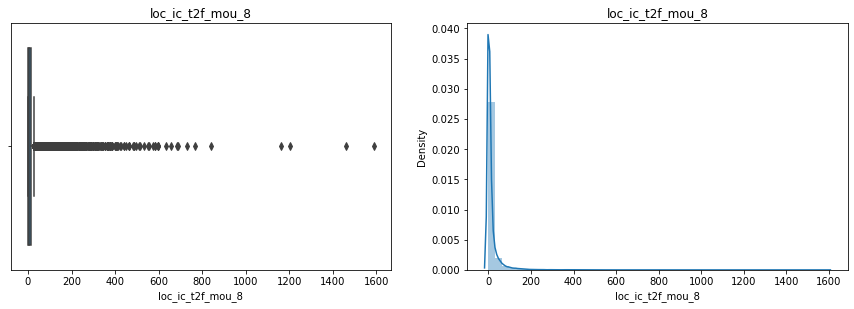

Data for :loc_ic_mou_6
Describe Data: 
 count    21013.00
mean       231.21
std        311.73
min          0.00
25%         52.96
50%        133.73
75%        296.33
max       7454.63
Name: loc_ic_mou_6, dtype: float64
ValueCount Data: 
 (-7.456, 1490.926]      20822
(1490.926, 2981.852]      163
(2981.852, 4472.778]       25
(4472.778, 5963.704]        2
(5963.704, 7454.63]         1
Name: loc_ic_mou_6, dtype: int64


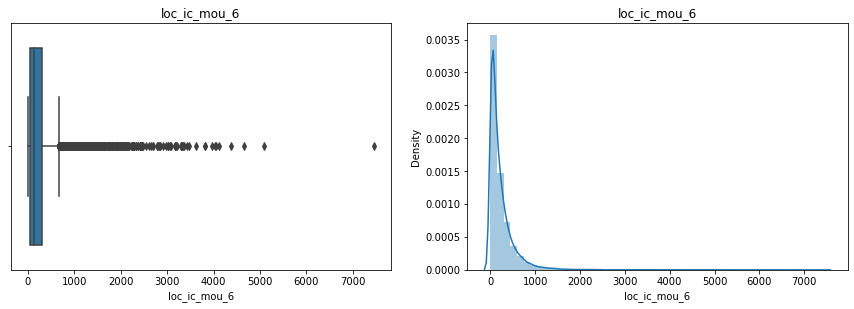

Data for :loc_ic_mou_7
Describe Data: 
 count    21013.00
mean       232.43
std        305.40
min          0.00
25%         57.36
50%        136.94
75%        298.38
max       6466.74
Name: loc_ic_mou_7, dtype: float64
ValueCount Data: 
 (-6.468, 1293.348]      20731
(1293.348, 2586.696]      245
(2586.696, 3880.044]       31
(3880.044, 5173.392]        4
(5173.392, 6466.74]         2
Name: loc_ic_mou_7, dtype: int64


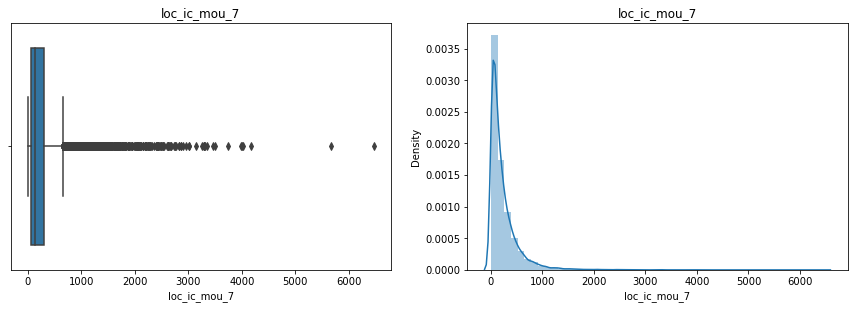

Data for :loc_ic_mou_8
Describe Data: 
 count    21013.00
mean       223.74
std        300.43
min          0.00
25%         51.78
50%        128.89
75%        285.48
max       5305.14
Name: loc_ic_mou_8, dtype: float64
ValueCount Data: 
 (-5.306, 1061.028]      20545
(1061.028, 2122.056]      405
(2122.056, 3183.084]       47
(3183.084, 4244.112]       11
(4244.112, 5305.14]         5
Name: loc_ic_mou_8, dtype: int64


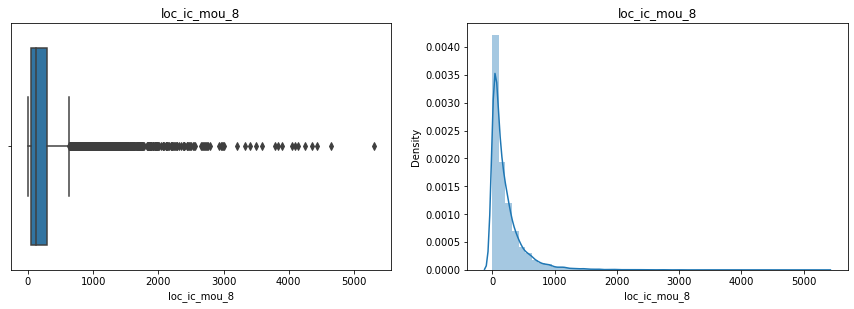

Data for :std_ic_t2t_mou_6
Describe Data: 
 count    21013.00
mean        14.04
std         69.99
min        -21.18
25%          0.00
50%          0.38
75%          8.19
max       3038.34
Name: std_ic_t2t_mou_6, dtype: float64
ValueCount Data: 
 (-24.238, 590.726]      20960
(590.726, 1202.63]         42
(1202.63, 1814.533]         6
(2426.437, 3038.34]         4
(1814.533, 2426.437]        1
Name: std_ic_t2t_mou_6, dtype: int64


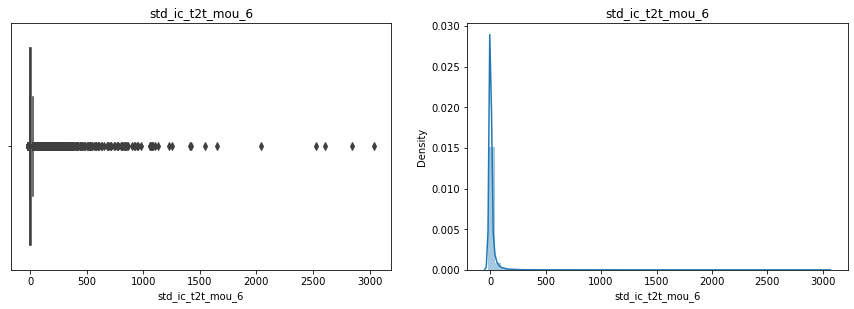

Data for :std_ic_t2t_mou_7
Describe Data: 
 count    21013.00
mean        14.82
std         81.62
min        -21.90
25%          0.00
50%          0.43
75%          8.48
max       4708.71
Name: std_ic_t2t_mou_7, dtype: float64
ValueCount Data: 
 (-26.631, 924.223]      20989
(924.223, 1870.345]        19
(2816.466, 3762.588]        2
(3762.588, 4708.71]         2
(1870.345, 2816.466]        1
Name: std_ic_t2t_mou_7, dtype: int64


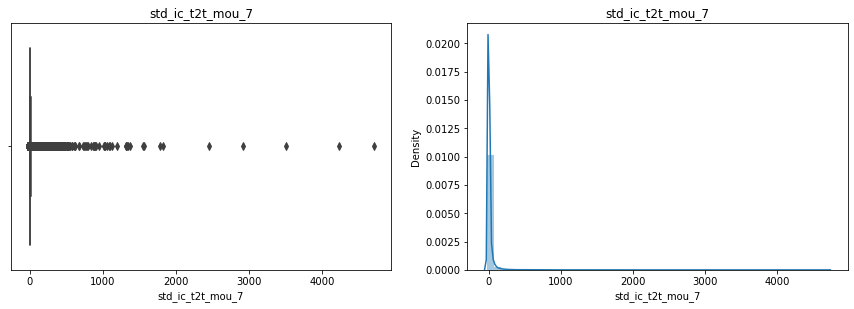

Data for :std_ic_t2t_mou_8
Describe Data: 
 count    21013.00
mean        12.94
std         68.78
min        -21.99
25%          0.00
50%          0.11
75%          6.98
max       3423.39
Name: std_ic_t2t_mou_8, dtype: float64
ValueCount Data: 
 (-25.441000000000003, 667.082]    20979
(667.082, 1356.159]                  25
(1356.159, 2045.236]                  4
(2045.236, 2734.313]                  3
(2734.313, 3423.39]                   2
Name: std_ic_t2t_mou_8, dtype: int64


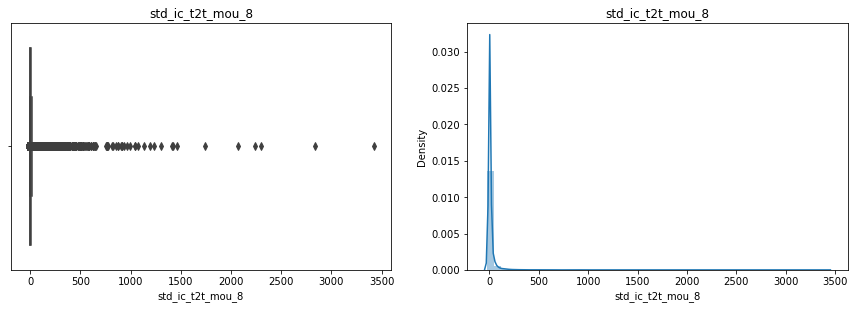

Data for :std_ic_t2m_mou_6
Describe Data: 
 count    21013.00
mean        29.30
std         93.04
min          0.00
25%          0.00
50%          5.73
75%         23.59
max       3613.98
Name: std_ic_t2m_mou_6, dtype: float64
ValueCount Data: 
 (-3.6149999999999998, 722.796]    20949
(722.796, 1445.592]                  49
(1445.592, 2168.388]                 11
(2168.388, 2891.184]                  3
(2891.184, 3613.98]                   1
Name: std_ic_t2m_mou_6, dtype: int64


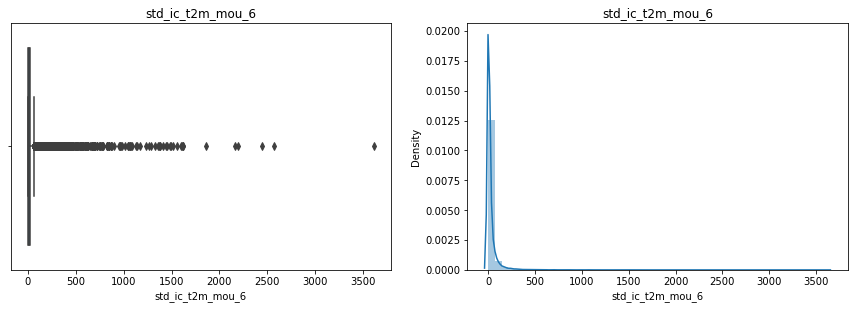

Data for :std_ic_t2m_mou_7
Describe Data: 
 count    21013.00
mean        30.94
std        102.97
min          0.00
25%          0.00
50%          5.93
75%         24.94
max       3470.38
Name: std_ic_t2m_mou_7, dtype: float64
ValueCount Data: 
 (-3.471, 694.076]       20936
(694.076, 1388.152]        54
(1388.152, 2082.228]       16
(2082.228, 2776.304]        5
(2776.304, 3470.38]         2
Name: std_ic_t2m_mou_7, dtype: int64


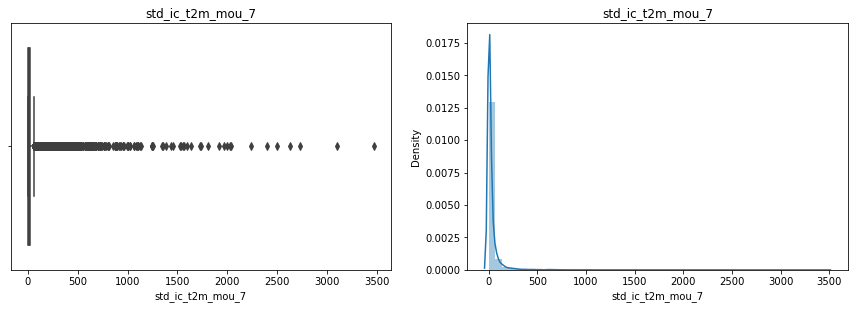

Data for :std_ic_t2m_mou_8
Describe Data: 
 count    21013.00
mean        28.27
std         93.89
min          0.00
25%          0.00
50%          5.21
75%         21.88
max       2879.31
Name: std_ic_t2m_mou_8, dtype: float64
ValueCount Data: 
 (-2.88, 575.862]        20917
(575.862, 1151.724]        69
(1151.724, 1727.586]       14
(1727.586, 2303.448]        9
(2303.448, 2879.31]         4
Name: std_ic_t2m_mou_8, dtype: int64


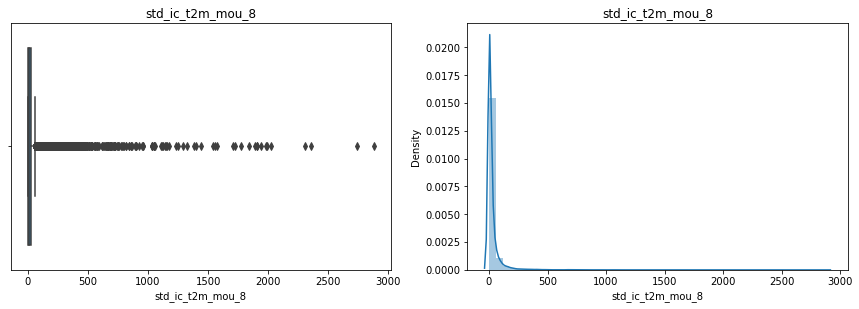

Data for :std_ic_t2f_mou_6
Describe Data: 
 count    21013.00
mean         2.77
std         19.87
min          0.00
25%          0.00
50%          0.00
75%          0.30
max       1351.11
Name: std_ic_t2f_mou_6, dtype: float64
ValueCount Data: 
 (-1.3519999999999999, 270.222]    20993
(270.222, 540.444]                   16
(540.444, 810.666]                    2
(810.666, 1080.888]                   1
(1080.888, 1351.11]                   1
Name: std_ic_t2f_mou_6, dtype: int64


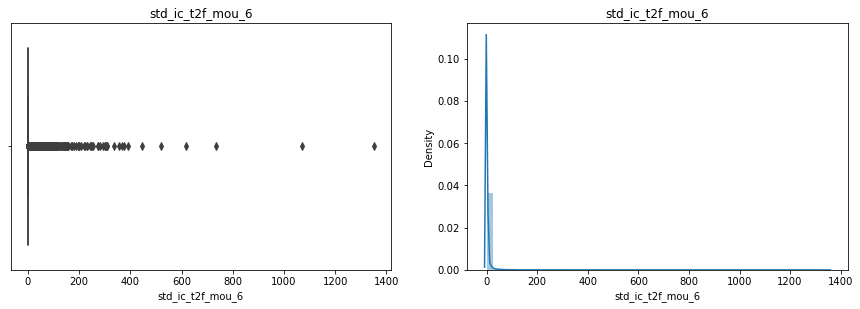

Data for :std_ic_t2f_mou_7
Describe Data: 
 count    21013.00
mean         2.81
std         18.01
min          0.00
25%          0.00
50%          0.00
75%          0.35
max       1136.08
Name: std_ic_t2f_mou_7, dtype: float64
ValueCount Data: 
 (-1.1369999999999998, 227.216]    20996
(227.216, 454.432]                   13
(454.432, 681.648]                    2
(908.864, 1136.08]                    2
(681.648, 908.864]                    0
Name: std_ic_t2f_mou_7, dtype: int64


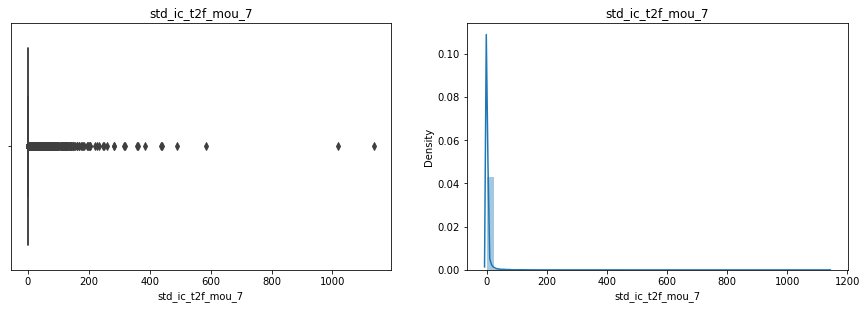

Data for :std_ic_t2f_mou_8
Describe Data: 
 count    21013.00
mean         2.57
std         19.02
min          0.00
25%          0.00
50%          0.00
75%          0.51
max       1394.89
Name: std_ic_t2f_mou_8, dtype: float64
ValueCount Data: 
 (-1.396, 278.978]      20999
(278.978, 557.956]         9
(557.956, 836.934]         3
(836.934, 1115.912]        1
(1115.912, 1394.89]        1
Name: std_ic_t2f_mou_8, dtype: int64


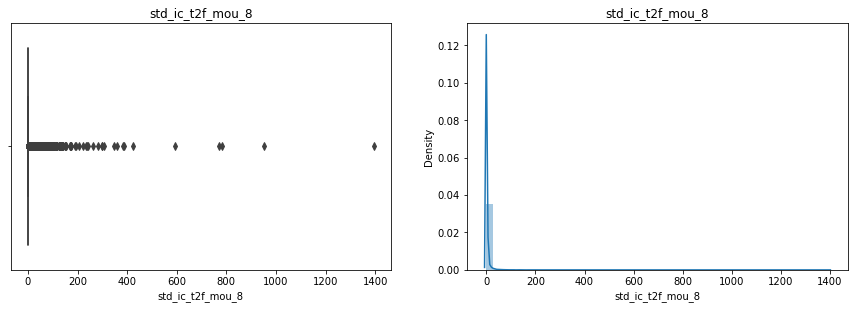

Data for :std_ic_t2o_mou_6
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_6, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_ic_t2o_mou_6, dtype: int64


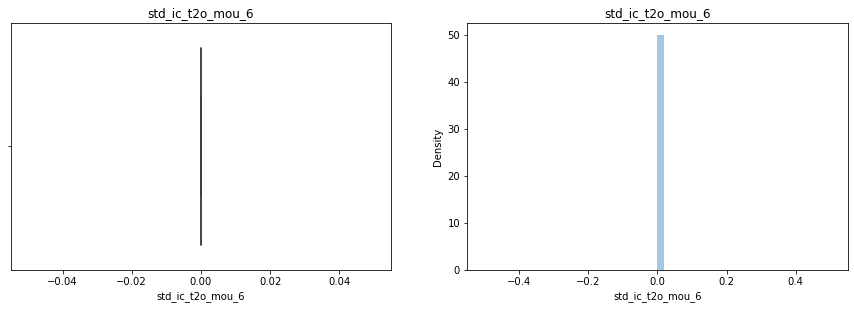

Data for :std_ic_t2o_mou_7
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_7, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_ic_t2o_mou_7, dtype: int64


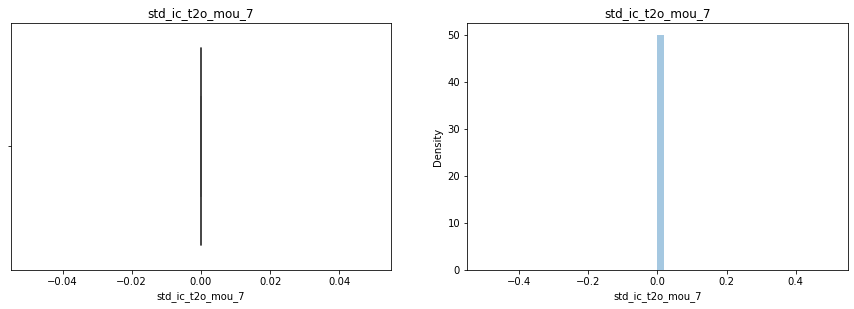

Data for :std_ic_t2o_mou_8
Describe Data: 
 count    21013.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_8, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     21013
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: std_ic_t2o_mou_8, dtype: int64


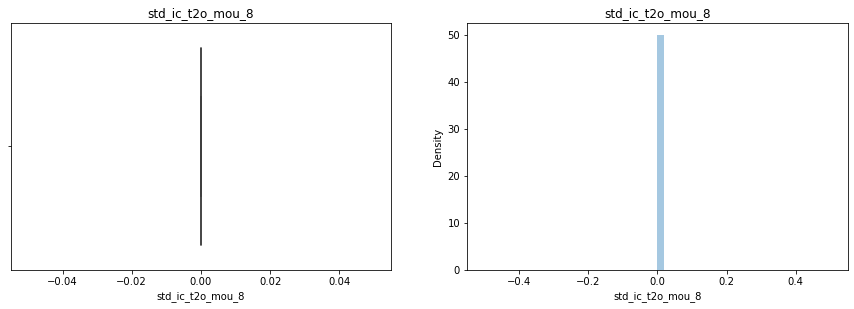

Data for :std_ic_mou_6
Describe Data: 
 count    21013.00
mean        46.10
std        128.77
min          0.00
25%          1.03
50%         11.28
75%         41.19
max       3929.24
Name: std_ic_mou_6, dtype: float64
ValueCount Data: 
 (-3.9299999999999997, 785.848]    20892
(785.848, 1571.696]                 100
(1571.696, 2357.544]                 13
(2357.544, 3143.392]                  6
(3143.392, 3929.24]                   2
Name: std_ic_mou_6, dtype: int64


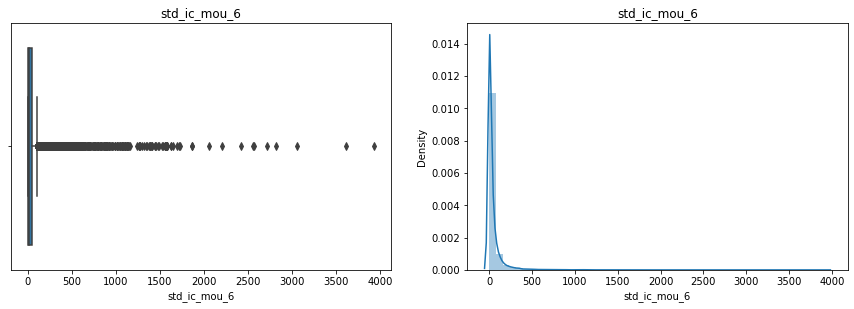

Data for :std_ic_mou_7
Describe Data: 
 count    21013.00
mean        48.55
std        146.28
min          0.00
25%          1.45
50%         11.94
75%         43.59
max       6745.76
Name: std_ic_mou_7, dtype: float64
ValueCount Data: 
 (-6.747000000000001, 1349.152]    20969
(1349.152, 2698.304]                 35
(2698.304, 4047.456]                  7
(4047.456, 5396.608]                  1
(5396.608, 6745.76]                   1
Name: std_ic_mou_7, dtype: int64


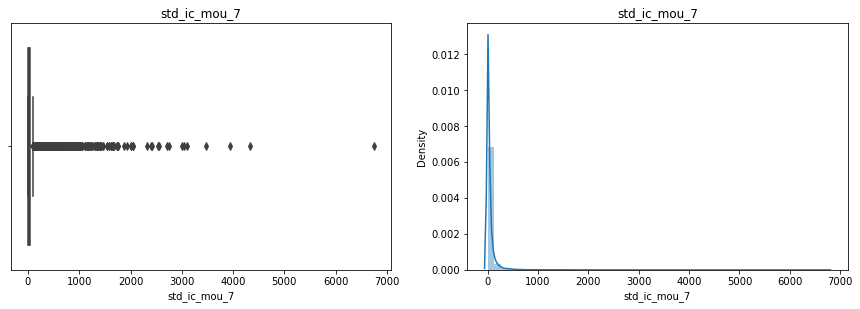

Data for :std_ic_mou_8
Describe Data: 
 count    21013.00
mean        43.75
std        130.29
min          0.00
25%          0.43
50%          9.16
75%         38.56
max       3777.94
Name: std_ic_mou_8, dtype: float64
ValueCount Data: 
 (-3.779, 755.588]       20886
(755.588, 1511.176]        99
(1511.176, 2266.764]       17
(2266.764, 3022.352]        9
(3022.352, 3777.94]         2
Name: std_ic_mou_8, dtype: int64


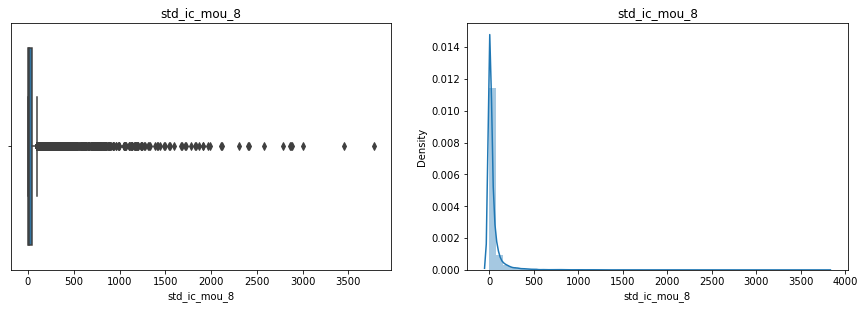

Data for :total_ic_mou_6
Describe Data: 
 count    21013.00
mean       287.79
std        360.57
min          0.00
25%         72.39
50%        182.69
75%        369.71
max       7716.14
Name: total_ic_mou_6, dtype: float64
ValueCount Data: 
 (-7.7170000000000005, 1543.228]    20734
(1543.228, 3086.456]                 249
(3086.456, 4629.684]                  24
(4629.684, 6172.912]                   4
(6172.912, 7716.14]                    2
Name: total_ic_mou_6, dtype: int64


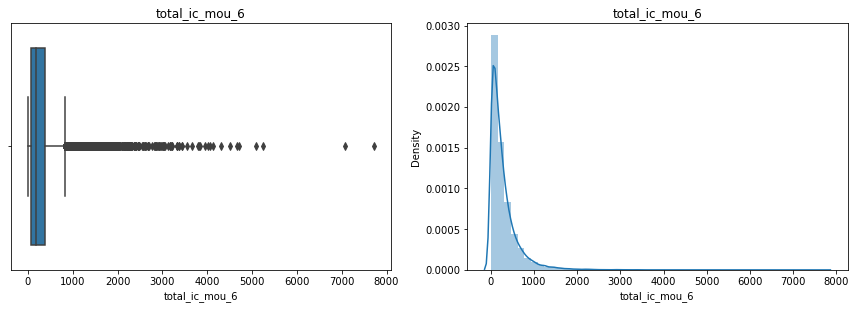

Data for :total_ic_mou_7
Describe Data: 
 count    21013.00
mean       292.92
std        363.79
min          0.00
25%         78.28
50%        186.56
75%        374.56
max       7442.86
Name: total_ic_mou_7, dtype: float64
ValueCount Data: 
 (-7.444, 1488.572]      20684
(1488.572, 2977.144]      293
(2977.144, 4465.716]       31
(5954.288, 7442.86]         3
(4465.716, 5954.288]        2
Name: total_ic_mou_7, dtype: int64


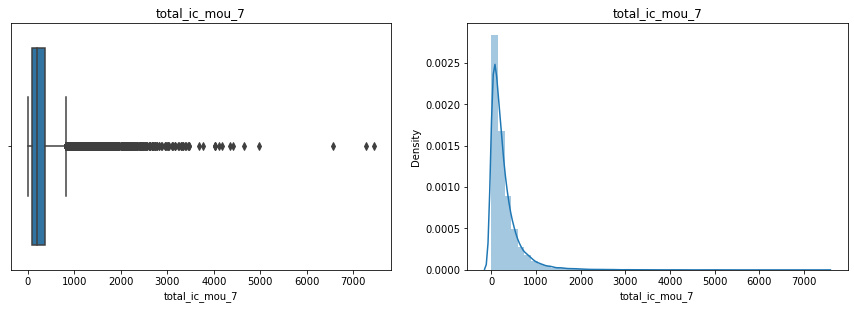

Data for :total_ic_mou_8
Describe Data: 
 count    21013.00
mean       277.47
std        352.95
min          0.00
25%         61.76
50%        172.94
75%        360.73
max       6066.63
Name: total_ic_mou_8, dtype: float64
ValueCount Data: 
 (-6.0680000000000005, 1213.326]    20505
(1213.326, 2426.652]                 443
(2426.652, 3639.978]                  48
(3639.978, 4853.304]                  16
(4853.304, 6066.63]                    1
Name: total_ic_mou_8, dtype: int64


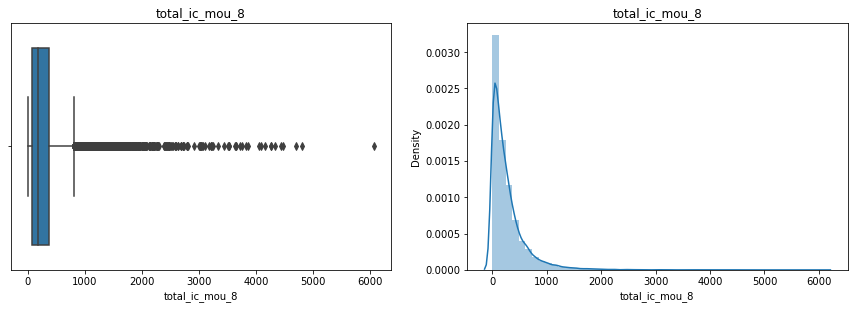

Data for :spl_ic_mou_6
Describe Data: 
 count    21013.00
mean        -1.22
std          9.27
min        -67.98
25%          0.00
50%          0.00
75%          0.00
max         19.76
Name: spl_ic_mou_6, dtype: float64
ValueCount Data: 
 (-15.335, 2.213]      20614
(-68.066, -50.43]       397
(2.213, 19.76]            2
(-50.43, -32.882]         0
(-32.882, -15.335]        0
Name: spl_ic_mou_6, dtype: int64


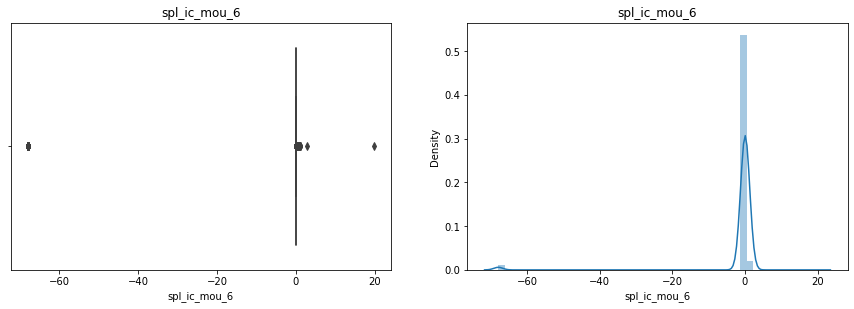

Data for :spl_ic_mou_7
Describe Data: 
 count    21013.00
mean        -1.16
std          8.57
min        -63.24
25%          0.00
50%          0.00
75%          0.00
max         13.46
Name: spl_ic_mou_7, dtype: float64
ValueCount Data: 
 (-1.881, 13.46]                   20620
(-63.321999999999996, -47.904]      393
(-47.904, -32.563]                    0
(-32.563, -17.222]                    0
(-17.222, -1.881]                     0
Name: spl_ic_mou_7, dtype: int64


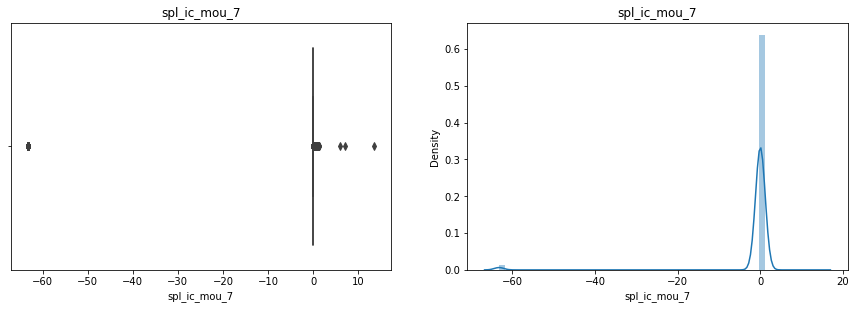

Data for :spl_ic_mou_8
Describe Data: 
 count    21013.00
mean        -2.53
std         12.69
min        -65.40
25%          0.00
50%          0.00
75%          0.00
max          1.26
Name: spl_ic_mou_8, dtype: float64
ValueCount Data: 
 (-12.072, 1.26]       20191
(-65.467, -52.068]      822
(-52.068, -38.736]        0
(-38.736, -25.404]        0
(-25.404, -12.072]        0
Name: spl_ic_mou_8, dtype: int64


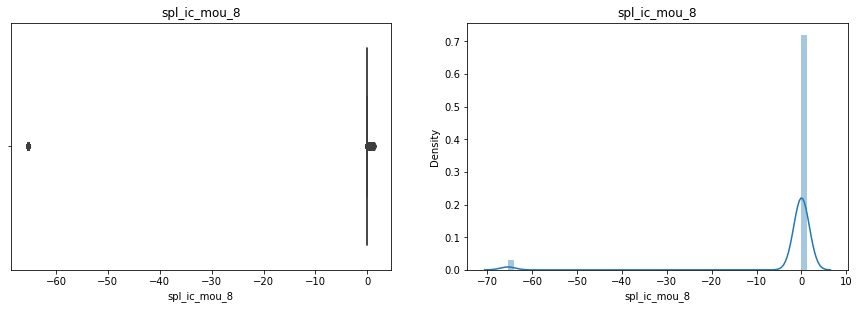

Data for :isd_ic_mou_6
Describe Data: 
 count    21013.00
mean        10.51
std         76.70
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       6789.41
Name: isd_ic_mou_6, dtype: float64
ValueCount Data: 
 (-6.79, 1357.882]       21005
(1357.882, 2715.764]        7
(5431.528, 6789.41]         1
(2715.764, 4073.646]        0
(4073.646, 5431.528]        0
Name: isd_ic_mou_6, dtype: int64


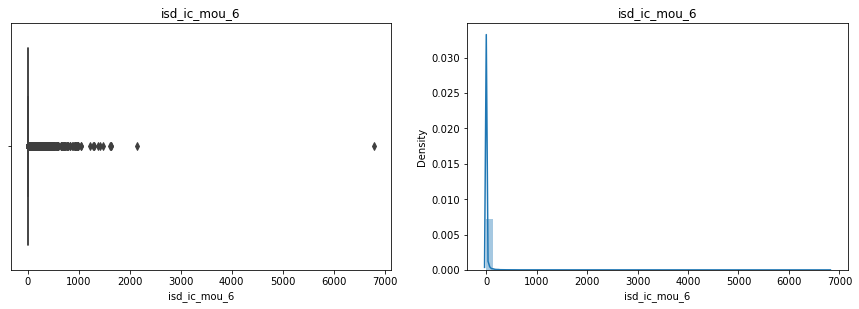

Data for :isd_ic_mou_7
Describe Data: 
 count    21013.00
mean        11.56
std         73.40
min          0.00
25%          0.00
50%          0.00
75%          0.00
max       4512.64
Name: isd_ic_mou_7, dtype: float64
ValueCount Data: 
 (-4.514, 902.528]       20990
(902.528, 1805.056]        19
(1805.056, 2707.584]        3
(3610.112, 4512.64]         1
(2707.584, 3610.112]        0
Name: isd_ic_mou_7, dtype: int64


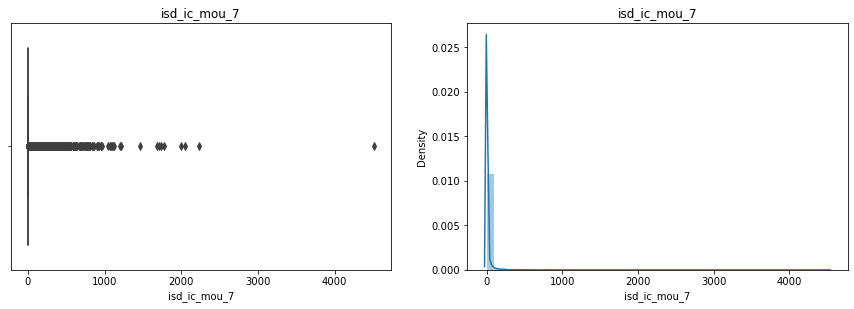

Data for :isd_ic_mou_8
Describe Data: 
 count    21013.00
mean        11.25
std         69.96
min          0.00
25%          0.00
50%          0.00
75%          0.03
max       3432.88
Name: isd_ic_mou_8, dtype: float64
ValueCount Data: 
 (-3.4339999999999997, 686.576]    20966
(686.576, 1373.152]                  40
(1373.152, 2059.728]                  4
(2059.728, 2746.304]                  2
(2746.304, 3432.88]                   1
Name: isd_ic_mou_8, dtype: int64


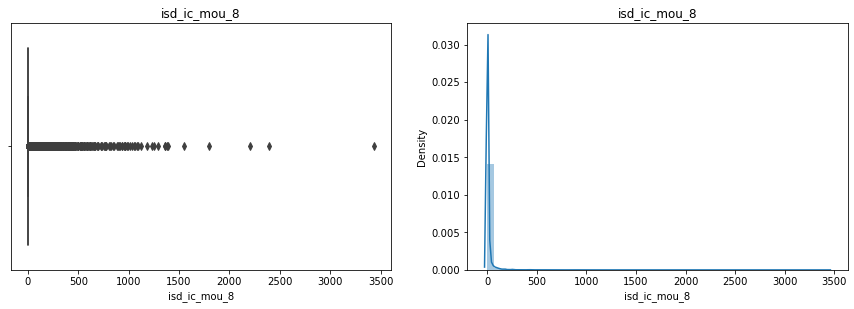

Data for :ic_others_6
Describe Data: 
 count    21013.00
mean         1.21
std         15.96
min          0.00
25%          0.00
50%          0.00
75%          0.08
max       1344.14
Name: ic_others_6, dtype: float64
ValueCount Data: 
 (-1.345, 268.828]      21002
(268.828, 537.656]         8
(1075.312, 1344.14]        2
(537.656, 806.484]         1
(806.484, 1075.312]        0
Name: ic_others_6, dtype: int64


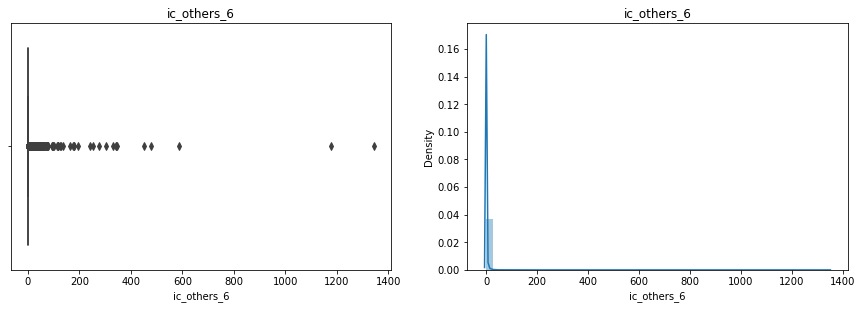

Data for :ic_others_7
Describe Data: 
 count    21013.00
mean         1.56
std         17.29
min          0.00
25%          0.00
50%          0.00
75%          0.05
max       1495.94
Name: ic_others_7, dtype: float64
ValueCount Data: 
 (-1.4969999999999999, 299.188]    21000
(299.188, 598.376]                   10
(598.376, 897.564]                    2
(1196.752, 1495.94]                   1
(897.564, 1196.752]                   0
Name: ic_others_7, dtype: int64


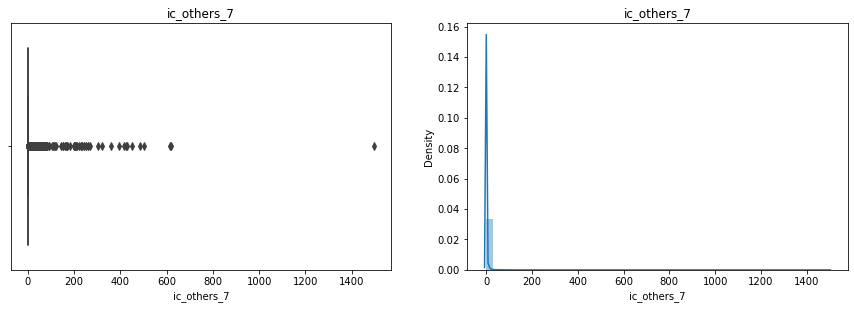

Data for :ic_others_8
Describe Data: 
 count    21013.00
mean         1.30
std         14.27
min          0.00
25%          0.00
50%          0.00
75%          0.13
max       1209.86
Name: ic_others_8, dtype: float64
ValueCount Data: 
 (-1.2109999999999999, 241.972]    21004
(241.972, 483.944]                    4
(483.944, 725.916]                    4
(967.888, 1209.86]                    1
(725.916, 967.888]                    0
Name: ic_others_8, dtype: int64


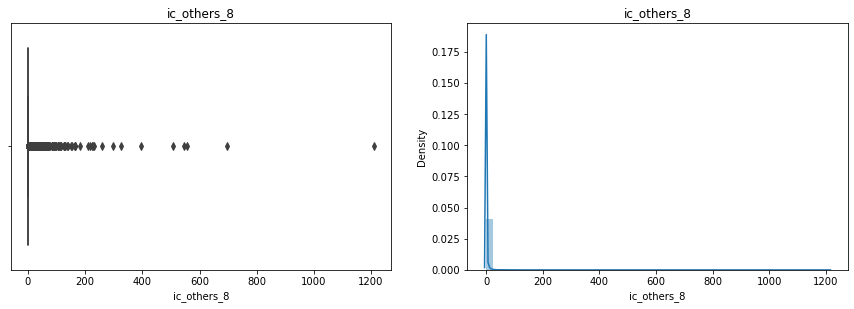

Data for :total_rech_num_6
Describe Data: 
 count    21013.00
mean        11.87
std          9.33
min          0.00
25%          6.00
50%          9.00
75%         15.00
max        170.00
Name: total_rech_num_6, dtype: float64
ValueCount Data: 
 (-0.171, 34.0]    20369
(34.0, 68.0]        601
(68.0, 102.0]        36
(102.0, 136.0]        6
(136.0, 170.0]        1
Name: total_rech_num_6, dtype: int64


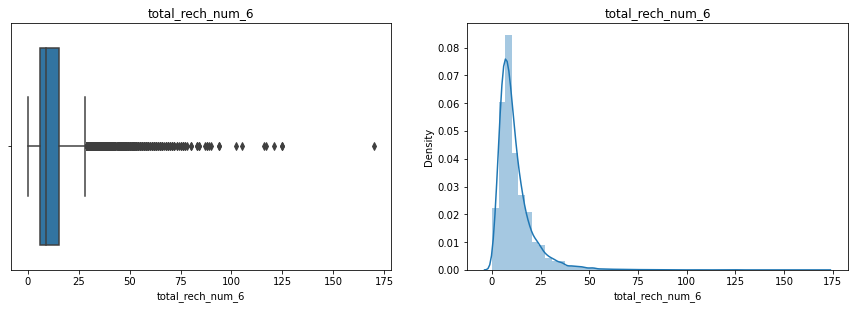

Data for :total_rech_num_7
Describe Data: 
 count    21013.00
mean        11.71
std          9.38
min          0.00
25%          6.00
50%          9.00
75%         15.00
max        138.00
Name: total_rech_num_7, dtype: float64
ValueCount Data: 
 (-0.139, 27.6]    19750
(27.6, 55.2]       1151
(55.2, 82.8]         97
(82.8, 110.4]        10
(110.4, 138.0]        5
Name: total_rech_num_7, dtype: int64


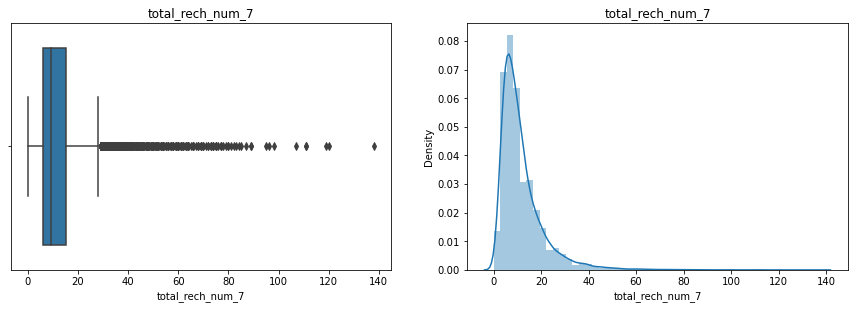

Data for :total_rech_num_8
Describe Data: 
 count    21013.00
mean         9.97
std          9.21
min          0.00
25%          4.00
50%          8.00
75%         13.00
max        138.00
Name: total_rech_num_8, dtype: float64
ValueCount Data: 
 (-0.139, 27.6]    19962
(27.6, 55.2]        953
(55.2, 82.8]         85
(82.8, 110.4]         8
(110.4, 138.0]        5
Name: total_rech_num_8, dtype: int64


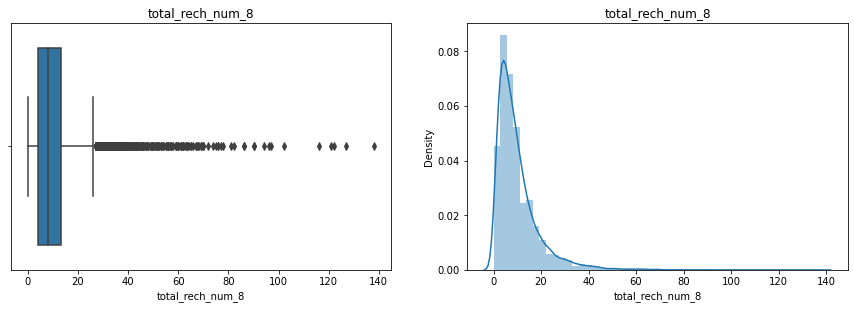

Data for :total_rech_amt_6
Describe Data: 
 count    21013.00
mean       661.73
std        574.83
min          0.00
25%        360.00
50%        566.00
75%        834.00
max      35190.00
Name: total_rech_amt_6, dtype: float64
ValueCount Data: 
 (-35.190999999999995, 7038.0]    21004
(7038.0, 14076.0]                    7
(14076.0, 21114.0]                   1
(28152.0, 35190.0]                   1
(21114.0, 28152.0]                   0
Name: total_rech_amt_6, dtype: int64


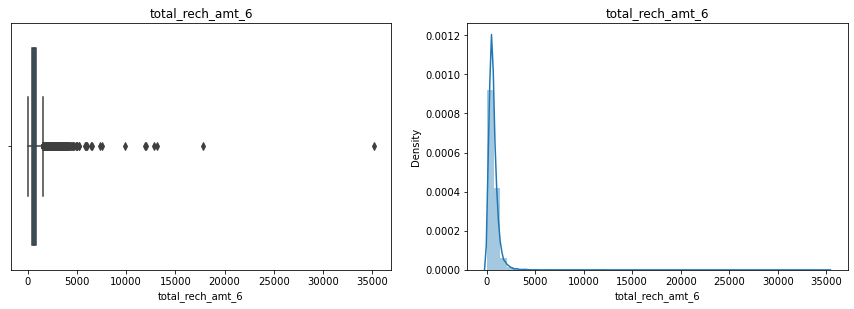

Data for :total_rech_amt_7
Describe Data: 
 count    21013.00
mean       657.30
std        590.68
min          0.00
25%        350.00
50%        561.00
75%        829.00
max      40335.00
Name: total_rech_amt_7, dtype: float64
ValueCount Data: 
 (-40.336, 8067.0]     21007
(8067.0, 16134.0]         3
(16134.0, 24201.0]        2
(32268.0, 40335.0]        1
(24201.0, 32268.0]        0
Name: total_rech_amt_7, dtype: int64


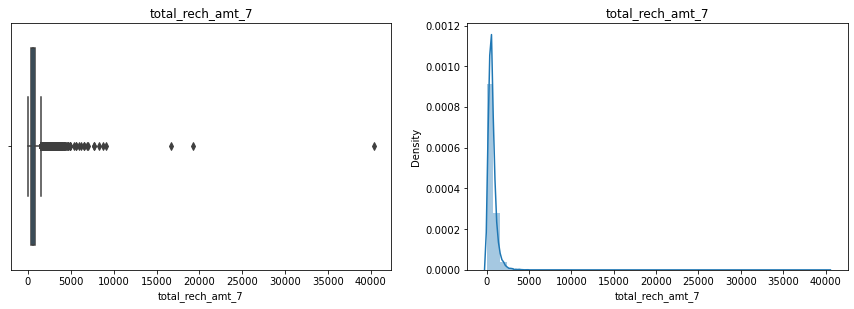

Data for :total_rech_amt_8
Describe Data: 
 count    21013.00
mean       582.54
std        634.47
min          0.00
25%        250.00
50%        491.00
75%        770.00
max      45320.00
Name: total_rech_amt_8, dtype: float64
ValueCount Data: 
 (-45.321, 9064.0]     21007
(9064.0, 18128.0]         3
(18128.0, 27192.0]        2
(36256.0, 45320.0]        1
(27192.0, 36256.0]        0
Name: total_rech_amt_8, dtype: int64


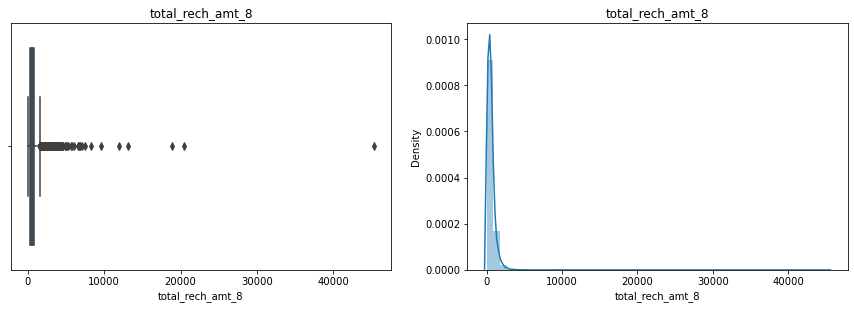

Data for :max_rech_amt_6
Describe Data: 
 count    21013.00
mean       168.95
std        177.21
min          0.00
25%        110.00
50%        120.00
75%        200.00
max       4010.00
Name: max_rech_amt_6, dtype: float64
ValueCount Data: 
 (-4.011, 802.0]     20695
(802.0, 1604.0]       286
(1604.0, 2406.0]       21
(2406.0, 3208.0]        7
(3208.0, 4010.0]        4
Name: max_rech_amt_6, dtype: int64


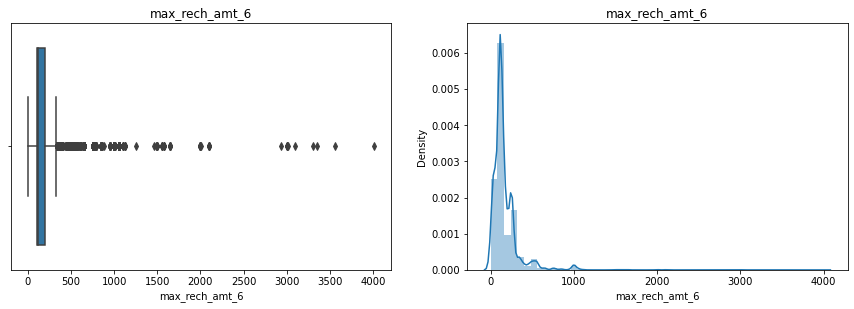

Data for :max_rech_amt_7
Describe Data: 
 count    21013.00
mean       170.58
std        173.60
min          0.00
25%        110.00
50%        128.00
75%        200.00
max       3299.00
Name: max_rech_amt_7, dtype: float64
ValueCount Data: 
 (-3.3, 659.8]       20583
(659.8, 1319.6]       380
(1319.6, 1979.4]       25
(1979.4, 2639.2]       21
(2639.2, 3299.0]        4
Name: max_rech_amt_7, dtype: int64


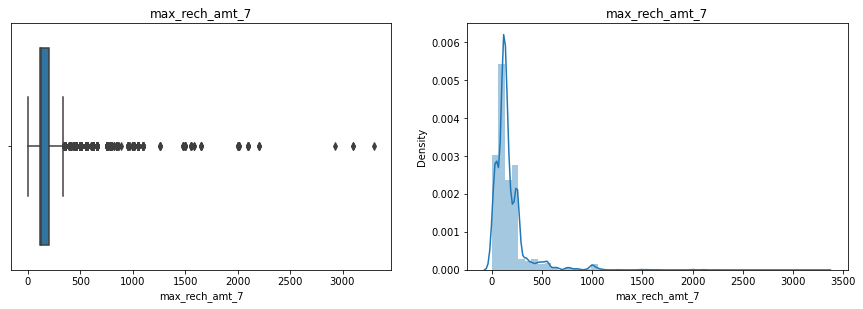

Data for :max_rech_amt_8
Describe Data: 
 count    21013.00
mean       159.34
std        167.66
min          0.00
25%         50.00
50%        130.00
75%        198.00
max       4449.00
Name: max_rech_amt_8, dtype: float64
ValueCount Data: 
 (-4.45, 889.8]      20792
(889.8, 1779.6]       204
(1779.6, 2669.4]        9
(2669.4, 3559.2]        7
(3559.2, 4449.0]        1
Name: max_rech_amt_8, dtype: int64


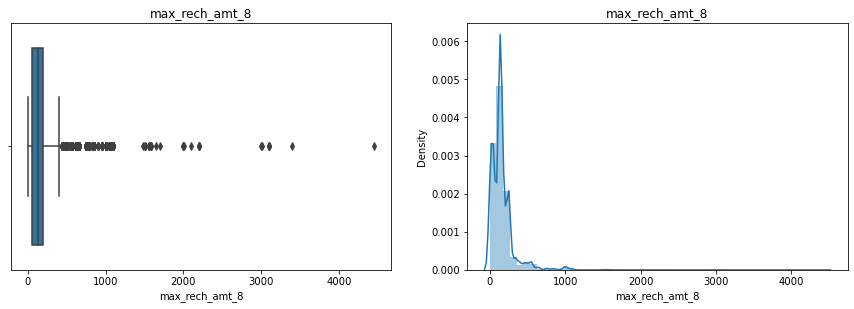

Data for :last_day_rch_amt_6
Describe Data: 
 count    21013.00
mean       101.26
std        144.91
min          0.00
25%         25.00
50%         67.00
75%        120.00
max       4010.00
Name: last_day_rch_amt_6, dtype: float64
ValueCount Data: 
 (-4.011, 802.0]     20847
(802.0, 1604.0]       148
(1604.0, 2406.0]       12
(2406.0, 3208.0]        3
(3208.0, 4010.0]        3
Name: last_day_rch_amt_6, dtype: int64


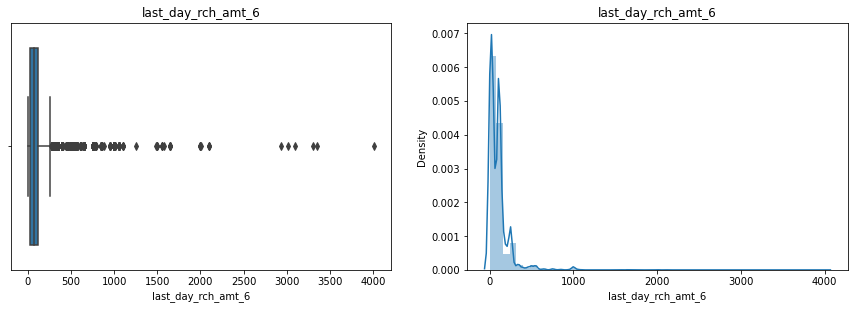

Data for :last_day_rch_amt_7
Describe Data: 
 count    21013.00
mean        99.68
std        139.76
min          0.00
25%         20.00
50%         50.00
75%        130.00
max       3100.00
Name: last_day_rch_amt_7, dtype: float64
ValueCount Data: 
 (-3.101, 620.0]     20787
(620.0, 1240.0]       204
(1860.0, 2480.0]       10
(1240.0, 1860.0]        9
(2480.0, 3100.0]        3
Name: last_day_rch_amt_7, dtype: int64


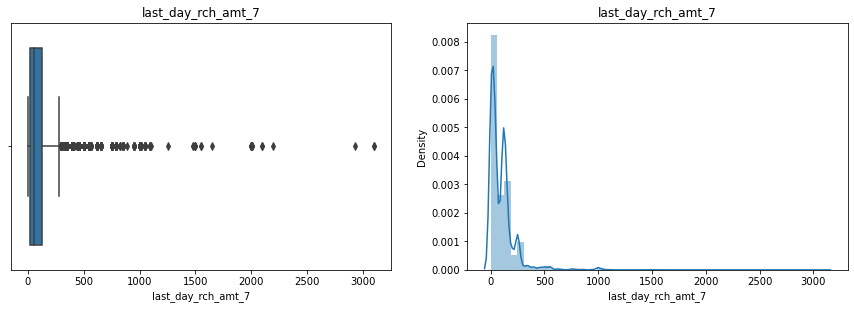

Data for :last_day_rch_amt_8
Describe Data: 
 count    21013.00
mean        91.62
std        138.97
min          0.00
25%          0.00
50%         50.00
75%        130.00
max       4449.00
Name: last_day_rch_amt_8, dtype: float64
ValueCount Data: 
 (-4.45, 889.8]      20904
(889.8, 1779.6]       100
(2669.4, 3559.2]        5
(1779.6, 2669.4]        3
(3559.2, 4449.0]        1
Name: last_day_rch_amt_8, dtype: int64


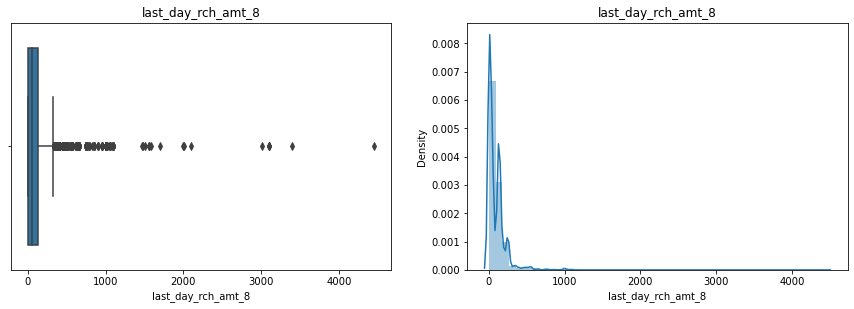

Data for :total_rech_data_6
Describe Data: 
 count    21013.00
mean       453.84
std       1314.00
min          0.00
25%          0.00
50%         92.00
75%        400.00
max      55296.00
Name: total_rech_data_6, dtype: float64
ValueCount Data: 
 (-55.297, 11059.2]    20970
(11059.2, 22118.4]       32
(22118.4, 33177.6]        8
(44236.8, 55296.0]        2
(33177.6, 44236.8]        1
Name: total_rech_data_6, dtype: int64


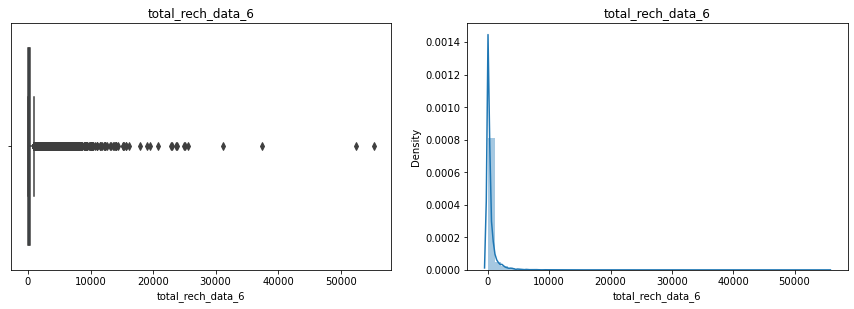

Data for :total_rech_data_7
Describe Data: 
 count    21013.00
mean       531.95
std       1500.03
min          0.00
25%          0.00
50%        100.00
75%        575.00
max      55080.00
Name: total_rech_data_7, dtype: float64
ValueCount Data: 
 (-55.080999999999996, 11016.0]    20948
(11016.0, 22032.0]                   51
(22032.0, 33048.0]                   10
(33048.0, 44064.0]                    3
(44064.0, 55080.0]                    1
Name: total_rech_data_7, dtype: int64


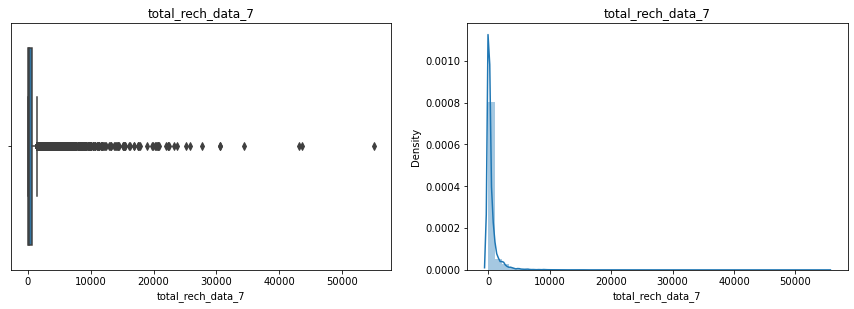

Data for :total_rech_data_8
Describe Data: 
 count    21013.00
mean       462.78
std       1631.54
min          0.00
25%          0.00
50%         25.00
75%        288.00
max      89106.50
Name: total_rech_data_8, dtype: float64
ValueCount Data: 
 (-89.107, 17821.3]    20989
(17821.3, 35642.6]       17
(35642.6, 53463.9]        5
(53463.9, 71285.2]        1
(71285.2, 89106.5]        1
Name: total_rech_data_8, dtype: int64


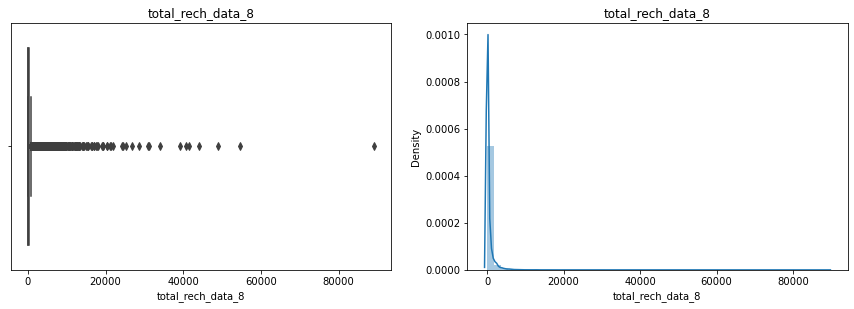

Data for :av_rech_amt_data_6
Describe Data: 
 count    21013.0
mean       130.4
std        198.6
min          0.0
25%          0.0
50%         49.0
75%        198.0
max       5920.0
Name: av_rech_amt_data_6, dtype: float64
ValueCount Data: 
 (-5.921, 1184.0]    20928
(1184.0, 2368.0]       77
(2368.0, 3552.0]        7
(4736.0, 5920.0]        1
(3552.0, 4736.0]        0
Name: av_rech_amt_data_6, dtype: int64


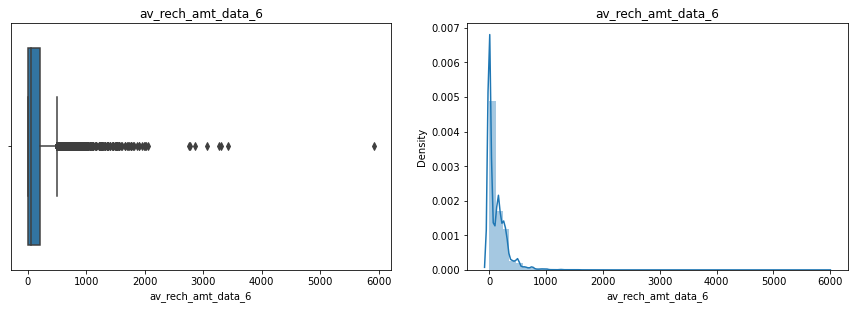

Data for :av_rech_amt_data_7
Describe Data: 
 count    21013.00
mean       139.91
std        207.99
min          0.00
25%          0.00
50%         69.00
75%        214.00
max       4365.00
Name: av_rech_amt_data_7, dtype: float64
ValueCount Data: 
 (-4.3660000000000005, 873.0]    20791
(873.0, 1746.0]                   185
(1746.0, 2619.0]                   31
(2619.0, 3492.0]                    5
(3492.0, 4365.0]                    1
Name: av_rech_amt_data_7, dtype: int64


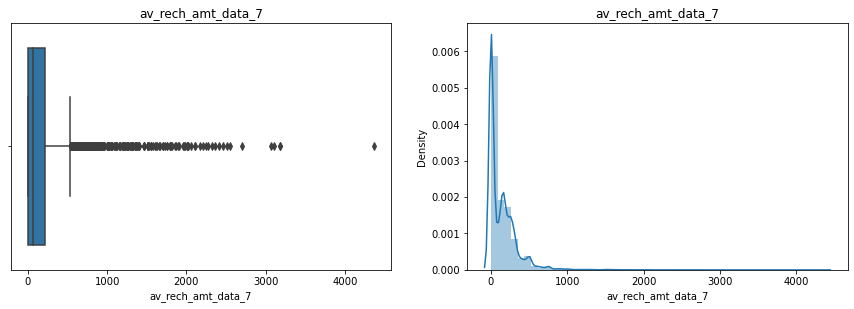

Data for :av_rech_amt_data_8
Describe Data: 
 count    21013.00
mean       121.72
std        195.95
min          0.00
25%          0.00
50%         25.00
75%        195.00
max       4061.00
Name: av_rech_amt_data_8, dtype: float64
ValueCount Data: 
 (-4.062, 812.2]     20775
(812.2, 1624.4]       211
(1624.4, 2436.6]       21
(2436.6, 3248.8]        4
(3248.8, 4061.0]        2
Name: av_rech_amt_data_8, dtype: int64


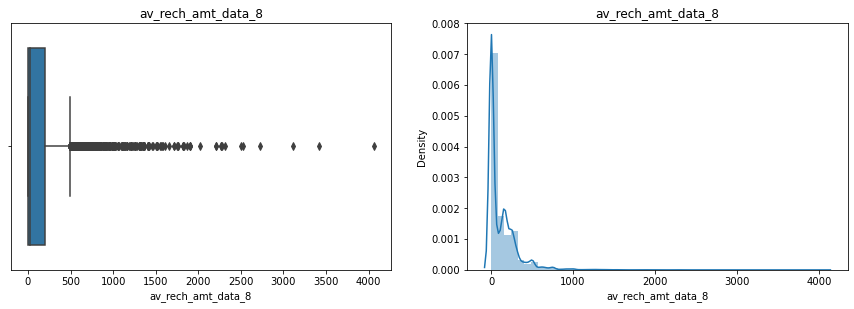

Data for :vol_2g_mb_6
Describe Data: 
 count    21013.00
mean       126.09
std        329.29
min          0.00
25%          0.00
50%          0.00
75%         84.74
max      10285.90
Name: vol_2g_mb_6, dtype: float64
ValueCount Data: 
 (-10.286999999999999, 2057.18]    20931
(2057.18, 4114.36]                   73
(4114.36, 6171.54]                    6
(6171.54, 8228.72]                    2
(8228.72, 10285.9]                    1
Name: vol_2g_mb_6, dtype: int64


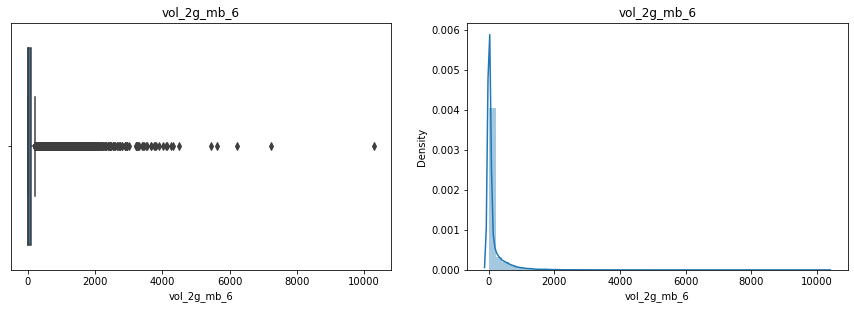

Data for :vol_2g_mb_7
Describe Data: 
 count    21013.00
mean       125.28
std        328.07
min          0.00
25%          0.00
50%          0.05
75%         77.49
max       7873.55
Name: vol_2g_mb_7, dtype: float64
ValueCount Data: 
 (-7.875, 1574.71]     20809
(1574.71, 3149.42]      176
(3149.42, 4724.13]       23
(4724.13, 6298.84]        4
(6298.84, 7873.55]        1
Name: vol_2g_mb_7, dtype: int64


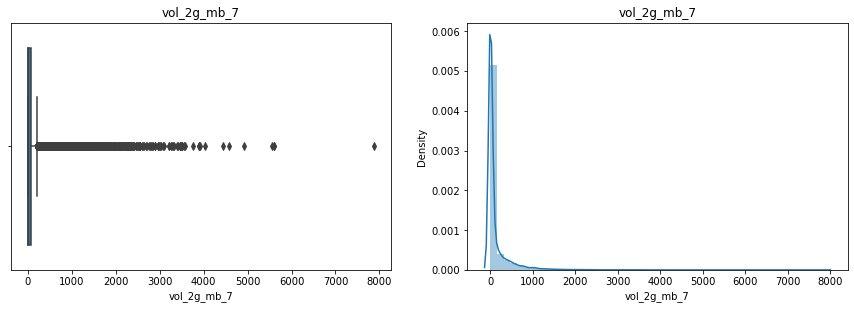

Data for :vol_2g_mb_8
Describe Data: 
 count    21013.00
mean       106.34
std        317.13
min          0.00
25%          0.00
50%          0.00
75%         51.86
max      11117.61
Name: vol_2g_mb_8, dtype: float64
ValueCount Data: 
 (-11.119, 2223.522]     20946
(2223.522, 4447.044]       59
(4447.044, 6670.566]        5
(6670.566, 8894.088]        2
(8894.088, 11117.61]        1
Name: vol_2g_mb_8, dtype: int64


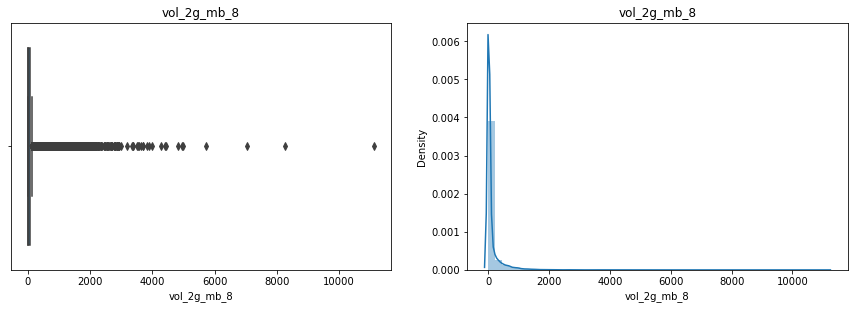

Data for :vol_3g_mb_6
Describe Data: 
 count    21013.00
mean       345.93
std        929.74
min          0.00
25%          0.00
50%          0.00
75%        360.39
max      45735.40
Name: vol_3g_mb_6, dtype: float64
ValueCount Data: 
 (-45.736, 9147.08]      20991
(9147.08, 18294.16]        17
(18294.16, 27441.24]        4
(36588.32, 45735.4]         1
(27441.24, 36588.32]        0
Name: vol_3g_mb_6, dtype: int64


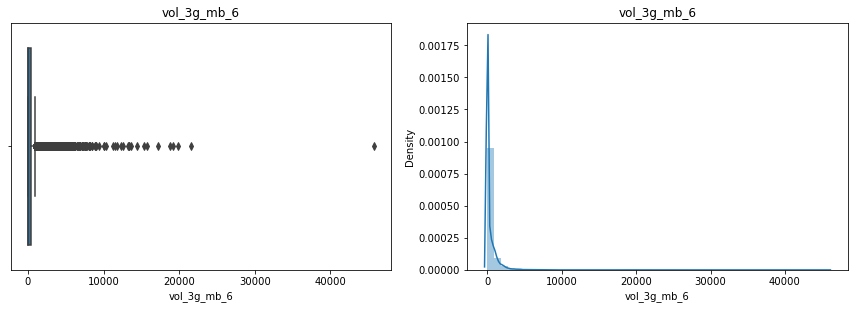

Data for :vol_3g_mb_7
Describe Data: 
 count    21013.00
mean       370.46
std        940.99
min          0.00
25%          0.00
50%          0.00
75%        406.64
max      28144.12
Name: vol_3g_mb_7, dtype: float64
ValueCount Data: 
 (-28.145, 5628.824]       20912
(5628.824, 11257.648]        88
(11257.648, 16886.472]        8
(22515.296, 28144.12]         3
(16886.472, 22515.296]        2
Name: vol_3g_mb_7, dtype: int64


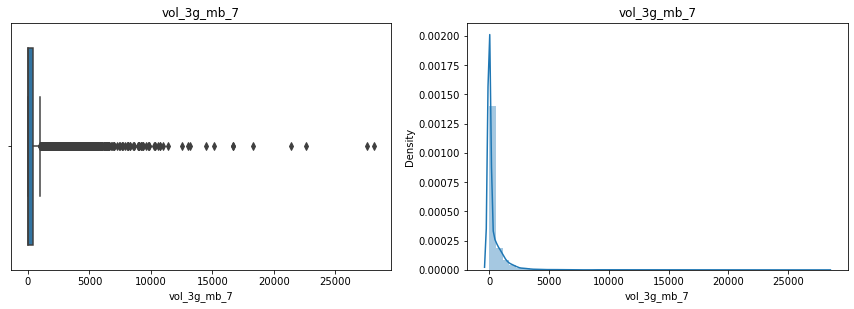

Data for :vol_3g_mb_8
Describe Data: 
 count    21013.00
mean       352.39
std        938.78
min          0.00
25%          0.00
50%          0.00
75%        352.02
max      30036.06
Name: vol_3g_mb_8, dtype: float64
ValueCount Data: 
 (-30.037000000000003, 6007.212]    20938
(6007.212, 12014.424]                 60
(12014.424, 18021.636]                10
(24028.848, 30036.06]                  3
(18021.636, 24028.848]                 2
Name: vol_3g_mb_8, dtype: int64


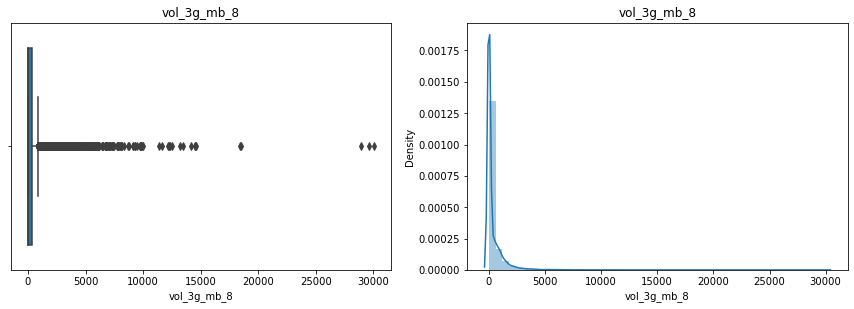

Data for :arpu_3g_6
Describe Data: 
 count    21013.00
mean        77.10
std        182.51
min       -982.28
25%          0.00
50%         13.21
75%         71.96
max       5054.37
Name: arpu_3g_6, dtype: float64
ValueCount Data: 
 (-988.317, 225.051]    18967
(225.051, 1432.381]     2000
(1432.381, 2639.71]       39
(2639.71, 3847.04]         6
(3847.04, 5054.37]         1
Name: arpu_3g_6, dtype: int64


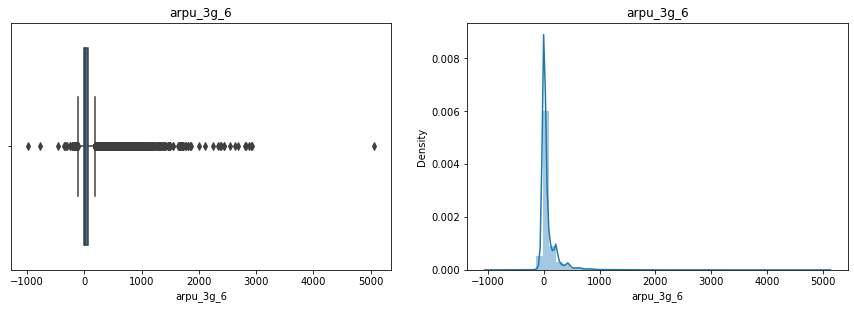

Data for :arpu_3g_7
Describe Data: 
 count    21013.00
mean        78.88
std        185.24
min       -363.46
25%          0.00
50%         14.77
75%         69.48
max       4980.90
Name: arpu_3g_7, dtype: float64
ValueCount Data: 
 (-368.803, 705.413]     20704
(705.413, 1774.285]       284
(1774.285, 2843.157]       22
(2843.157, 3912.028]        2
(3912.028, 4980.9]          1
Name: arpu_3g_7, dtype: int64


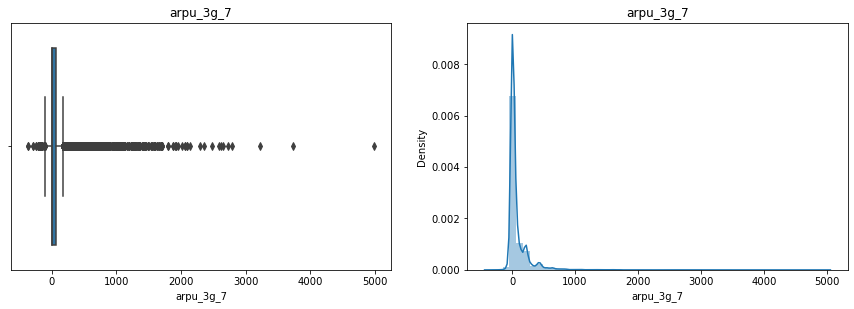

Data for :arpu_3g_8
Describe Data: 
 count    21013.00
mean        71.27
std        176.47
min       -838.41
25%          0.00
50%         10.02
75%         63.96
max       3716.90
Name: arpu_3g_8, dtype: float64
ValueCount Data: 
 (-842.961, 72.656]      16251
(72.656, 983.717]        4641
(983.717, 1894.778]       102
(1894.778, 2805.839]       13
(2805.839, 3716.9]          6
Name: arpu_3g_8, dtype: int64


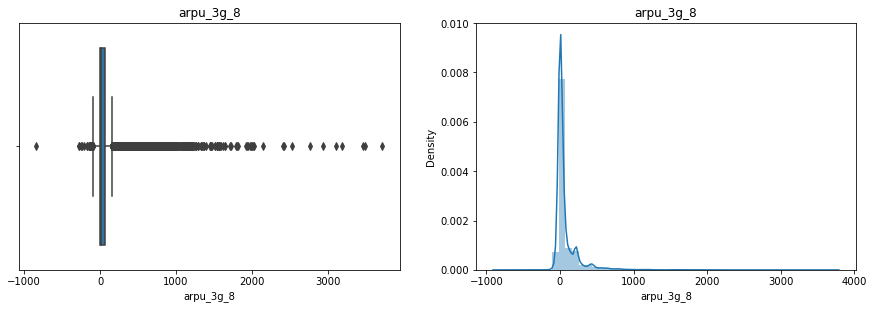

Data for :arpu_2g_6
Describe Data: 
 count    21013.00
mean        70.15
std        159.18
min       -354.77
25%          0.00
50%         14.80
75%         63.96
max       5054.35
Name: arpu_2g_6, dtype: float64
ValueCount Data: 
 (-360.176, 727.058]     20806
(727.058, 1808.881]       198
(1808.881, 2890.704]        6
(2890.704, 3972.527]        2
(3972.527, 5054.35]         1
Name: arpu_2g_6, dtype: int64


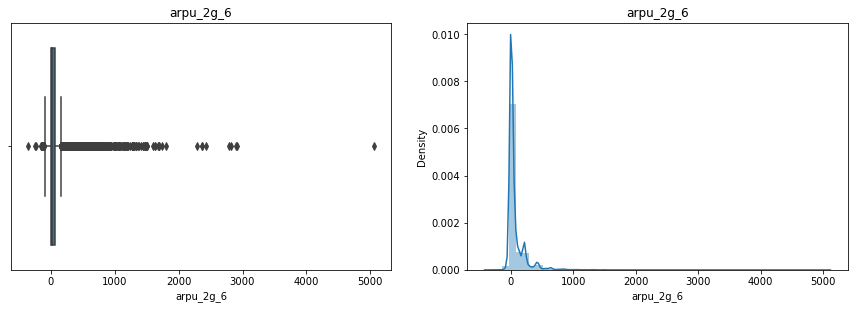

Data for :arpu_2g_7
Describe Data: 
 count    21013.00
mean        71.09
std        166.40
min       -206.97
25%          0.01
50%         14.33
75%         63.96
max       4809.36
Name: arpu_2g_7, dtype: float64
ValueCount Data: 
 (-211.991, 796.293]     20832
(796.293, 1799.56]        163
(1799.56, 2802.827]        16
(2802.827, 3806.093]        1
(3806.093, 4809.36]         1
Name: arpu_2g_7, dtype: int64


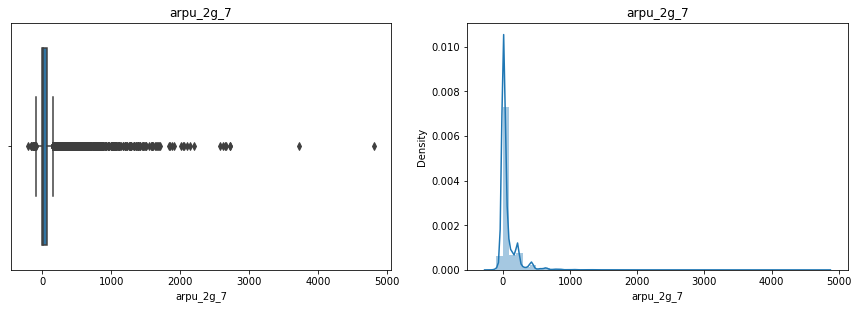

Data for :arpu_2g_8
Describe Data: 
 count    21013.00
mean        64.10
std        154.74
min       -572.74
25%          0.00
50%         11.67
75%         51.36
max       3467.17
Name: arpu_2g_8, dtype: float64
ValueCount Data: 
 (-576.784, 235.24]      19588
(235.24, 1043.222]       1345
(1043.222, 1851.205]       69
(1851.205, 2659.187]        8
(2659.187, 3467.17]         3
Name: arpu_2g_8, dtype: int64


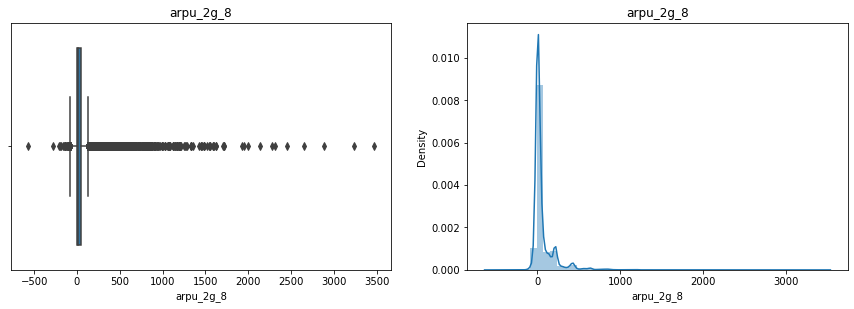

Data for :monthly_2g_6
Describe Data: 
 count    21013.00
mean         0.17
std          0.44
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          4.00
Name: monthly_2g_6, dtype: float64
ValueCount Data: 
 (-0.005, 0.8]    17792
(0.8, 1.6]        2812
(1.6, 2.4]         383
(2.4, 3.2]          20
(3.2, 4.0]           6
Name: monthly_2g_6, dtype: int64


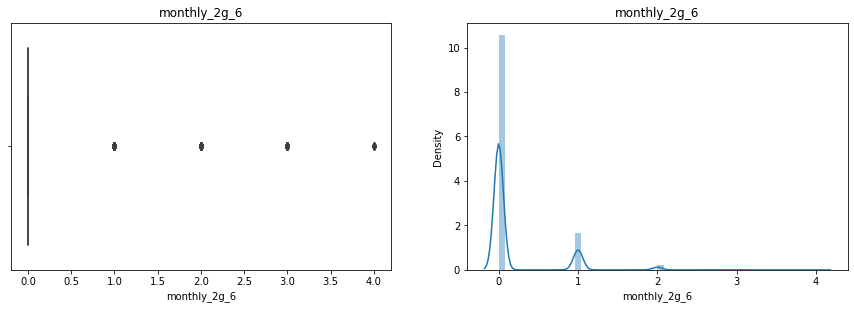

Data for :monthly_2g_7
Describe Data: 
 count    21013.00
mean         0.18
std          0.45
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          5.00
Name: monthly_2g_7, dtype: float64
ValueCount Data: 
 (-0.006, 1.0]    20527
(1.0, 2.0]         455
(2.0, 3.0]          27
(3.0, 4.0]           3
(4.0, 5.0]           1
Name: monthly_2g_7, dtype: int64


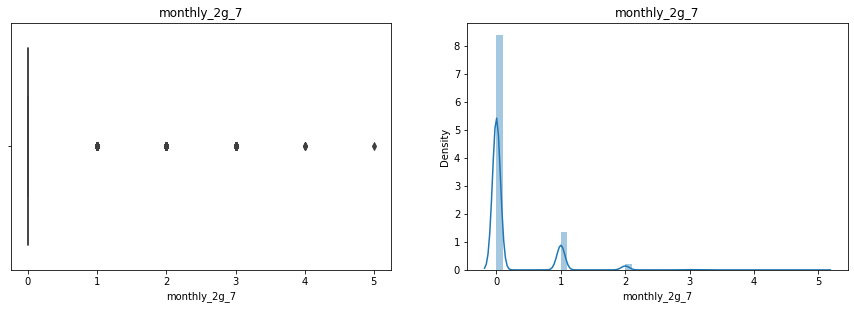

Data for :monthly_2g_8
Describe Data: 
 count    21013.00
mean         0.15
std          0.41
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          5.00
Name: monthly_2g_8, dtype: float64
ValueCount Data: 
 (-0.006, 1.0]    20729
(1.0, 2.0]         257
(2.0, 3.0]          20
(3.0, 4.0]           6
(4.0, 5.0]           1
Name: monthly_2g_8, dtype: int64


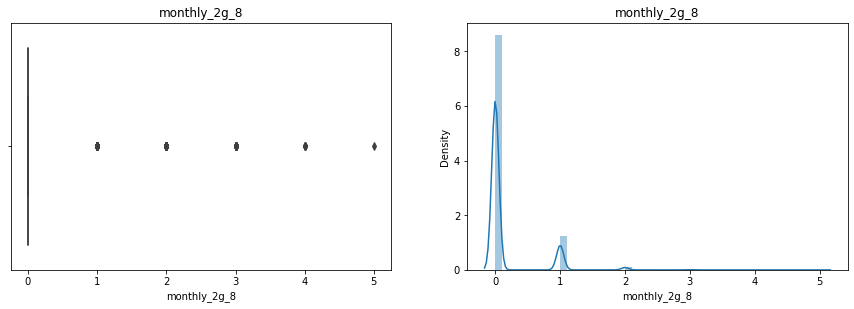

Data for :sachet_2g_6
Describe Data: 
 count    21013.00
mean         1.06
std          2.50
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         42.00
Name: sachet_2g_6, dtype: float64
ValueCount Data: 
 (-0.043000000000000003, 8.4]    20411
(8.4, 16.8]                       558
(16.8, 25.2]                       40
(25.2, 33.6]                        2
(33.6, 42.0]                        2
Name: sachet_2g_6, dtype: int64


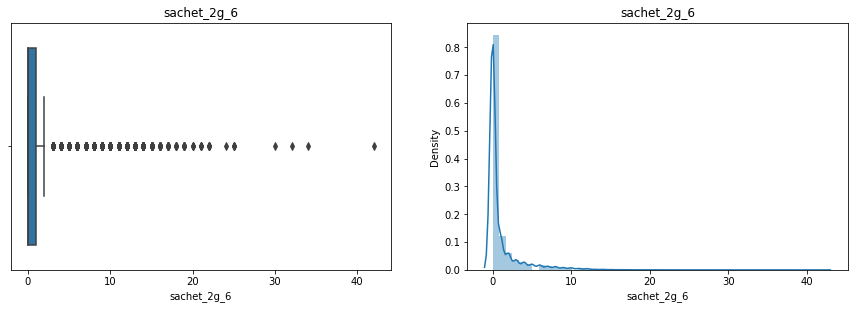

Data for :sachet_2g_7
Describe Data: 
 count    21013.00
mean         1.22
std          2.76
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         48.00
Name: sachet_2g_7, dtype: float64
ValueCount Data: 
 (-0.049, 9.6]    20441
(9.6, 19.2]        535
(19.2, 28.8]        31
(28.8, 38.4]         4
(38.4, 48.0]         2
Name: sachet_2g_7, dtype: int64


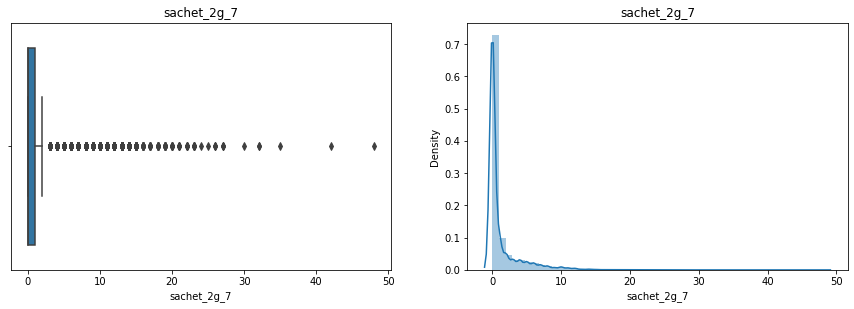

Data for :sachet_2g_8
Describe Data: 
 count    21013.00
mean         1.05
std          2.54
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         44.00
Name: sachet_2g_8, dtype: float64
ValueCount Data: 
 (-0.045, 8.8]    20438
(8.8, 17.6]        530
(17.6, 26.4]        36
(26.4, 35.2]         8
(35.2, 44.0]         1
Name: sachet_2g_8, dtype: int64


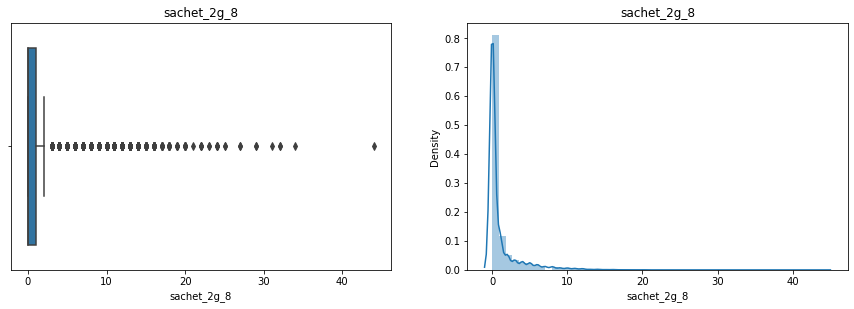

Data for :monthly_3g_6
Describe Data: 
 count    21013.00
mean         0.22
std          0.60
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          9.00
Name: monthly_3g_6, dtype: float64
ValueCount Data: 
 (-0.009999999999999998, 1.8]    20159
(1.8, 3.6]                        757
(3.6, 5.4]                         75
(5.4, 7.2]                         18
(7.2, 9.0]                          4
Name: monthly_3g_6, dtype: int64


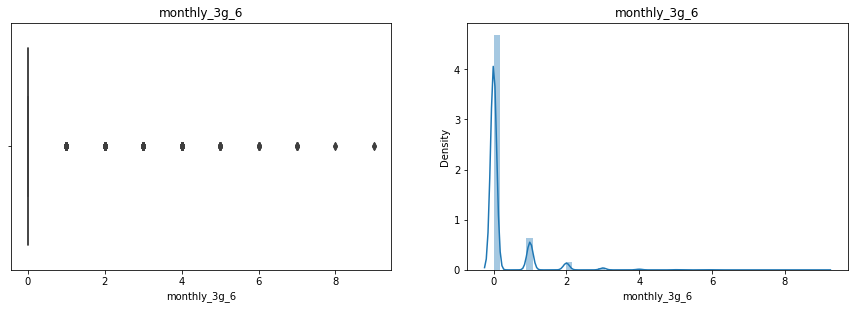

Data for :monthly_3g_7
Describe Data: 
 count    21013.00
mean         0.23
std          0.65
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         16.00
Name: monthly_3g_7, dtype: float64
ValueCount Data: 
 (-0.017, 3.2]    20904
(3.2, 6.4]          93
(6.4, 9.6]          13
(12.8, 16.0]         2
(9.6, 12.8]          1
Name: monthly_3g_7, dtype: int64


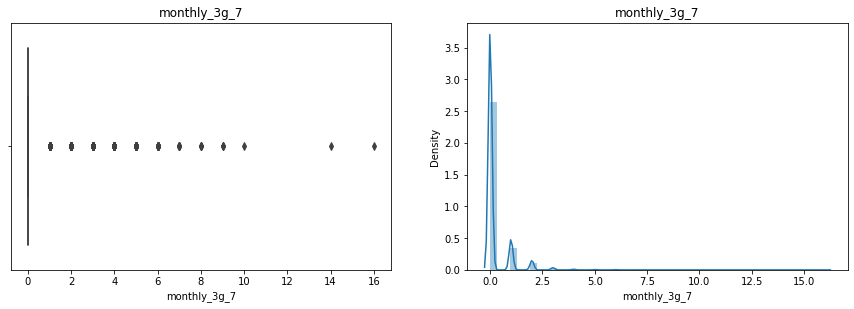

Data for :monthly_3g_8
Describe Data: 
 count    21013.00
mean         0.21
std          0.61
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         16.00
Name: monthly_3g_8, dtype: float64
ValueCount Data: 
 (-0.017, 3.2]    20911
(3.2, 6.4]          90
(6.4, 9.6]          10
(9.6, 12.8]          1
(12.8, 16.0]         1
Name: monthly_3g_8, dtype: int64


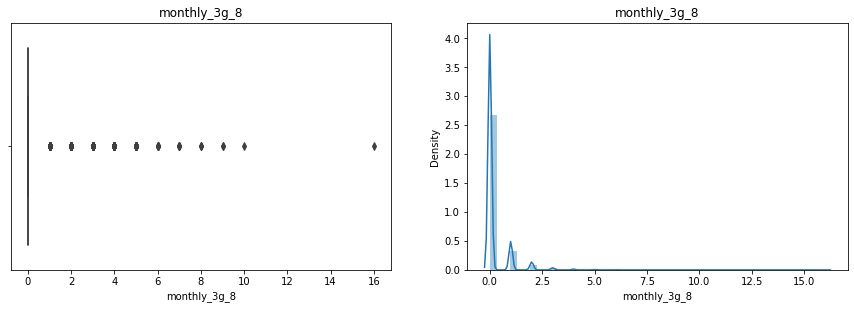

Data for :sachet_3g_6
Describe Data: 
 count    21013.00
mean         0.21
std          1.00
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         29.00
Name: sachet_3g_6, dtype: float64
ValueCount Data: 
 (-0.030000000000000002, 5.8]    20874
(5.8, 11.6]                       113
(11.6, 17.4]                       15
(17.4, 23.2]                        9
(23.2, 29.0]                        2
Name: sachet_3g_6, dtype: int64


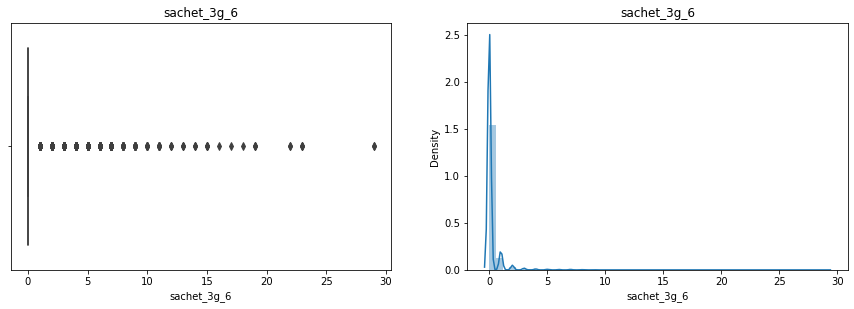

Data for :sachet_3g_7
Describe Data: 
 count    21013.00
mean         0.23
std          1.10
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         33.00
Name: sachet_3g_7, dtype: float64
ValueCount Data: 
 (-0.034, 6.6]    20903
(6.6, 13.2]         82
(13.2, 19.8]        17
(19.8, 26.4]         9
(26.4, 33.0]         2
Name: sachet_3g_7, dtype: int64


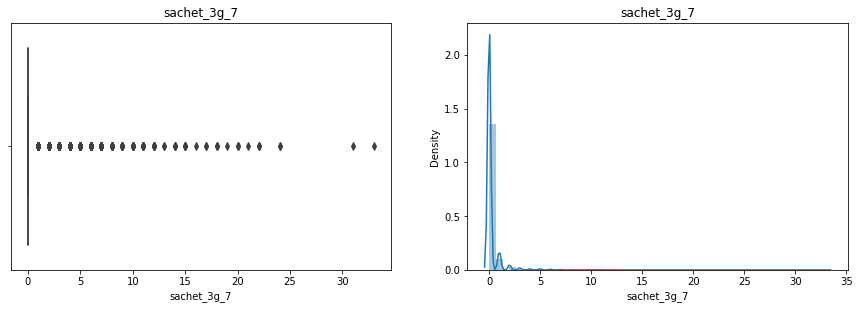

Data for :sachet_3g_8
Describe Data: 
 count    21013.00
mean         0.21
std          1.13
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         41.00
Name: sachet_3g_8, dtype: float64
ValueCount Data: 
 (-0.042, 8.2]    20939
(8.2, 16.4]         56
(16.4, 24.6]        13
(24.6, 32.8]         3
(32.8, 41.0]         2
Name: sachet_3g_8, dtype: int64


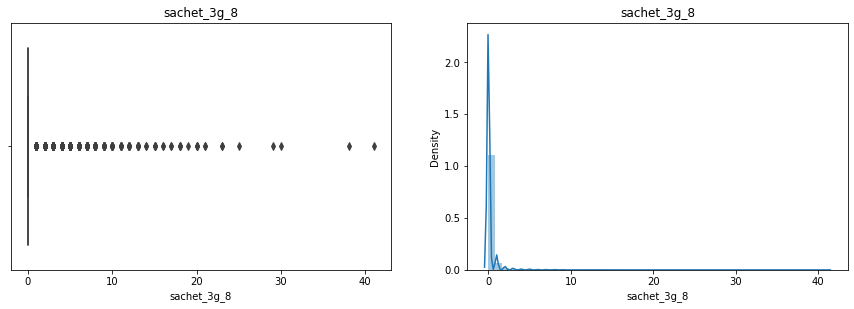

Data for :aon
Describe Data: 
 count    21013.00
mean      1210.53
std        954.83
min        180.00
25%        461.00
50%        854.00
75%       1758.00
max       4321.00
Name: aon, dtype: float64
ValueCount Data: 
 (175.858, 1008.2]    11793
(1008.2, 1836.4]      4207
(1836.4, 2664.6]      2522
(2664.6, 3492.8]      2006
(3492.8, 4321.0]       485
Name: aon, dtype: int64


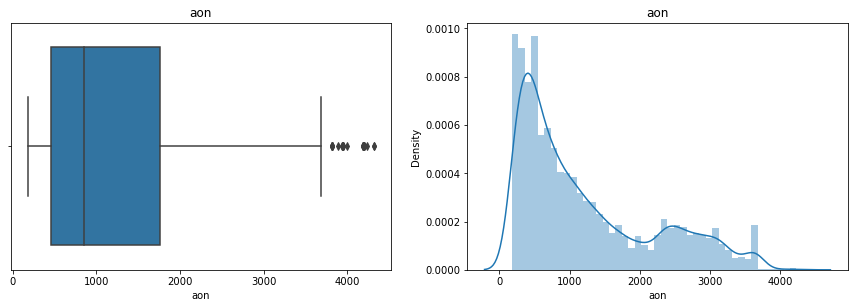

Data for :aug_vbc_3g
Describe Data: 
 count    21013.00
mean       168.38
std        422.86
min          0.00
25%          0.00
50%          0.00
75%        129.16
max      12916.22
Name: aug_vbc_3g, dtype: float64
ValueCount Data: 
 (-12.917, 2583.244]      20921
(2583.244, 5166.488]        83
(5166.488, 7749.732]         8
(10332.976, 12916.22]        1
(7749.732, 10332.976]        0
Name: aug_vbc_3g, dtype: int64


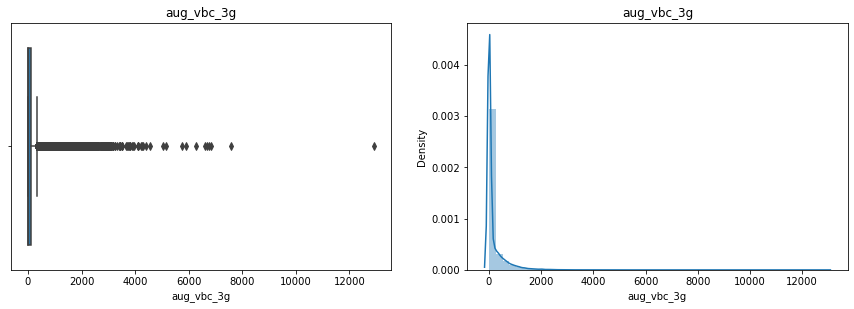

Data for :jul_vbc_3g
Describe Data: 
 count    21013.00
mean       176.04
std        438.73
min          0.00
25%          0.00
50%          0.00
75%        132.03
max       9165.60
Name: jul_vbc_3g, dtype: float64
ValueCount Data: 
 (-9.167, 1833.12]     20736
(1833.12, 3666.24]      245
(3666.24, 5499.36]       25
(5499.36, 7332.48]        5
(7332.48, 9165.6]         2
Name: jul_vbc_3g, dtype: int64


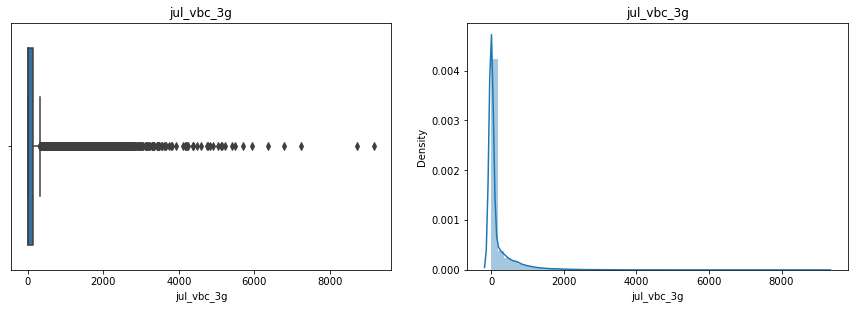

Data for :jun_vbc_3g
Describe Data: 
 count    21013.00
mean       158.46
std        423.02
min          0.00
25%          0.00
50%          0.00
75%         95.34
max      11166.21
Name: jun_vbc_3g, dtype: float64
ValueCount Data: 
 (-11.167, 2233.242]     20865
(2233.242, 4466.484]      129
(4466.484, 6699.726]       13
(6699.726, 8932.968]        5
(8932.968, 11166.21]        1
Name: jun_vbc_3g, dtype: int64


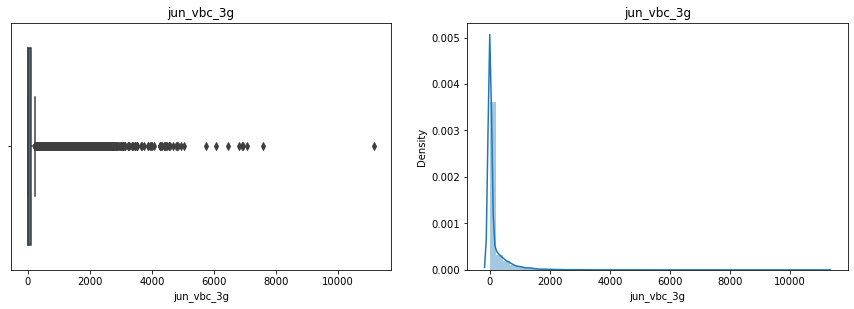

Data for :churn_probability
Describe Data: 
 count    21013.00
mean         0.08
std          0.28
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: churn_probability, dtype: float64
ValueCount Data: 
 (-0.002, 0.2]    19274
(0.8, 1.0]        1739
(0.2, 0.4]           0
(0.4, 0.6]           0
(0.6, 0.8]           0
Name: churn_probability, dtype: int64


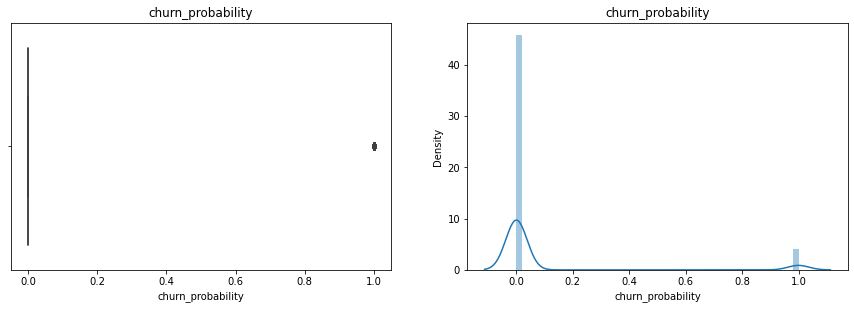

Data for :total_rech_6
Describe Data: 
 count    21013.00
mean      1115.57
std       1462.26
min          0.00
25%        546.00
50%        788.00
75%       1210.00
max      57866.00
Name: total_rech_6, dtype: float64
ValueCount Data: 
 (-57.867, 11573.2]    20956
(11573.2, 23146.4]       45
(23146.4, 34719.6]        8
(34719.6, 46292.8]        2
(46292.8, 57866.0]        2
Name: total_rech_6, dtype: int64


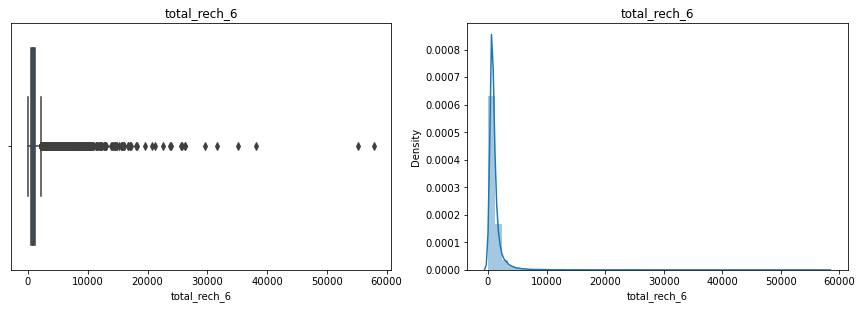

Data for :total_rech_7
Describe Data: 
 count    21013.00
mean      1189.25
std       1655.70
min          0.00
25%        550.00
50%        810.00
75%       1266.00
max      56075.00
Name: total_rech_7, dtype: float64
ValueCount Data: 
 (-56.076, 11215.0]    20929
(11215.0, 22430.0]       65
(22430.0, 33645.0]       14
(33645.0, 44860.0]        3
(44860.0, 56075.0]        2
Name: total_rech_7, dtype: int64


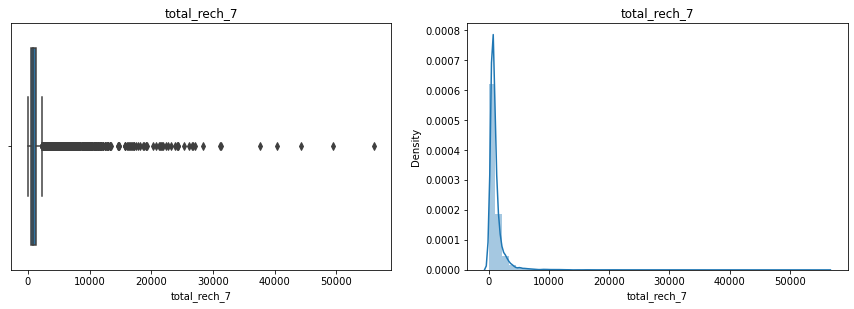

Data for :total_rech_8
Describe Data: 
 count    21013.00
mean      1045.32
std       1824.84
min          0.00
25%        396.00
50%        685.00
75%       1147.00
max      95884.50
Name: total_rech_8, dtype: float64
ValueCount Data: 
 (-95.885, 19176.9]    20986
(19176.9, 38353.8]       19
(38353.8, 57530.7]        6
(57530.7, 76707.6]        1
(76707.6, 95884.5]        1
Name: total_rech_8, dtype: int64


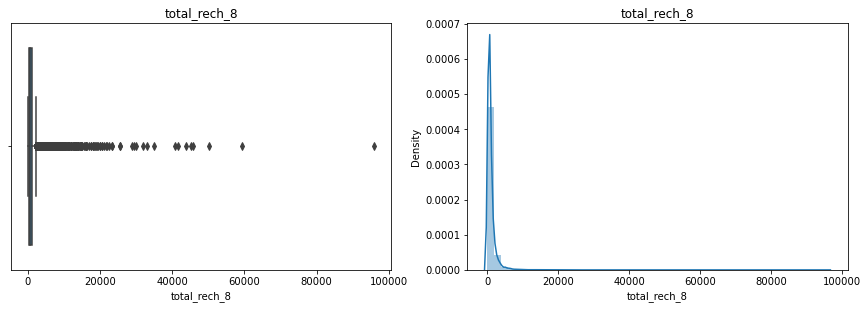

Data for :avg_amt_total_6_7
Describe Data: 
 count    21013.00
mean      1152.41
std       1340.68
min        477.50
25%        602.50
50%        798.50
75%       1206.00
max      37762.50
Name: avg_amt_total_6_7, dtype: float64
ValueCount Data: 
 (440.214, 7934.5]     20892
(7934.5, 15391.5]        94
(15391.5, 22848.5]       15
(22848.5, 30305.5]        9
(30305.5, 37762.5]        3
Name: avg_amt_total_6_7, dtype: int64


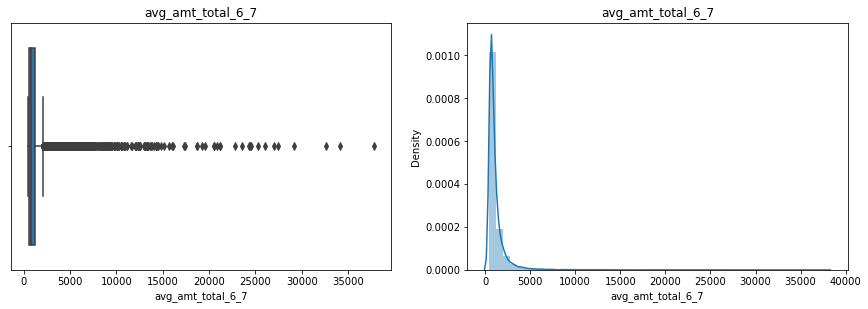

Data for :total_mou_call_8
Describe Data: 
 count    21013.00
mean       829.79
std        846.48
min          0.00
25%        201.17
50%        630.69
75%       1189.15
max      14079.84
Name: total_mou_call_8, dtype: float64
ValueCount Data: 
 (-14.081, 2815.968]      20398
(2815.968, 5631.936]       575
(5631.936, 8447.904]        35
(8447.904, 11263.872]        3
(11263.872, 14079.84]        2
Name: total_mou_call_8, dtype: int64


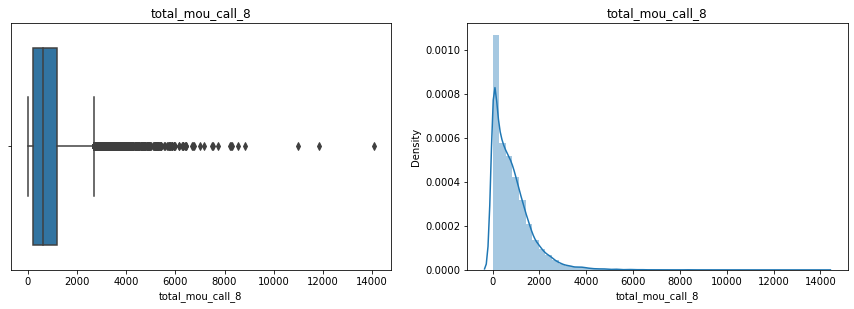

Data for :arpu_dff
Describe Data: 
 count    21013.00
mean       -51.73
std        336.50
min      -5811.05
25%       -180.18
50%        -41.93
75%         82.10
max      12808.62
Name: arpu_dff, dtype: float64
ValueCount Data: 
 (-2087.119, 1636.815]     20965
(1636.815, 5360.749]         37
(-5829.673, -2087.119]       10
(9084.683, 12808.617]         1
(5360.749, 9084.683]          0
Name: arpu_dff, dtype: int64


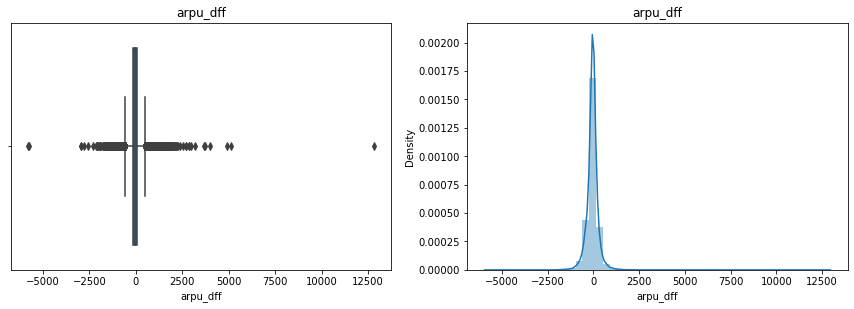

Data for :onnet_mou_dff
Describe Data: 
 count    21013.00
mean       -34.17
std        312.66
min      -5295.32
25%        -61.29
50%         -4.66
75%         20.38
max       6359.92
Name: onnet_mou_dff, dtype: float64
ValueCount Data: 
 (-633.221, 1697.826]                20298
(-2964.268, -633.221]                 652
(1697.826, 4028.873]                   51
(-5306.9710000000005, -2964.268]        8
(4028.873, 6359.92]                     4
Name: onnet_mou_dff, dtype: int64


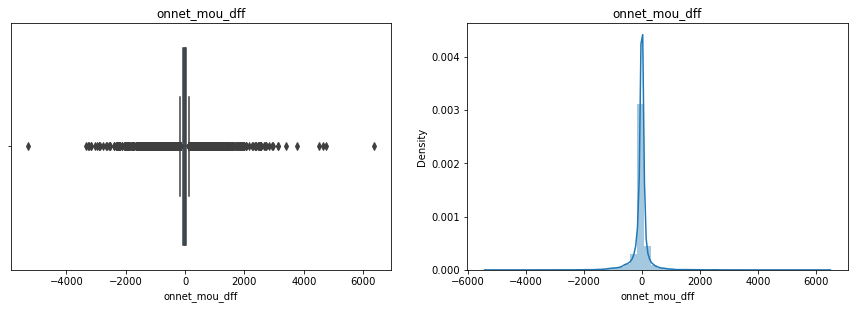

Data for :offnet_mou_dff
Describe Data: 
 count    21013.00
mean       -38.68
std        346.01
min      -7094.39
25%        -99.28
50%        -10.66
75%         46.38
max      12604.24
Name: offnet_mou_dff, dtype: float64
ValueCount Data: 
 (-3154.664, 785.062]     20752
(785.062, 4724.788]        253
(-7114.09, -3154.664]        5
(4724.788, 8664.514]         2
(8664.514, 12604.24]         1
Name: offnet_mou_dff, dtype: int64


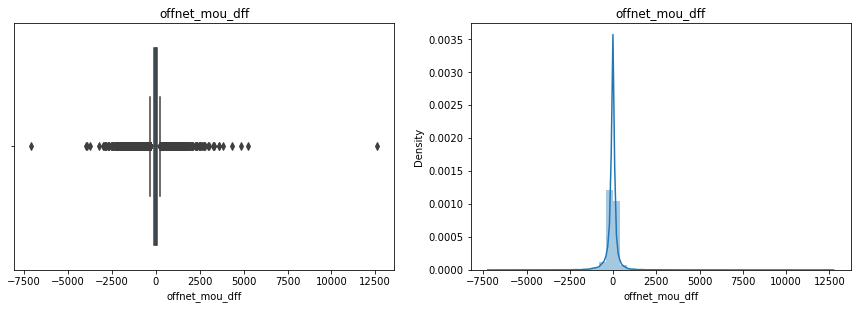

Data for :roam_ic_mou_dff
Describe Data: 
 count    21013.00
mean        -1.67
std         62.39
min      -1296.99
25%          0.00
50%          0.00
75%          0.00
max       2256.60
Name: roam_ic_mou_dff, dtype: float64
ValueCount Data: 
 (-586.268, 124.449]     20725
(124.449, 835.166]        263
(-1300.54, -586.268]       19
(835.166, 1545.883]         3
(1545.883, 2256.6]          3
Name: roam_ic_mou_dff, dtype: int64


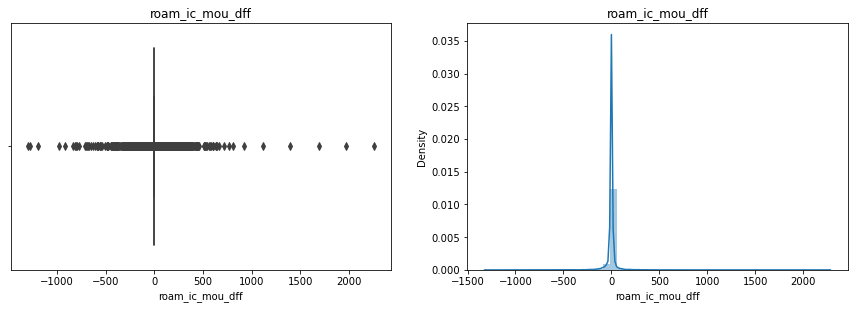

Data for :roam_og_mou_dff
Describe Data: 
 count    21013.00
mean        -4.41
std         93.29
min      -2410.84
25%          0.00
50%          0.00
75%          0.00
max       3057.15
Name: roam_og_mou_dff, dtype: float64
ValueCount Data: 
 (-223.641, 869.956]       20667
(-1317.238, -223.641]       320
(869.956, 1963.553]          21
(-2416.304, -1317.238]        3
(1963.553, 3057.15]           2
Name: roam_og_mou_dff, dtype: int64


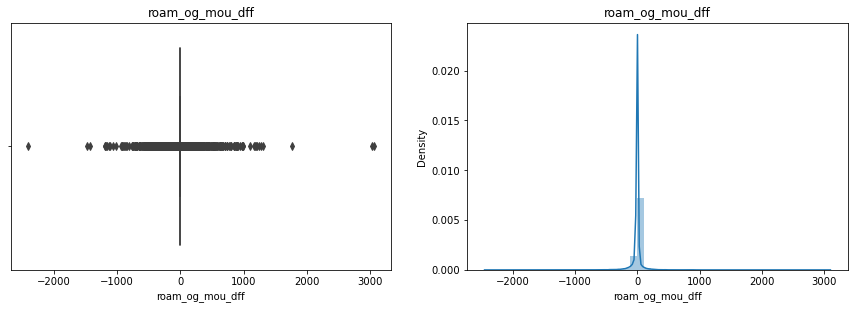

Data for :loc_og_mou_dff
Describe Data: 
 count    21013.00
mean       -19.99
std        209.21
min      -3270.40
25%        -59.20
50%         -6.68
75%         30.29
max       4619.98
Name: loc_og_mou_dff, dtype: float64
ValueCount Data: 
 (-114.25, 1463.825]       17740
(-1692.325, -114.25]       3236
(1463.825, 3041.9]           19
(-3278.291, -1692.325]       14
(3041.9, 4619.975]            4
Name: loc_og_mou_dff, dtype: int64


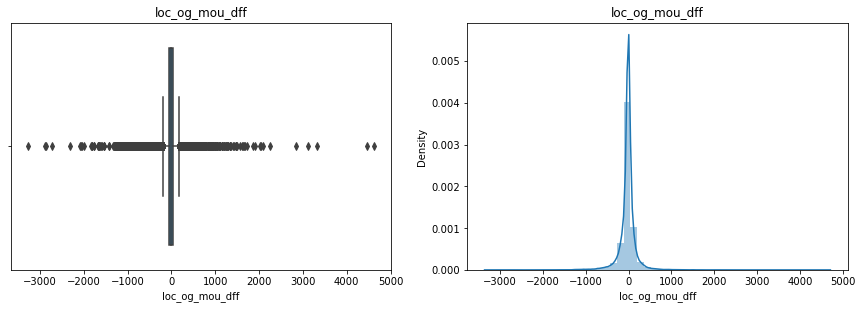

Data for :std_og_mou_dff
Describe Data: 
 count    21013.00
mean       -46.33
std        427.79
min      -7127.42
25%        -58.86
50%         -0.36
75%         12.08
max      12715.48
Name: std_og_mou_dff, dtype: float64
ValueCount Data: 
 (-3158.844, 809.737]      20603
(809.737, 4778.318]         391
(-7147.269, -3158.844]       15
(4778.318, 8746.899]          3
(8746.899, 12715.48]          1
Name: std_og_mou_dff, dtype: int64


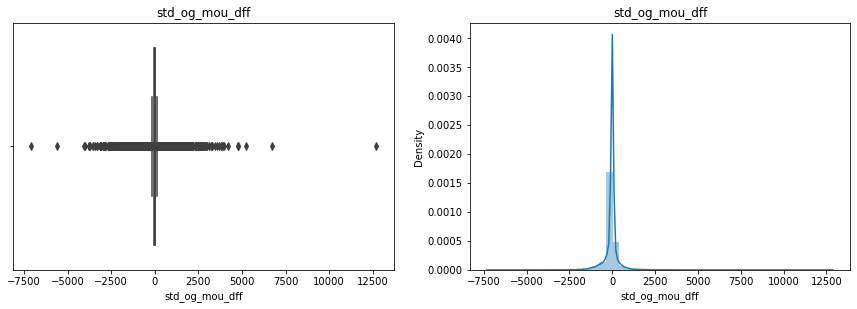

Data for :isd_og_mou_dff
Describe Data: 
 count    21013.00
mean        -2.16
std         24.00
min       -674.23
25%          0.00
50%          0.00
75%          0.00
max        544.78
Name: isd_og_mou_dff, dtype: float64
ValueCount Data: 
 (-186.627, 57.175]      20779
(57.175, 300.978]         214
(-430.429, -186.627]       10
(300.978, 544.78]           7
(-675.452, -430.429]        3
Name: isd_og_mou_dff, dtype: int64


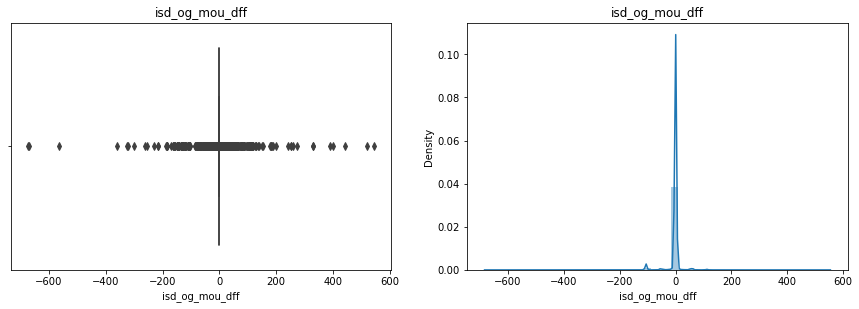

Data for :spl_og_mou_dff
Describe Data: 
 count    21013.00
mean         0.35
std         19.17
min      -1081.91
25%         -2.64
50%          0.00
75%          2.10
max        747.62
Name: spl_og_mou_dff, dtype: float64
ValueCount Data: 
 (-350.098, 15.808]       19798
(15.808, 381.714]         1210
(381.714, 747.62]            3
(-1083.741, -716.004]        1
(-716.004, -350.098]         1
Name: spl_og_mou_dff, dtype: int64


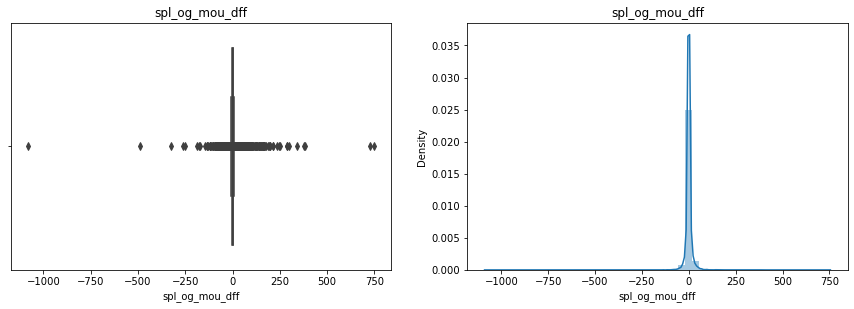

Data for :total_og_mou_dff
Describe Data: 
 count    21013.00
mean       -68.44
std        502.23
min      -7213.41
25%       -169.30
50%        -13.98
75%         68.48
max      12768.70
Name: total_og_mou_dff, dtype: float64
ValueCount Data: 
 (-3216.987, 779.436]      20373
(779.436, 4775.859]         616
(-7233.393, -3216.987]       19
(4775.859, 8772.282]          4
(8772.282, 12768.705]         1
Name: total_og_mou_dff, dtype: int64


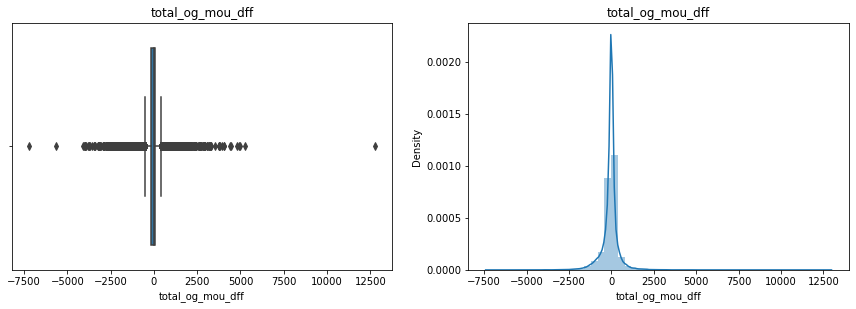

Data for :loc_ic_mou_dff
Describe Data: 
 count    21013.00
mean        -8.08
std        175.00
min      -3783.25
25%        -48.06
50%         -3.91
75%         36.48
max       3485.37
Name: loc_ic_mou_dff, dtype: float64
ValueCount Data: 
 (-875.801, 577.922]                 20793
(577.922, 2031.646]                   147
(-2329.525, -875.801]                  65
(2031.646, 3485.37]                     6
(-3790.5190000000002, -2329.525]        2
Name: loc_ic_mou_dff, dtype: int64


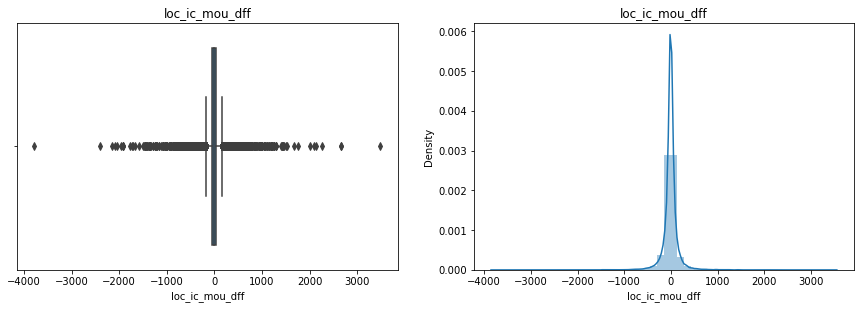

Data for :std_ic_mou_dff
Describe Data: 
 count    21013.00
mean        -3.57
std         95.61
min      -2777.35
25%        -11.66
50%         -0.82
75%          4.90
max       3321.40
Name: std_ic_mou_dff, dtype: float64
ValueCount Data: 
 (-337.852, 881.897]                 20867
(-1557.601, -337.852]                 119
(881.897, 2101.646]                    19
(-2783.4500000000003, -1557.601]        6
(2101.646, 3321.395]                    2
Name: std_ic_mou_dff, dtype: int64


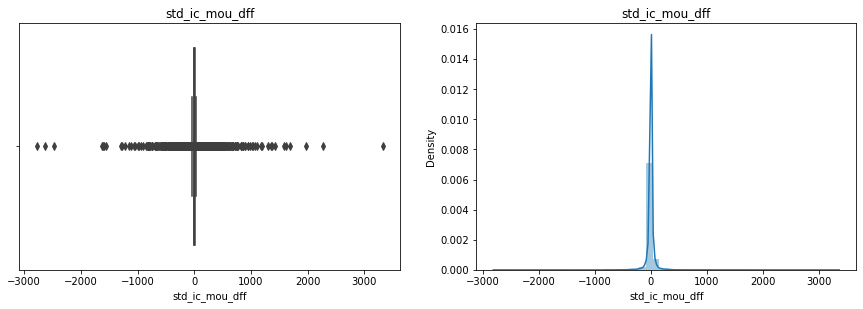

Data for :isd_ic_mou_dff
Describe Data: 
 count    21013.00
mean         0.21
std         60.85
min      -5534.59
25%          0.00
50%          0.00
75%          0.00
max       3163.69
Name: isd_ic_mou_dff, dtype: float64
ValueCount Data: 
 (-315.624, 1424.033]      20975
(-2055.281, -315.624]        35
(1424.033, 3163.69]           2
(-5543.294, -3794.938]        1
(-3794.938, -2055.281]        0
Name: isd_ic_mou_dff, dtype: int64


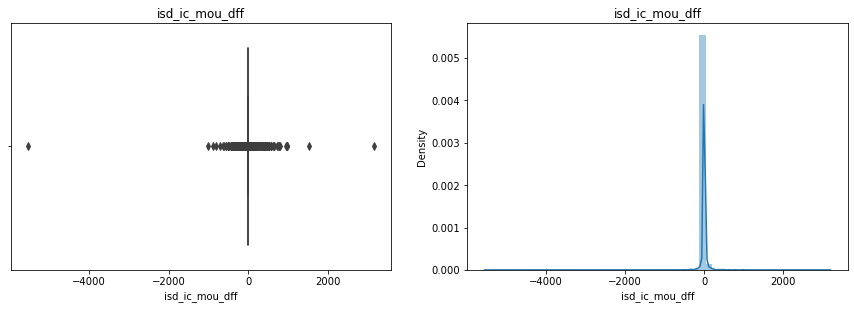

Data for :spl_ic_mou_dff
Describe Data: 
 count    21013.00
mean        -1.34
std         11.22
min        -66.09
25%          0.00
50%          0.00
75%          0.00
max         65.84
Name: spl_ic_mou_dff, dtype: float64
ValueCount Data: 
 (-13.322, 13.065]     20134
(-66.227, -39.708]      498
(13.065, 39.451]        201
(-39.708, -13.322]      140
(39.451, 65.837]         40
Name: spl_ic_mou_dff, dtype: int64


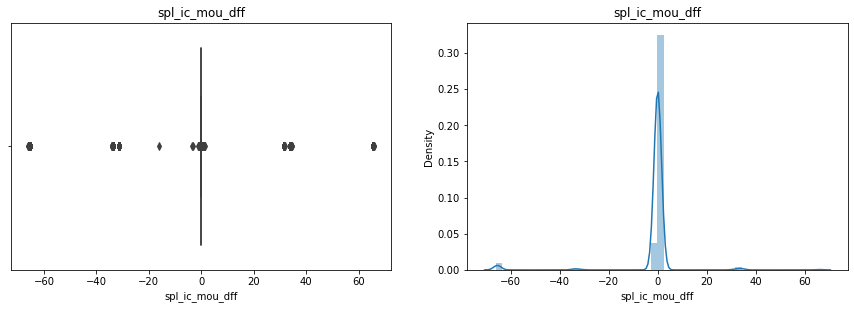

Data for :total_ic_mou_dff
Describe Data: 
 count    21013.00
mean       -12.89
std        217.76
min      -5710.15
25%        -65.93
50%         -5.19
75%         44.29
max       3485.37
Name: total_ic_mou_dff, dtype: float64
ValueCount Data: 
 (-192.838, 1646.266]      19174
(-2031.942, -192.838]      1817
(1646.266, 3485.37]          13
(-3871.046, -2031.942]        8
(-5719.347, -3871.046]        1
Name: total_ic_mou_dff, dtype: int64


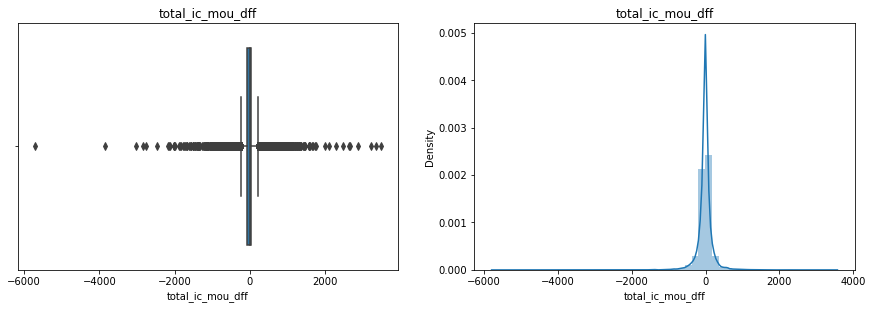

Data for :total_rech_num_dff
Describe Data: 
 count    21013.00
mean        -1.82
std          6.61
min        -86.50
25%         -4.50
50%         -1.50
75%          1.00
max         92.00
Name: total_rech_num_dff, dtype: float64
ValueCount Data: 
 (-15.1, 20.6]       20305
(-50.8, -15.1]        578
(20.6, 56.3]          115
(-86.679, -50.8]       13
(56.3, 92.0]            2
Name: total_rech_num_dff, dtype: int64


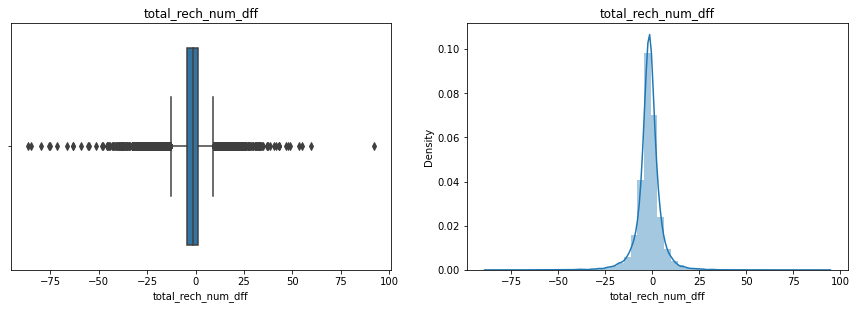

Data for :total_rech_amt_dff
Describe Data: 
 count    21013.00
mean       -76.98
std        418.97
min      -6950.00
25%       -245.00
50%        -57.00
75%         99.00
max      14344.50
Name: total_rech_amt_dff, dtype: float64
ValueCount Data: 
 (-2691.1, 1567.8]       20936
(1567.8, 5826.7]           64
(-6971.295, -2691.1]       10
(5826.7, 10085.6]           2
(10085.6, 14344.5]          1
Name: total_rech_amt_dff, dtype: int64


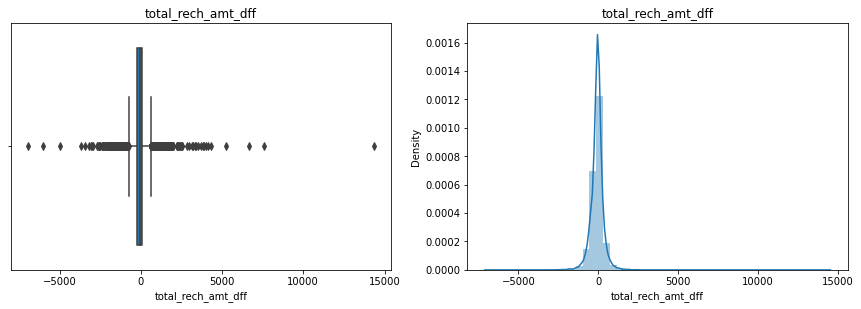

Data for :max_rech_amt_dff
Describe Data: 
 count    21013.00
mean       -10.42
std        132.73
min      -1901.00
25%        -33.00
50%          0.00
75%         25.00
max       3949.00
Name: max_rech_amt_dff, dtype: float64
ValueCount Data: 
 (-731.0, 439.0]                  20802
(439.0, 1609.0]                    124
(-1906.8509999999999, -731.0]       85
(1609.0, 2779.0]                     1
(2779.0, 3949.0]                     1
Name: max_rech_amt_dff, dtype: int64


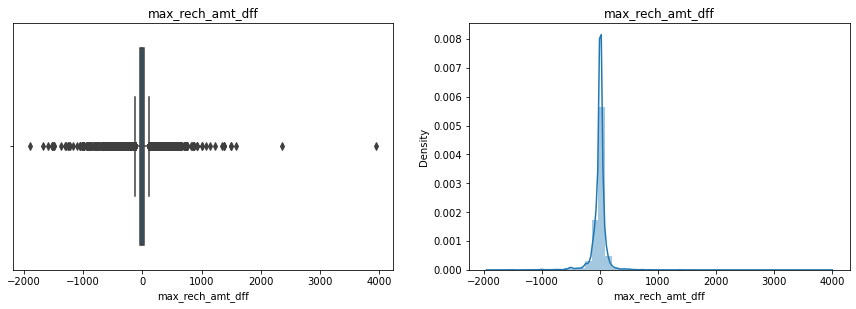

Data for :total_rech_data_dff
Describe Data: 
 count    21013.00
mean       -30.11
std       1353.47
min     -29699.00
25%       -204.50
50%          0.00
75%          0.00
max      86866.50
Name: total_rech_data_dff, dtype: float64
ValueCount Data: 
 (-6385.9, 16927.2]       20958
(-29815.567, -6385.9]       43
(16927.2, 40240.3]          11
(63553.4, 86866.5]           1
(40240.3, 63553.4]           0
Name: total_rech_data_dff, dtype: int64


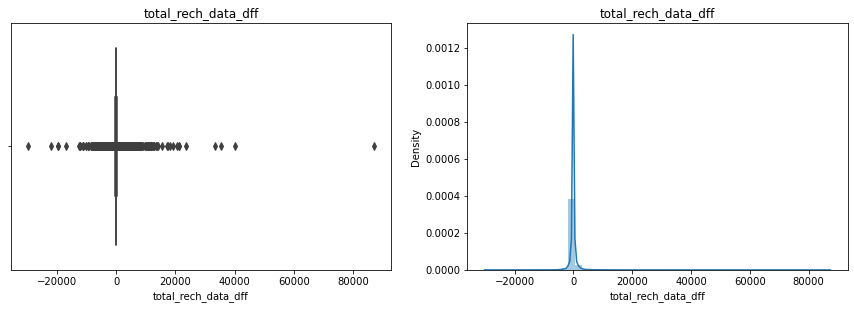

Data for :av_rech_amt_data_dff
Describe Data: 
 count    21013.00
mean       -13.44
std        148.07
min      -1730.50
25%        -61.00
50%          0.00
75%          8.50
max       1805.00
Name: av_rech_amt_data_dff, dtype: float64
ValueCount Data: 
 (-316.3, 390.8]         20269
(-1023.4, -316.3]         448
(390.8, 1097.9]           265
(-1734.037, -1023.4]       16
(1097.9, 1805.0]           15
Name: av_rech_amt_data_dff, dtype: int64


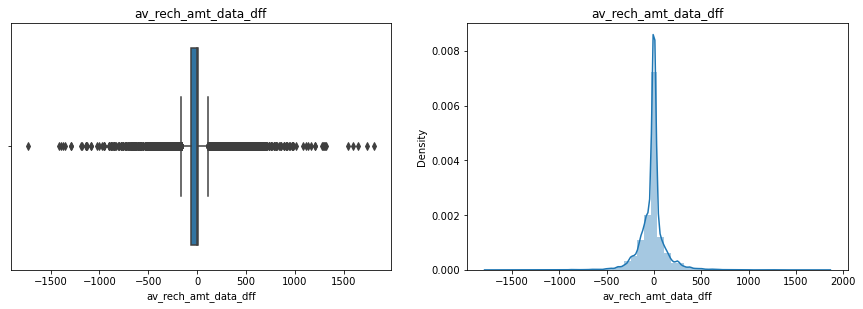

Data for :vol_2g_mb_dff
Describe Data: 
 count    21013.00
mean       -19.34
std        257.50
min      -4740.92
25%        -21.16
50%          0.00
75%          0.00
max       8062.30
Name: vol_2g_mb_dff, dtype: float64
ValueCount Data: 
 (-2180.281, 380.363]      20399
(380.363, 2941.007]         591
(-4753.729, -2180.281]       17
(2941.007, 5501.651]          5
(5501.651, 8062.295]          1
Name: vol_2g_mb_dff, dtype: int64


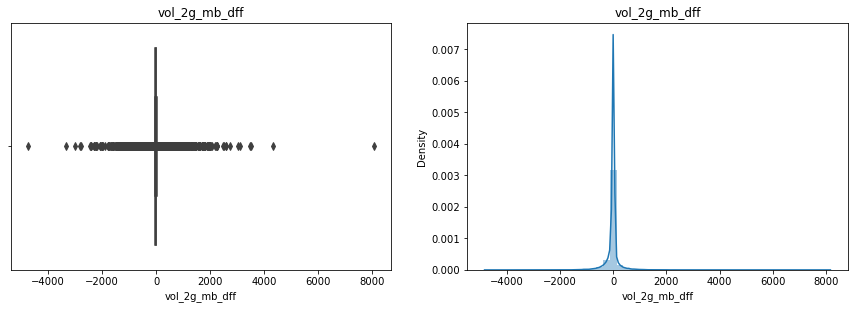

Data for :vol_3g_mb_dff
Describe Data: 
 count    21013.00
mean        -5.80
std        634.98
min     -12385.50
25%         -1.74
50%          0.00
75%          0.00
max      13840.34
Name: vol_3g_mb_dff, dtype: float64
ValueCount Data: 
 (-1895.169, 3349.999]      20766
(-7140.337, -1895.169]       168
(3349.999, 8595.167]          67
(-12411.732, -7140.337]        6
(8595.167, 13840.335]          6
Name: vol_3g_mb_dff, dtype: int64


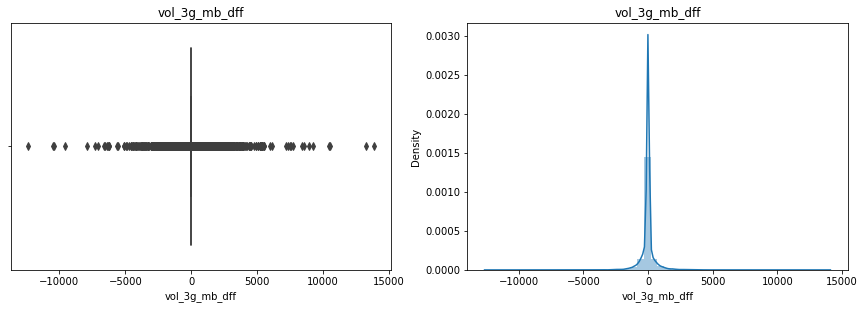

In [34]:
# checking outliers in all num columns
for col in df_tchurn_hv.select_dtypes(exclude='object').columns:
    dataOverview(df_tchurn_hv,col)

#### Most of the features are left skewed, however derived features have some kind of normalize

In [35]:
#can be droped 
#1 loc_og_t2o_mou
#2 std_og_t2o_mou
#3 loc_ic_t2o_mou
#4 

In [36]:
#cols=df_tchurn_hv.select_dtypes(exclude='object').columns
#q1=df_tchurn_hv[cols].quantile(.15)
#q3=df_tchurn_hv[cols].quantile(.90)
#iqr=q3-q1
#df_tchurn_hv=df_tchurn_hv[~((df_tchurn_hv[cols]<(q1-1.5*iqr)) | (df_tchurn_hv[cols]>(q3+1.5*iqr))).any(axis=1)]

NameError: name 'q3' is not defined

In [ ]:
#post outlier treatment 
# checking outliers in all num columns
#for col in df_tchurn_hv.select_dtypes(exclude='object').columns:
#    dataOverview(df_tchurn_hv,col)

### skeness reduced to a certain extent, and can be further used to build model 


In [37]:
## check the coorealtion between matrix
cor=df_tchurn_hv.corr()
cor

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
loc_og_t2o_mou                   NaN             NaN             NaN   
std_og_t2o_mou                   NaN             NaN             NaN   
loc_ic_t2o_mou                   NaN             NaN             NaN   
arpu_6                           NaN             NaN             NaN   
arpu_7                           NaN             NaN             NaN   
arpu_8                           NaN             NaN             NaN   
onnet_mou_6                      NaN             NaN             NaN   
onnet_mou_7                      NaN             NaN             NaN   
onnet_mou_8                      NaN             NaN             NaN   
offnet_mou_6                     NaN             NaN             NaN   
offnet_mou_7                     NaN             NaN             NaN   
offnet_mou_8                     NaN             NaN             NaN   
roam_ic_mou_6                    NaN             NaN             NaN   
roam_ic_mou_7                    NaN             NaN             NaN   
roam_ic_mou_8                    NaN             NaN             NaN   
roam_og_mou_6                    NaN             NaN             NaN   
roam_og_mou_7                    NaN             NaN             NaN   
roam_og_mou_8                    NaN             NaN             NaN   
loc_og_t2t_mou_6                 NaN             NaN             NaN   
loc_og_t2t_mou_7                 NaN             NaN             NaN   
loc_og_t2t_mou_8                 NaN             NaN             NaN   
loc_og_t2m_mou_6                 NaN             NaN             NaN   
loc_og_t2m_mou_7                 NaN             NaN             NaN   
loc_og_t2m_mou_8                 NaN             NaN             NaN   
loc_og_t2f_mou_6                 NaN             NaN             NaN   
loc_og_t2f_mou_7                 NaN             NaN             NaN   
loc_og_t2f_mou_8                 NaN             NaN             NaN   
loc_og_t2c_mou_6                 NaN             NaN             NaN   
loc_og_t2c_mou_7                 NaN             NaN             NaN   
loc_og_t2c_mou_8                 NaN             NaN             NaN   
loc_og_mou_6                     NaN             NaN             NaN   
loc_og_mou_7                     NaN             NaN             NaN   
loc_og_mou_8                     NaN             NaN             NaN   
std_og_t2t_mou_6                 NaN             NaN             NaN   
std_og_t2t_mou_7                 NaN             NaN             NaN   
std_og_t2t_mou_8                 NaN             NaN             NaN   
std_og_t2m_mou_6                 NaN             NaN             NaN   
std_og_t2m_mou_7                 NaN             NaN             NaN   
std_og_t2m_mou_8                 NaN             NaN             NaN   
std_og_t2f_mou_6                 NaN             NaN             NaN   
std_og_t2f_mou_7                 NaN             NaN             NaN   
std_og_t2f_mou_8                 NaN             NaN             NaN   
std_og_t2c_mou_6                 NaN             NaN             NaN   
std_og_t2c_mou_7                 NaN             NaN             NaN   
std_og_t2c_mou_8                 NaN             NaN             NaN   
std_og_mou_6                     NaN             NaN             NaN   
std_og_mou_7                     NaN             NaN             NaN   
std_og_mou_8                     NaN             NaN             NaN   
isd_og_mou_6                     NaN             NaN             NaN   
isd_og_mou_7                     NaN             NaN             NaN   
isd_og_mou_8                     NaN             NaN             NaN   
spl_og_mou_6                     NaN             NaN             NaN   
spl_og_mou_7                     NaN             NaN             NaN   
spl_og_mou_8                     NaN             NaN             NaN   
og_others_6                      NaN             NaN          

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

In [51]:
# Train - Test Split 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [42]:
y=df_tchurn_hv.pop('churn_probability')
X=df_tchurn_hv

KeyError: 'churn_probability'

In [45]:
# splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [43]:
# dealing with data imbalance
## since ratio of churn vs unchurn is high hence there is data imbalnce use SMOTE
from imblearn.over_sampling import SMOTE

In [44]:
# Initiate SMOTE
sm = SMOTE(random_state=27)

In [47]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [48]:
X_train.to_csv("X_train.csv")

In [52]:

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])


In [54]:
pca.fit(X_train)
tc_pca = pca.fit_transform(X_train)

In [55]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.90
1       18.86
2       24.88
3       30.65
4       34.39
5       37.75
6       40.61
7       43.37
8       45.88
9       48.08
10      50.08
11      52.01
12      53.89
13      55.74
14      57.45
15      59.13
16      60.73
17      62.29
18      63.81
19      65.16
20      66.48
21      67.77
22      69.01
23      70.18
24      71.30
25      72.39
26      73.43
27      74.42
28      75.38
29      76.31
30      77.23
31      78.12
32      78.98
33      79.84
34      80.66
35      81.42
36      82.16
37      82.85
38      83.53
39      84.17
40      84.80
41      85.40
42      85.98
43      86.54
44      87.08
45      87.58
46      88.06
47      88.53
48      88.99
49      89.42
50      89.83
51      90.24
52      90.63
53      91.00
54      91.37
55      91.71
56      92.04
57      92.37
58      92.69
59      92.99
60      93.29
61      93.58
62      93.86
63      94.13
64      94.38
65      94.63
66      94.86
67      95.09
68      95.31
69      95.53
70      95.74
71    

~ 51 components explain 90% variance
~ 71 components explain 95% variance

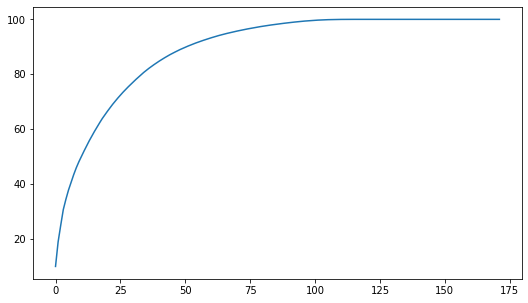

In [56]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [57]:
#PCA and Logistic Regression
#create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [58]:
# fit model
pipeline.fit(X_train, y_train)
# check score on train data
pipeline.score(X_train, y_train)

0.8549944901795553

In [59]:
# Evaluate on Test Data 
y_pred = pipeline.predict(X_test)

# create onfusion matrix
con_m = confusion_matrix(y_test, y_pred)
print(con_m)
sen, spec, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print('Sensitivity:',round(sen,2),'Specificity:',round(spec,2))

#Auc
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
auc=roc_auc_score(y_test, y_pred_prob)
print("AUC",auc)


[[3258  589]
 [  72  284]]
Sensitivity: 0.8 Specificity: 0.85
AUC 0.8890591822608015


In [61]:
#Hyperparameter Tuning PCA and Logistic Regression
pca = PCA()
log = LogisticRegression()
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", log)
        ]
pca_logistic = Pipeline(steps)
# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [62]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [63]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.777078      0.054420         0.000000        0.000000   
1        5.206488      0.265333         0.000000        0.000000   
2        6.025775      0.200489         0.115616        0.028970   
3        7.248180      0.551205         0.158445        0.012140   
4        4.379370      0.506348         0.000000        0.000000   
5        5.265774      0.398751         0.000000        0.000000   
6        5.639625      0.235402         0.115397        0.015558   
7        7.794361      0.613540         0.164403        0.025081   
8        4.200065      0.231674         0.000000        0.000000   
9        4.867485      0.442596         0.000000        0.000000   
10       5.426190      0.346572         0.115628        0.007654   
11       7.165294      0.232682         0.143804        0.018196   
12       4.176502      0.200519         0.000000        0.000000   
13       4.694746      0.203914         0.000000        0.000000   
14       5.475142      0.092612         0.116568        0.007244   
15       7.518017      0.248158         0.147166        0.009927   
16       4.401040      0.143101         0.000000        0.000000   
17       4.770747      0.216342         0.000000        0.000000   
18       5.619745      0.138976         0.125596        0.022711   
19       7.949206      0.399708         0.167375        0.014045   
20       4.408861      0.213065         0.000000        0.000000   
21       4.817500      0.198848         0.000000        0.000000   
22       5.463338      0.227250         0.121093        0.016497   
23       7.563138      0.313091         0.149117        0.007133   
24       4.217979      0.137098         0.000000        0.000000   
25       4.848703      0.176382         0.000000        0.000000   
26       5.592626      0.174287         0.109393        0.013981   
27       7.339232      0.205477         0.152772        0.015834   
28       4.167545      0.130794         0.000000        0.000000   
29       4.577426      0.120461         0.000000        0.000000   
30       4.496045      0.297996         0.055186        0.008126   
31       4.275281      0.271851         0.040526        0.015400   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [64]:
print("AUC: ", model.best_score_)
print("hyperparameters: ", model.best_params_)

AUC:  0.9229399409308898
hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [65]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
con_f = confusion_matrix(y_test, y_pred)
print(con_f)

# check sensitivity and specificity
sens, spec, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sens, 2), "Specificity:", round(spec, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc=roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

[[3257  590]
 [  69  287]]
Sensitivity: 0.81 Specificity: 0.85
AUC: 0.8910795804698247


In [66]:
#Random Forest

In [67]:
# random forest
forest = RandomForestClassifier( n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [68]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [69]:
print("AUC: ", model.best_score_)
print("hyperparameters: ", model.best_params_)

AUC:  0.9955182713863898
hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [70]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
con_f = confusion_matrix(y_test, y_pred)
print(con_f)

# check sensitivity and specificity
sens, spec, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sens, 2), "Specificity:", round(spec, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc=roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

[[3717  130]
 [ 128  228]]
Sensitivity: 0.64 Specificity: 0.97
AUC: 0.9219748059921198


The best model among the three is Hyperparameter Tuning PCA and Logistic Regression

In [71]:
#Choosing best features

In [72]:
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

13


In [73]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, oob_score=True, random_state=4, verbose=1)

In [74]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.0s finished


RandomForestClassifier(max_features=13, oob_score=True, random_state=4,
                       verbose=1)

In [75]:
rf_model.oob_score_

0.9705386659752382

In [76]:
len(X_train.columns)

172

In [77]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
con_f = confusion_matrix(y_test, y_pred)
print(con_f)

# check sensitivity and specificity
sens, spec, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sens, 2), "Specificity:", round(spec, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc=roc_auc_score(y_test, y_pred_prob)
print("AUC/ROC:", auc)

[[3717  130]
 [ 128  228]]
Sensitivity: 0.64 Specificity: 0.97
AUC/ROC: 0.9219748059921198


In [81]:
#Featurs
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'var': features, 'importance_%': importance*100})
feature_importance = feature_importance[['var', 'importance_%']]

# sort features
feature_importance = feature_importance.sort_values('importance_%', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance['importance_%'].sum())
feature_importance

Sum of importance= 100.0


var  importance_%
0           roam_og_mou_8      8.758107
1           roam_ic_mou_8      5.888143
2          total_ic_mou_8      4.907838
3            loc_ic_mou_8      3.698764
4            total_rech_8      3.548367
5         roam_ic_mou_dff      3.026097
6         roam_og_mou_dff      2.478588
7                arpu_dff      2.386238
8            spl_ic_mou_8      2.281117
9            loc_og_mou_8      2.279859
10       total_mou_call_8      2.195067
11     total_rech_amt_dff      1.481165
12       loc_og_t2t_mou_8      1.447722
13       total_ic_mou_dff      1.396529
14            og_others_8      1.296236
15     av_rech_amt_data_8      1.293020
16       total_rech_amt_8      1.259628
17     last_day_rch_amt_8      1.258993
18          onnet_mou_dff      1.226952
19         max_rech_amt_8      1.200445
20           isd_og_mou_8      1.091416
21                 arpu_8      1.048339
22         total_og_mou_8      1.003692
23       std_ic_t2t_mou_8      0.964912
24       loc_ic_t2t_mou_8      0.942513
25       loc_ic_t2m_mou_8      0.939327
26       total_og_mou_dff      0.930911
27         spl_ic_mou_dff      0.925052
28         loc_ic_mou_dff      0.903156
29     total_rech_num_dff      0.810844
30          roam_ic_mou_7      0.791107
31         loc_og_mou_dff      0.712869
32            onnet_mou_8      0.688117
33         std_og_mou_dff      0.652810
34          roam_og_mou_7      0.652332
35      total_rech_data_8      0.643419
36         isd_og_mou_dff      0.620072
37       total_rech_num_8      0.538104
38              arpu_3g_8      0.536083
39       loc_og_t2m_mou_8      0.526061
40         offnet_mou_dff      0.519263
41       std_og_t2t_mou_7      0.494332
42          roam_og_mou_6      0.472176
43         std_ic_mou_dff      0.467300
44       max_rech_amt_dff      0.466146
45            vol_3g_mb_8      0.441033
46           spl_og_mou_7      0.439981
47       loc_og_t2c_mou_8      0.435018
48              arpu_2g_8      0.418192
49                    aon      0.390235
50           spl_ic_mou_6      0.382962
51       std_ic_t2t_mou_7      0.377655
52           std_og_mou_7      0.366944
53          vol_2g_mb_dff      0.364556
54          vol_3g_mb_dff      0.355511
55       loc_og_t2t_mou_7      0.354801
56       std_og_t2t_mou_6      0.348721
57          roam_ic_mou_6      0.339418
58           spl_og_mou_8      0.337671
59     last_day_rch_amt_7      0.334757
60           loc_ic_mou_7      0.329111
61            onnet_mou_6      0.324356
62       loc_ic_t2t_mou_6      0.316956
63           spl_og_mou_6      0.315960
64       loc_og_t2m_mou_7      0.308774
65       loc_ic_t2t_mou_7      0.308114
66                 arpu_6      0.308097
67           std_ic_mou_8      0.308077
68       std_og_t2m_mou_7      0.308055
69              arpu_3g_6      0.304987
70            vol_2g_mb_8      0.301743
71   av_rech_amt_data_dff      0.301700
72         total_ic_mou_6      0.301365
73       std_og_t2t_mou_8      0.299718
74       std_ic_t2m_mou_7      0.298207
75              arpu_2g_6      0.297749
76       std_og_t2m_mou_8      0.296397
77              arpu_2g_7      0.294753
78       std_ic_t2t_mou_6      0.293003
79       total_rech_num_7      0.292712
80           offnet_mou_8      0.292392
81         max_rech_amt_6      0.284640
82           std_og_mou_8      0.284396
83         total_ic_mou_7      0.282780
84            onnet_mou_7      0.281206
85    total_rech_data_dff      0.280814
86       loc_og_t2t_mou_6      0.280738
87       loc_ic_t2m_mou_7      0.276651
88     last_day_rch_amt_6      0.276323
89           loc_og_mou_7      0.276307
90           offnet_mou_7      0.274829
91       std_ic_t2m_mou_8      0.274677
92       std_ic_t2m_mou_6      0.272397
93            og_others_6      0.272358
94           std_og_mou_6      0.271595
95      avg_amt_total_6_7      0.270441
96           offnet_mou_6      0.264589
97                 arpu_7      0.257201
98       loc_og_t2c_mou_7      0.256630
99           loc_ic_mo

In [100]:
top_features = feature_importance['var'][0:20]

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train[top_features].corr(),annot=True,cmap="YlGnBu")

KeyError: "['isd_og_mou_8', 'arpu_8', 'total_og_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'total_og_mou_dff', 'spl_ic_mou_dff', 'loc_ic_mou_dff', 'total_rech_num_dff'] not in index"

<Figure size 1440x720 with 0 Axes>

In [91]:
top_features

0          roam_og_mou_8
1          roam_ic_mou_8
2         total_ic_mou_8
3           loc_ic_mou_8
4           total_rech_8
5        roam_ic_mou_dff
6        roam_og_mou_dff
7               arpu_dff
8           spl_ic_mou_8
9           loc_og_mou_8
10      total_mou_call_8
11    total_rech_amt_dff
12      loc_og_t2t_mou_8
13      total_ic_mou_dff
14           og_others_8
15    av_rech_amt_data_8
16      total_rech_amt_8
17    last_day_rch_amt_8
18         onnet_mou_dff
19        max_rech_amt_8
Name: var, dtype: object

In [92]:
X_train = X_train[top_features]
X_test = X_test[top_features]

In [96]:
# logistic regression with PCA and Hyperparameter tunning
pca = PCA()
log = LogisticRegression()
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", log)
        ]
pca_logistic = Pipeline(steps)
# hyperparameter space
params = {'pca__n_components': [60, 20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [97]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 20]},
             scoring='roc_auc', verbose=1)

In [98]:
print("AUC: ", model.best_score_)
print("hyperparameters: ", model.best_params_)

AUC:  0.9156815576638904
hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 20}


In [99]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
con_f = confusion_matrix(y_test, y_pred)
print(con_f)

# check sensitivity and specificity
sens, spec, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sens, 2), "Specificity:", round(spec, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
auc=roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

[[3265  582]
 [  70  286]]
Sensitivity: 0.8 Specificity: 0.85
AUC: 0.8886816810414069


In [102]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [103]:
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [105]:
coefficients = logistic_model.coef_.reshape((20, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  roam_og_mou_8  roam_ic_mou_8  total_ic_mou_8  loc_ic_mou_8  \
0  -0.071855      -1.234962       0.365487        0.076331      0.100542   

   total_rech_8  roam_ic_mou_dff  roam_og_mou_dff  arpu_dff  spl_ic_mou_8  \
0      0.835196        -0.115921        -2.333262  0.437512      0.736522   

   loc_og_mou_8  total_mou_call_8  total_rech_amt_dff  loc_og_t2t_mou_8  \
0     -0.621593           0.08016             0.81956         -0.156757   

   total_ic_mou_dff  og_others_8  av_rech_amt_data_8  total_rech_amt_8  \
0         -0.352617     0.521221            0.106674         -0.607183   

   last_day_rch_amt_8  onnet_mou_dff  max_rech_amt_8  
0            0.000822       0.402782       -0.041224

In [108]:
df_tchurn_test=df_tchurn_test.drop(add_col_to_drop,axis=1)

TypeError: unhashable type: 'list'